# - The Project :: Heart Attack Regressoion
********************************************

<img src="img/heart1.jpg" />

* Table of Contetnt ::
************************************************
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#Wrangling">Exploratory Data Analysis (EDA)</a></li>
<li><a href="#visualize">Data_Visualization_Process</a></li>
<li><a href="#ETl">ETl_Process</a></li>
<li><a href="#Prepration">Data_Prepration</a></li>
<li><a href="#Model">Bulid_ML_Model</a></li>
<li><a href="#Evaluation">Evaluate_Model</a></li>
<li><a href="#Save">Save_Model</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<p id="Intro">Introduction</p>

* Describtion of project ::
    *************************
    * Business ::
         * Any Business Want To Maximize The Numbers of CLients.
         * That Not Based on Attract New ones Only But Bases also on Retaining the Existing ones.
         * The Current or old Clients Will Cost the Company Less Than The New_Clients
         * The New_Clients Weekly interested in Business Servicies and They consider difficult to work with it But The Retain Clients have the necessary knowldge and info Towardes the Business services.
    * Domain_Knowledge ::
         * That Project disscuss one of the Most common problem that cosider the healthcare cooperate , Hospitals and Clinics, which help all oil company to forecast the oil preice in the future based on the historical price of oil.
<img src="img/domain.jpg" />         
    * Data :: 
         * We Have data belongings to Human Heart Which Present The Behaviour of the Human heart . 
         * We Have dataset from a Healthcare company. The data contains information about almost eight thousand record of human heart behavior Based on some features .
         * We Must Known That  Task of pridect the behavior human heart of the Patient its more difficult becouse Behavior of human heart more changable of Patients .
    * Tasks ::
        * *Apply EDA Technice To* :: Describe The Behavior of the data For Extractng Meaningfull Knowledge , insights and Vision From That data To Make The Steckholders of our Business Make More Efficient Decision Which improve and develop The Business
        * Research Of dependences and Formulation of Hypothess.
        * Built ML Model For Predciting New_Values Of Oil-Price.
        * Get High Accuracy From the Model Performance To improve Our Business .
        
<img src="img/Process.png" />

* Import Requried liberaries ::

In [3]:
import numpy     as np
import pandas    as pd
import seaborn   as sns
import datasist  as ds
import warnings  as w
import missingno as mno
import pandas_profiling  as pp
import matplotlib.pyplot as plt

* Set Some Instructions ::

In [4]:
# To Make Matplotlib apply on any Version
%matplotlib inline      
# To ignore any Warning notification.
w.filterwarnings("ignore") 
# To Set Figsize of Plots , Charts and Maps
sns.set( rc = {"figure.figsize" : [50 , 35]} , font_scale=3.5)

In [5]:
# loading data ::
df = pd.read_csv("heart.csv")
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

* From The Result above we can see Some Obsevations ::
***********************
 * We Have 303 Samples of data.
 * We Have 14 Features of data.
 * Our Target Is output Feature
 *************
* Data_Features ::
**********
  * *Age* - Age of the patient.
  * *Sex* - Sex of the patient (male / female).
  * *exang* - Exercise induced angina (1 = yes ,  0 = no).
  * *ca* - Number of major vessels (0-3).
  * *cp* - Chest Pain its type ::
       * Value 1: typical angina.
       * Value 2: atypical angina.
       * Value 3: non-anginal pain.
       * Value 4: asymptomatic.
            
            
  * *trtbps* -  Resting blood pressure in ( mm Hg ).
  * *chol* - Cholestoral in mg/dl fetched via BMI sensor.
  * *fbs* - (Fasting blood sugar > 120 mg/dl) (1 = true , 0 = false).
  * *rest_ecg* - Resting electrocardiographic results.
    
      * Value 0: normal.
      * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
      * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria.
    
  * *thalach* -  Maximum heart rate achieved.

  * *target* - 0= less chance of heart attack 1= more chance of heart attack
    
    
    
    
    
    
   


<p id="Wrangling">Exploratory data analysis</p>

* *EDA Task* ::
***************************
*  It one of the most important phase of data scientist life cycle which we apply some statistical oprations toidentify the Behaviour of data  to extract meaningful knowledge , insights and vesion from that data to help steckholders to make more efficient decision which improve and enhance our Buesines.

* Statistical analysis Process ::

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# present statistical describtion of numerical data
df.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [11]:
# identify the unique data values and its values count ::
for col in df.columns :
    print(f"The Col :: ({col})\n\nThe Col _ ({col}) _Unique_values :: {df[col].unique()}\n\n\
The Col _ ({col})_Value_counts :: \n\n{df[col].value_counts()}\n\n-----------\n-----------\n")

The Col :: (age)

The Col _ (age) _Unique_values :: [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]

The Col _ (age)_Value_counts :: 

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
42     8
50     7
66     7
48     7
46     7
49     5
47     5
70     4
39     4
68     4
35     4
69     3
40     3
38     3
71     3
37     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64

-----------
-----------

The Col :: (sex)

The Col _ (sex) _Unique_values :: [1 0]

The Col _ (sex)_Value_counts :: 

1    207
0     96
Name: sex, dtype: int64

-----------
-----------

The Col :: (cp)

The Col _ (cp) _Unique_values :: [3 2 1 0]

The Col _ (cp)_Value_counts :: 

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

-----------
-----------

The Col :: (trtbps)

The Col

In [12]:
Con_Matrix = df.corr()
Con_Matrix

age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trtbps    0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalachh -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exng      0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slp      -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
caa       0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thall     0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
output   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg  thalachh      exng   oldpeak       slp       caa  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trtbps   -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalachh  0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exng     -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slp       0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
caa      -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thall    -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
output    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

             thall    output  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trtbps    0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalachh -0.096439  0.421741  
exng      0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slp      -0.104764  0.345877  
caa       0.151832 -0.391724  
thall     1.000000 -0.344029  
output   -0.344029  1.000000

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

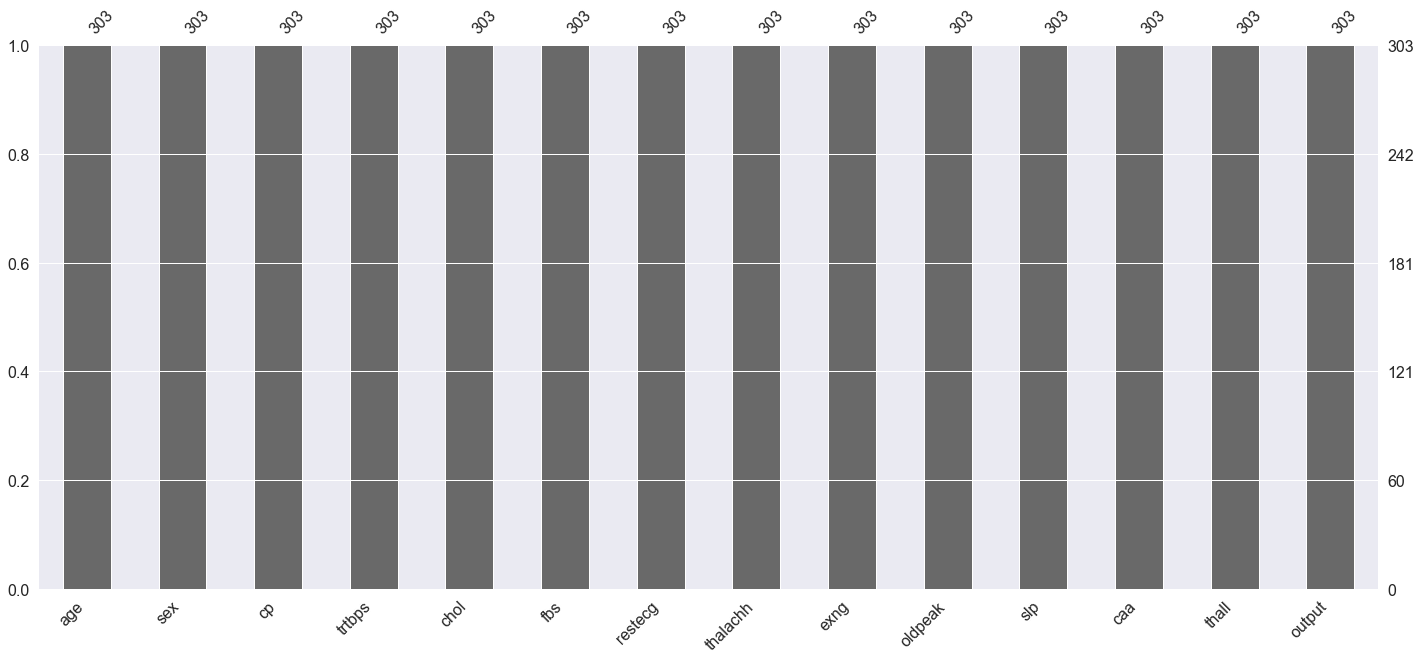

In [13]:
# Investigate Data not include null values ::
# Let's take a look at the presence of missing values, so as not to face unpleasant surprises in the future.


mno.bar(df)
df.isna().sum()

In [14]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [15]:
# Present nuniques :: To identifing the duplicaties data
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [16]:
# check data include duplicates record or not
df.duplicated().sum()

1

* From The Result above we cann see ::
------------------
  * data h ave 1 duplicied record.

In [17]:
# Droping All repeat or Redendant data.
df.drop_duplicates(inplace=True)

In [19]:
# investigaty  data not include duplicates record or not
df.duplicated().sum()

0

 * Wrangling and Mainplluting data.

In [20]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [21]:
# Get The Record Of the Clients who max age ::
df[df["age"] == df["age"].max()]


age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
238   77    1   0     125   304    0        0       162     1      0.0    2   

     caa  thall  output  
238    3      2       0

In [22]:
# Get The Record of the Min age ::
df[df["age"] == df["age"].min()]

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
72   29    1   1     130   204    0        0       202     0      0.0    2   

    caa  thall  output  
72    0      2       1

In [23]:
# Get The Record Of the Clients who max trtbps ::
df[df["trtbps"] == df["trtbps"].max()]


age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
223   56    0   0     200   288    1        0       133     1      4.0    0   

     caa  thall  output  
223    2      3       0

In [24]:
# Get The Record of the Min trtbps ::
df[df["trtbps"] == df["trtbps"].min()]

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
71    51    1   2      94   227    0        1       154     1      0.0    2   
124   39    0   2      94   199    0        1       179     0      0.0    2   

     caa  thall  output  
71     1      3       1  
124    0      2       1

In [25]:
# Get The Record Of the Clients who max chol ::
df[df["chol"] == df["chol"].max()]


age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
85   67    0   2     115   564    0        0       160     0      1.6    1   

    caa  thall  output  
85    0      3       1

In [26]:
# Get The Record of the Min chol ::
df[df["chol"] == df["chol"].min()]

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
111   57    1   2     150   126    1        1       173     0      0.2    2   

     caa  thall  output  
111    1      3       1

In [27]:
# Get The Record Of the Clients who max thalachh ::
df[df["thalachh"] == df["thalachh"].max()]


age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
72   29    1   1     130   204    0        0       202     0      0.0    2   

    caa  thall  output  
72    0      2       1

In [30]:
# Get The Record of the Min thalachh ::
df[df["thalachh"] == df["thalachh"].min()]

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
272   67    1   0     120   237    0        1        71     0      1.0    1   

     caa  thall  output  
272    0      2       0

In [31]:
# Get The Record Of the Clients who max oldpeak ::
df[df["oldpeak"] == df["oldpeak"].max()]


age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
204   62    0   0     160   164    0        0       145     0      6.2    0   

     caa  thall  output  
204    3      3       0

In [32]:
# Get The Record of the Min oldpeak ::
df[df["oldpeak"] == df["oldpeak"].min()]

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
7     44    1   1     120   263    0        1       173     0      0.0    2   
16    58    0   2     120   340    0        1       172     0      0.0    2   
22    42    1   0     140   226    0        1       178     0      0.0    2   
30    41    0   1     105   198    0        1       168     0      0.0    2   
32    44    1   1     130   219    0        0       188     0      0.0    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
283   40    1   0     152   223    0        1       181     0      0.0    2   
287   57    1   1     154   232    0        0       164     0      0.0    2   
290   61    1   0     148   203    0        1       161     0      0.0    2   
296   63    0   0     124   197    0        1       136     1      0.0    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
7      0      3       1  
16     0      2       1  
22     0      2       1  
30     1      2       1  
32     0      2       1  
..   ...    ...     ...  
283    0      3       0  
287    1      2       0  
290    1      3       0  
296    0      2       0  
302    1      2       0  

[98 rows x 14 columns]

In [35]:
# grouped data ased on contract feature and get col describtion ::
df.groupby("sex").describe().transpose()

sex                   0           1
age    count  96.000000  206.000000
       mean   55.677083   53.834951
       std     9.409396    8.836838
       min    34.000000   29.000000
       25%    49.750000   47.000000
...                 ...         ...
output min     0.000000    0.000000
       25%     0.750000    0.000000
       50%     1.000000    0.000000
       75%     1.000000    1.000000
       max     1.000000    1.000000

[104 rows x 2 columns]

In [36]:
# grouped data ased on cp feature and get col describtion ::
df.groupby("cp").describe().transpose()

cp                     0          1          2          3
age    count  143.000000  50.000000  86.000000  23.000000
       mean    55.692308  51.360000  53.697674  55.869565
       std      8.312752   9.512098   9.323051  10.033147
       min     35.000000  29.000000  37.000000  34.000000
       25%     51.000000  44.250000  47.000000  51.500000
...                  ...        ...        ...        ...
output min      0.000000   0.000000   0.000000   0.000000
       25%      0.000000   1.000000   1.000000   0.000000
       50%      0.000000   1.000000   1.000000   1.000000
       75%      1.000000   1.000000   1.000000   1.000000
       max      1.000000   1.000000   1.000000   1.000000

[104 rows x 4 columns]

In [37]:
# grouped data ased on fbs feature and get col describtion ::
df.groupby("fbs").describe().transpose()

fbs                    0          1
age    count  257.000000  45.000000
       mean    53.968872  57.000000
       std      9.290400   7.061419
       min     29.000000  42.000000
       25%     46.000000  52.000000
...                  ...        ...
output min      0.000000   0.000000
       25%      0.000000   0.000000
       50%      1.000000   1.000000
       75%      1.000000   1.000000
       max      1.000000   1.000000

[104 rows x 2 columns]

In [38]:
# grouped data ased on exng feature and get col describtion ::
df.groupby("exng").describe().transpose()

exng                   0          1
age    count  203.000000  99.000000
       mean    53.832512  55.626263
       std      9.327460   8.362435
       min     29.000000  35.000000
       25%     46.000000  51.000000
...                  ...        ...
output min      0.000000   0.000000
       25%      0.000000   0.000000
       50%      1.000000   0.000000
       75%      1.000000   0.000000
       max      1.000000   1.000000

[104 rows x 2 columns]

In [39]:
# grouped data ased on slp feature and get col describtion ::
df.groupby("slp").describe().transpose()

slp                   0           1           2
age    count  21.000000  140.000000  141.000000
       mean   55.380952   56.100000   52.609929
       std     8.315505    8.437071    9.444404
       min    37.000000   35.000000   29.000000
       25%    53.000000   50.750000   45.000000
...                 ...         ...         ...
output min     0.000000    0.000000    0.000000
       25%     0.000000    0.000000    1.000000
       50%     0.000000    0.000000    1.000000
       75%     1.000000    1.000000    1.000000
       max     1.000000    1.000000    1.000000

[104 rows x 3 columns]

In [40]:
# grouped data ased on caa feature and get col describtion ::
df.groupby("caa").describe().transpose()

caa                    0          1          2          3          4
age    count  175.000000  65.000000  38.000000  20.000000   4.000000
       mean    51.645714  57.476923  59.789474  59.900000  47.750000
       std      9.178321   6.876381   6.576608   8.232797   8.958236
       min     29.000000  41.000000  42.000000  45.000000  38.000000
       25%     44.000000  54.000000  58.000000  52.750000  41.750000
...                  ...        ...        ...        ...        ...
output min      0.000000   0.000000   0.000000   0.000000   0.000000
       25%      0.000000   0.000000   0.000000   0.000000   0.750000
       50%      1.000000   0.000000   0.000000   0.000000   1.000000
       75%      1.000000   1.000000   0.000000   0.000000   1.000000
       max      1.000000   1.000000   1.000000   1.000000   1.000000

[104 rows x 5 columns]

In [41]:
# grouped data ased on thall feature and get col describtion ::
df.groupby("thall").describe().transpose()

thall                 0          1           2           3
age    count   2.000000  18.000000  165.000000  117.000000
       mean   52.500000  56.666667   53.339394   55.632479
       std     0.707107   7.654295    9.814435    7.979066
       min    52.000000  41.000000   29.000000   35.000000
       25%    52.250000  56.000000   45.000000   51.000000
...                 ...        ...         ...         ...
output min     0.000000   0.000000    0.000000    0.000000
       25%     0.250000   0.000000    1.000000    0.000000
       50%     0.500000   0.000000    1.000000    0.000000
       75%     0.750000   1.000000    1.000000    0.000000
       max     1.000000   1.000000    1.000000    1.000000

[104 rows x 4 columns]

In [42]:
# grouped data ased on output feature and get col describtion ::
df.groupby("output").describe().transpose()

output                0           1
age   count  138.000000  164.000000
      mean    56.601449   52.585366
      std      7.962082    9.511957
      min     35.000000   29.000000
      25%     52.000000   44.750000
...                 ...         ...
thall min      0.000000    0.000000
      25%      2.000000    2.000000
      50%      3.000000    2.000000
      75%      3.000000    2.000000
      max      3.000000    3.000000

[104 rows x 2 columns]

In [44]:
df.head(2)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   

   caa  thall  output  
0    0      1       1  
1    0      2       1

In [43]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [45]:
# Create Pivote_Table Using tat data ::

Pivot_T1 = pd.pivot_table(df , index = "age" , columns = "output" , values = "trtbps")
Pivot_T1

output           0           1
age                           
29             NaN  130.000000
34             NaN  118.000000
35      123.000000  130.000000
37             NaN  125.000000
38      120.000000  138.000000
39      118.000000  124.000000
40      131.000000  140.000000
41      110.000000  120.000000
42      136.000000  125.714286
43      128.000000  125.400000
44      114.000000  123.250000
45      126.000000  121.166667
46      136.666667  121.500000
47      109.000000  126.666667
48      121.333333  126.500000
49      119.000000  131.333333
50      144.666667  119.750000
51      136.666667  120.444444
52      123.250000  134.000000
53      131.500000  133.000000
54      129.666667  128.800000
55      148.000000  132.333333
56      141.833333  126.000000
57      138.300000  132.857143
58      130.083333  124.285714
59      149.777778  148.200000
60      134.625000  124.000000
61      136.428571  150.000000
62      136.857143  130.500000
63      130.333333  140.000000
64      132.500000  143.000000
65      133.250000  143.750000
66      150.000000  144.000000
67      129.500000  124.333333
68      162.000000  119.000000
69      140.000000  150.000000
70      145.000000  156.000000
71             NaN  127.333333
74             NaN  120.000000
76             NaN  140.000000
77      125.000000         NaN

In [46]:
# Create Pivote_Table Using tat data ::

Pivot_T1 = pd.pivot_table(df , index = "age" , columns = "output" , values = "thalachh")
Pivot_T1

output           0           1
age                           
29             NaN  130.000000
34             NaN  118.000000
35      123.000000  130.000000
37             NaN  125.000000
38      120.000000  138.000000
39      118.000000  124.000000
40      131.000000  140.000000
41      110.000000  120.000000
42      136.000000  125.714286
43      128.000000  125.400000
44      114.000000  123.250000
45      126.000000  121.166667
46      136.666667  121.500000
47      109.000000  126.666667
48      121.333333  126.500000
49      119.000000  131.333333
50      144.666667  119.750000
51      136.666667  120.444444
52      123.250000  134.000000
53      131.500000  133.000000
54      129.666667  128.800000
55      148.000000  132.333333
56      141.833333  126.000000
57      138.300000  132.857143
58      130.083333  124.285714
59      149.777778  148.200000
60      134.625000  124.000000
61      136.428571  150.000000
62      136.857143  130.500000
63      130.333333  140.000000
64      132.500000  143.000000
65      133.250000  143.750000
66      150.000000  144.000000
67      129.500000  124.333333
68      162.000000  119.000000
69      140.000000  150.000000
70      145.000000  156.000000
71             NaN  127.333333
74             NaN  120.000000
76             NaN  140.000000
77      125.000000         NaN

In [47]:
# Create Pivote_Table Using tat data ::

Pivot_T1 = pd.pivot_table(df , index = "age" , columns = "output" , values = "oldpeak")
Pivot_T1

output         0         1
age                       
29           NaN  0.000000
34           NaN  0.350000
35      0.800000  0.700000
37           NaN  1.750000
38      3.800000  0.000000
39      1.200000  0.000000
40      1.000000  1.400000
41      0.000000  0.377778
42      1.800000  0.314286
43      1.866667  0.960000
44      0.933333  0.162500
45      0.600000  0.633333
46      2.066667  0.350000
47      0.500000  0.033333
48      0.500000  0.100000
49      1.400000  0.200000
50      1.366667  0.675000
51      2.333333  0.911111
52      0.500000  0.322222
53      2.550000  0.266667
54      1.600000  0.530000
55      2.600000  0.866667
56      1.900000  0.800000
57      0.790000  0.614286
58      1.900000  0.514286
59      0.977778  1.260000
60      2.200000  0.300000
61      1.814286  1.000000
62      2.500000  0.750000
63      2.166667  0.766667
64      1.500000  0.800000
65      1.450000  0.700000
66      0.366667  1.325000
67      1.166667  0.633333
68      2.500000  1.250000
69      2.000000  0.950000
70      2.633333  0.000000
71           NaN  0.666667
74           NaN  0.200000
76           NaN  1.100000
77      0.000000       NaN

In [48]:
# Create Pivote_Table Using tat data ::

Pivot_T1 = pd.pivot_table(df , index = "sex" , columns = "output" , values = "chol")
Pivot_T1

output           0           1
sex                           
0       274.958333  256.750000
1       246.061404  231.597826

In [49]:
# Create Pivote_Table Using tat data ::

Pivot_T1 = pd.pivot_table(df , index = "sex" , columns = "output" , values = "oldpeak")
Pivot_T1

output         0         1
sex                       
0       1.841667  0.554167
1       1.531579  0.611957

In [50]:
# Create Pivote_Table Using tat data ::

Pivot_T1 = pd.pivot_table(df , index = "sex" , columns = "output" , values = "chol")
Pivot_T1

output           0           1
sex                           
0       274.958333  256.750000
1       246.061404  231.597826

In [51]:
# Create Pivote_Table Using tat data ::

Pivot_T1 = pd.pivot_table(df , index = "cp" , columns = "output" , values = "thalachh")
Pivot_T1

output           0           1
cp                            
0       251.932692  245.333333
1       263.444444  240.682927
2       239.000000  245.279412
3       253.714286  229.875000

In [52]:
# Create Pivote_Table Using tat data ::

Pivot_T1 = pd.pivot_table(df , index = "cp" , columns = "output" , values = "trtbps")
Pivot_T1

output           0           1
cp                            
0       133.692308  127.564103
1       138.444444  126.195122
2       135.055556  129.029412
3       138.000000  142.125000

In [53]:
# Create Pivote_Table Using tat data ::

Pivot_T1 = pd.pivot_table(df , index = "cp" , columns = "output" , values = "oldpeak")
Pivot_T1

output         0         1
cp                        
0       1.683654  0.582051
1       0.500000  0.275610
2       1.622222  0.591176
3       1.428571  1.375000

In [54]:
# Create Pivote_Table Using tat data ::

Pivot_T1 = pd.pivot_table(df , index = "fbs" , columns = "output" , values = "chol")
Pivot_T1

output           0           1
fbs                           
0       250.094828  243.092199
1       256.318182  239.869565

In [55]:
# Create Pivote_Table Using tat data ::

Pivot_T1 = pd.pivot_table(df , index = "fbs" , columns = "output" , values = "thalachh")
Pivot_T1

output           0           1
fbs                           
0       250.094828  243.092199
1       256.318182  239.869565

In [56]:
# Create Pivote_Table Using tat data ::

Pivot_T1 = pd.pivot_table(df , index = "fbs" , columns = "output" , values = "trtbps")
Pivot_T1

output           0           1
fbs                           
0       132.663793  128.347518
1       143.545455  134.782609

In [57]:
# Create Pivote_Table Using tat data ::

Pivot_T1 = pd.pivot_table(df , index = "cp" , columns = "output" , values = "oldpeak")
Pivot_T1

output         0         1
cp                        
0       1.683654  0.582051
1       0.500000  0.275610
2       1.622222  0.591176
3       1.428571  1.375000

In [58]:
# Create Pivote_Table Using tat data ::

Pivot_T1 = pd.pivot_table(df , index = "restecg" , columns = "output" , values = "chol")
Pivot_T1

output            0           1
restecg                        
0        255.227848  255.044118
1        243.517857  234.242105
2        283.333333  197.000000

In [59]:
# Create Pivote_Table Using tat data ::

Pivot_T1 = pd.pivot_table(df , index = "restecg" , columns = "output" , values = "trtbps")
Pivot_T1

output            0           1
restecg                        
0        136.215190  131.485294
1        131.500000  127.536842
2        140.666667  140.000000

In [60]:
# Create Pivote_Table Using tat data ::

Pivot_T1 = pd.pivot_table(df , index = "cp" , columns = "output" , values = "oldpeak")
Pivot_T1

output         0         1
cp                        
0       1.683654  0.582051
1       0.500000  0.275610
2       1.622222  0.591176
3       1.428571  1.375000

In [61]:
# Create Pivote_Table Using tat data ::

Pivot_T1 = pd.pivot_table(df , index = "cp" , columns = "output" , values = "thalachh")
Pivot_T1

output           0           1
cp                            
0       136.057692  152.487179
1       153.000000  164.487805
2       143.888889  158.455882
3       154.142857  156.750000

<p id="visualize"> Visualization-Process</p>

* Apply Data-Visualization Process :: visualization data one of the most important process on data scientist life cycle which we use some viualize element such (charts , plots ,maps) to identify the pattern , Trends and outliers on data.

Text(0.5, 1.0, 'Confusion_Matrix of data')

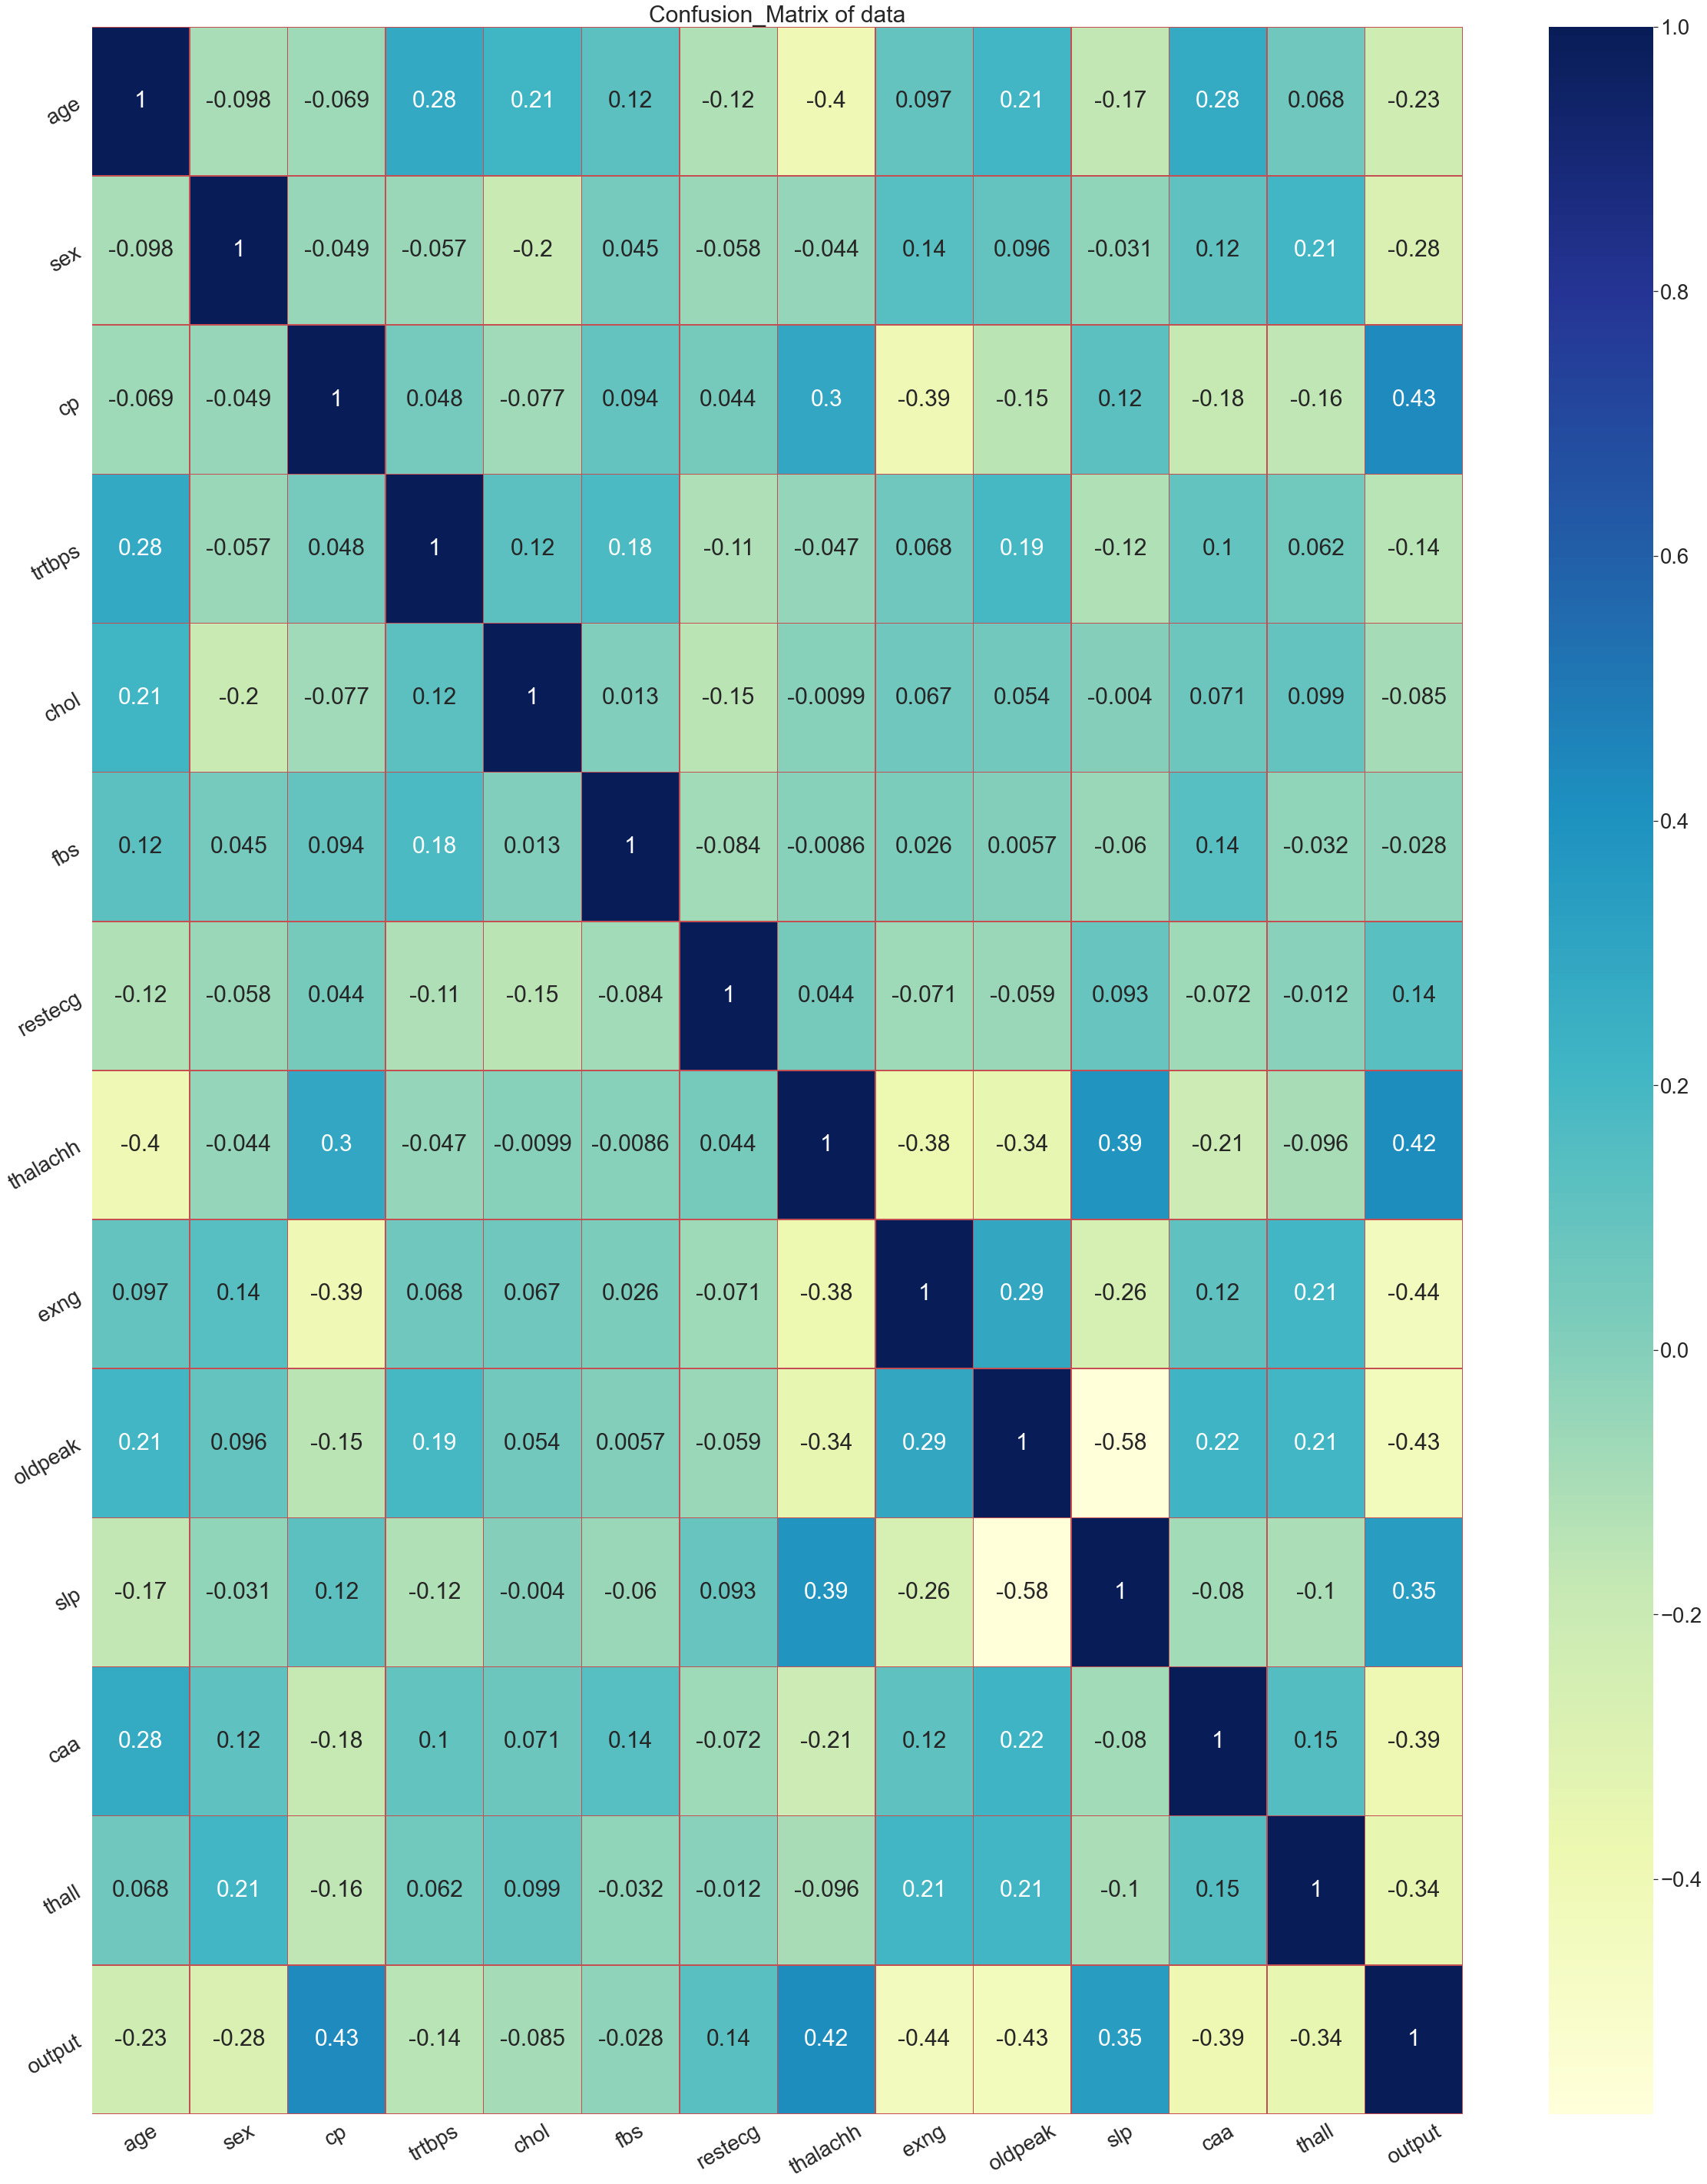

In [64]:
# Visualize The Feathure Correlations ::
sns.set( rc = {"figure.figsize" : [40 , 50]} , font_scale=2.5)
sns.heatmap(Con_Matrix , annot=True , cmap="YlGnBu" , linecolor="r" , linewidths=0.5)
plt.xticks(rotation = 30)
plt.yticks(rotation = 30)
plt.title("Confusion_Matrix of data")
# RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r

In [65]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [91]:
# To Present age of Clients ::
ages = df["age"].value_counts()[:5]
ages

58    19
57    17
54    16
59    14
52    13
Name: age, dtype: int64

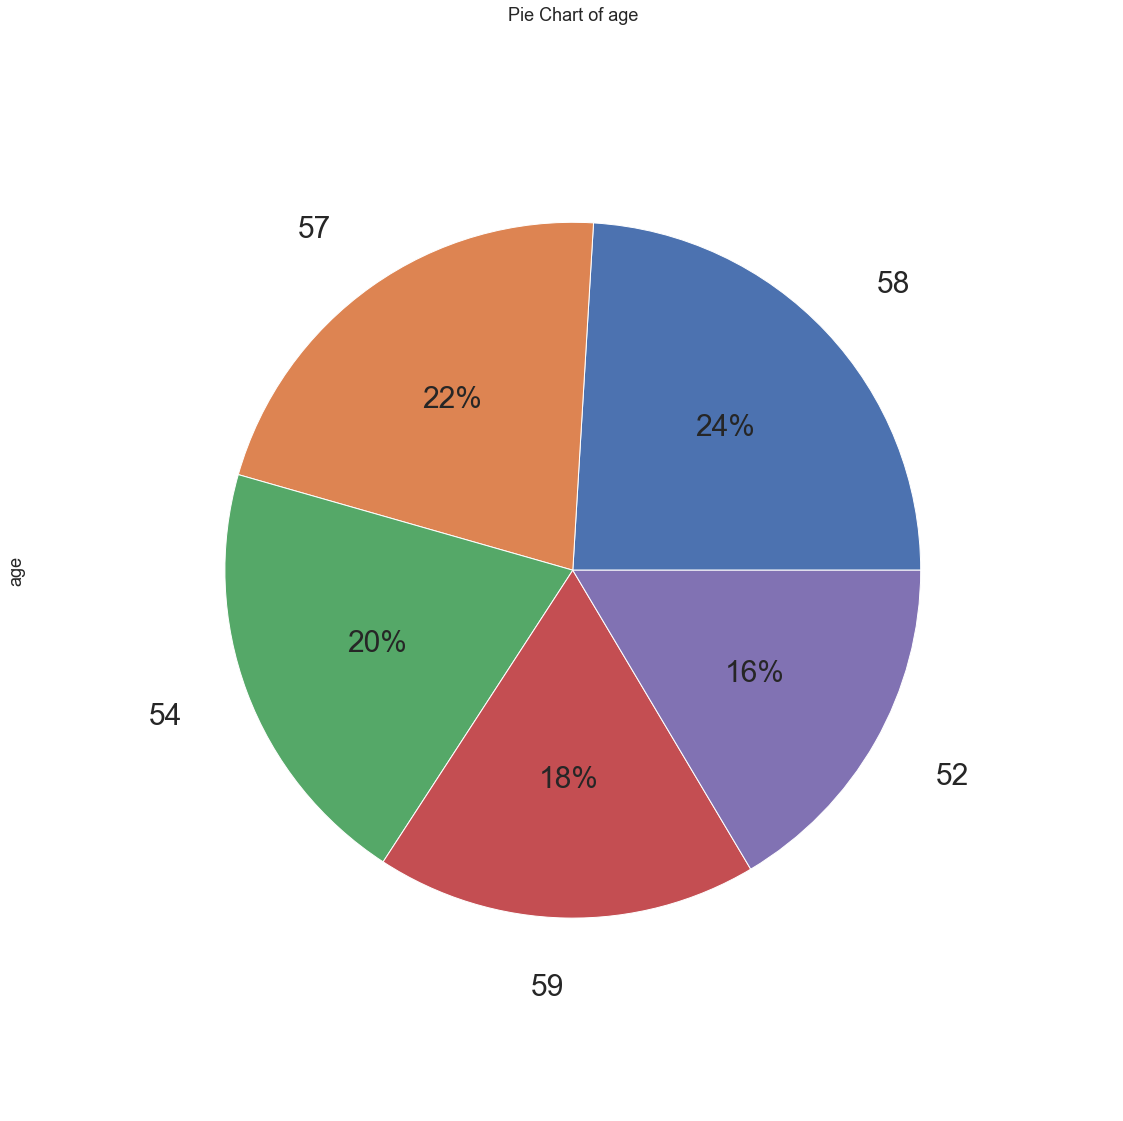

In [92]:
# Visualize Comparing aMonge Male and Female ::
sns.set( rc = {"figure.figsize" : [20 ,20]} , font_scale=1.5)
ages.plot.pie(autopct = "%1.0f%%" , radius = 0.8 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of age")
plt.show()

In [93]:
# To Present sex of Clients ::
sexs = df["sex"].value_counts()
sexs

1    206
0     96
Name: sex, dtype: int64

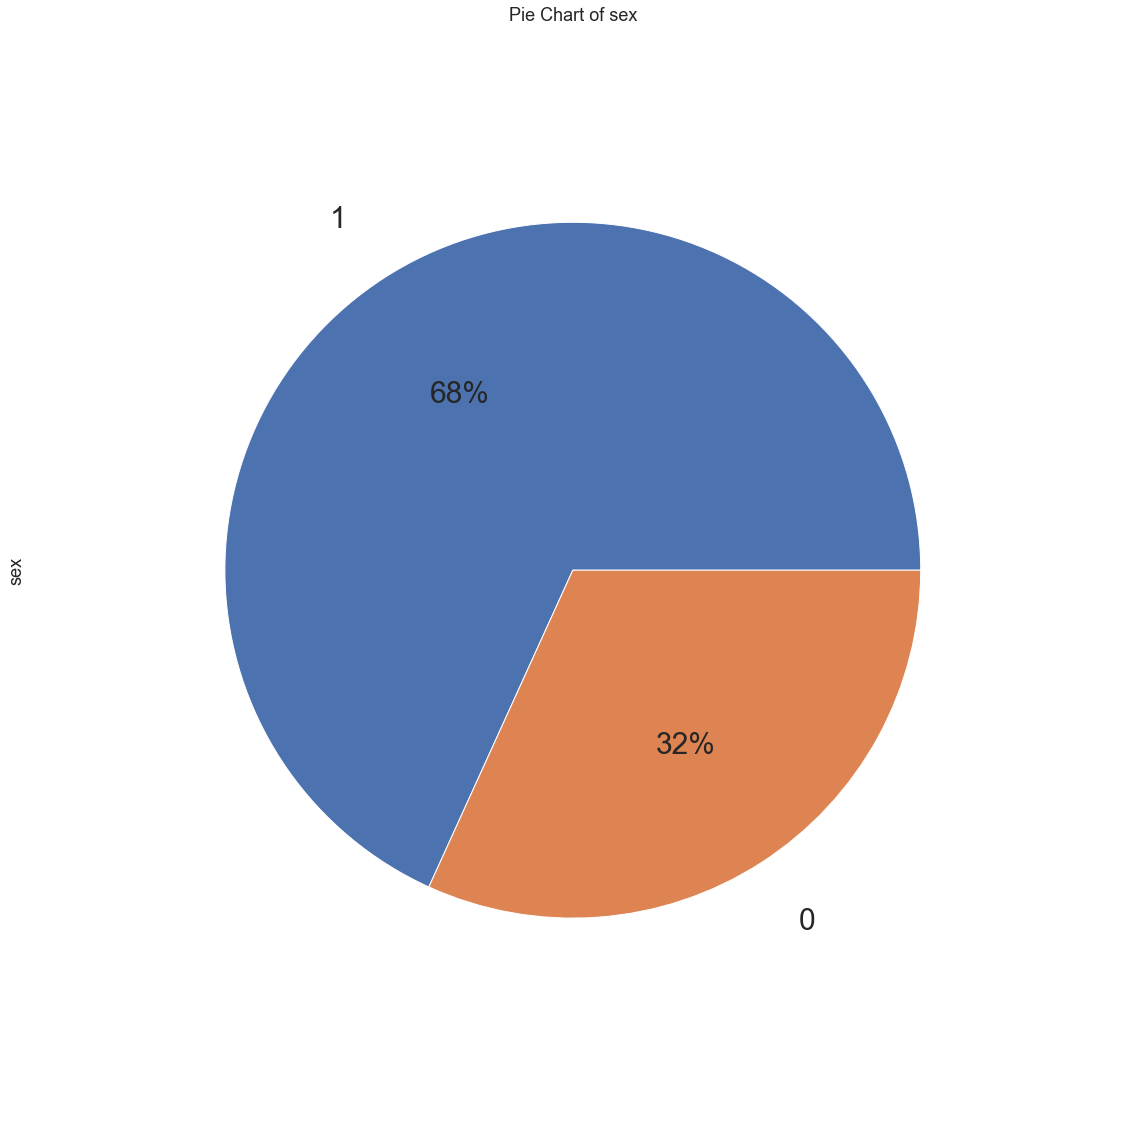

In [94]:
# Visualize Comparing aMonge Male and Female ::
sns.set( rc = {"figure.figsize" : [20 ,20]} , font_scale=1.5)
sexs.plot.pie(autopct = "%1.0f%%" , radius = 0.8 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of sex")
plt.show()

In [95]:
df.head(2)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   

   caa  thall  output  
0    0      1       1  
1    0      2       1

In [96]:
# To Present cp of Clients ::
cps = df["cp"].value_counts()
cps

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

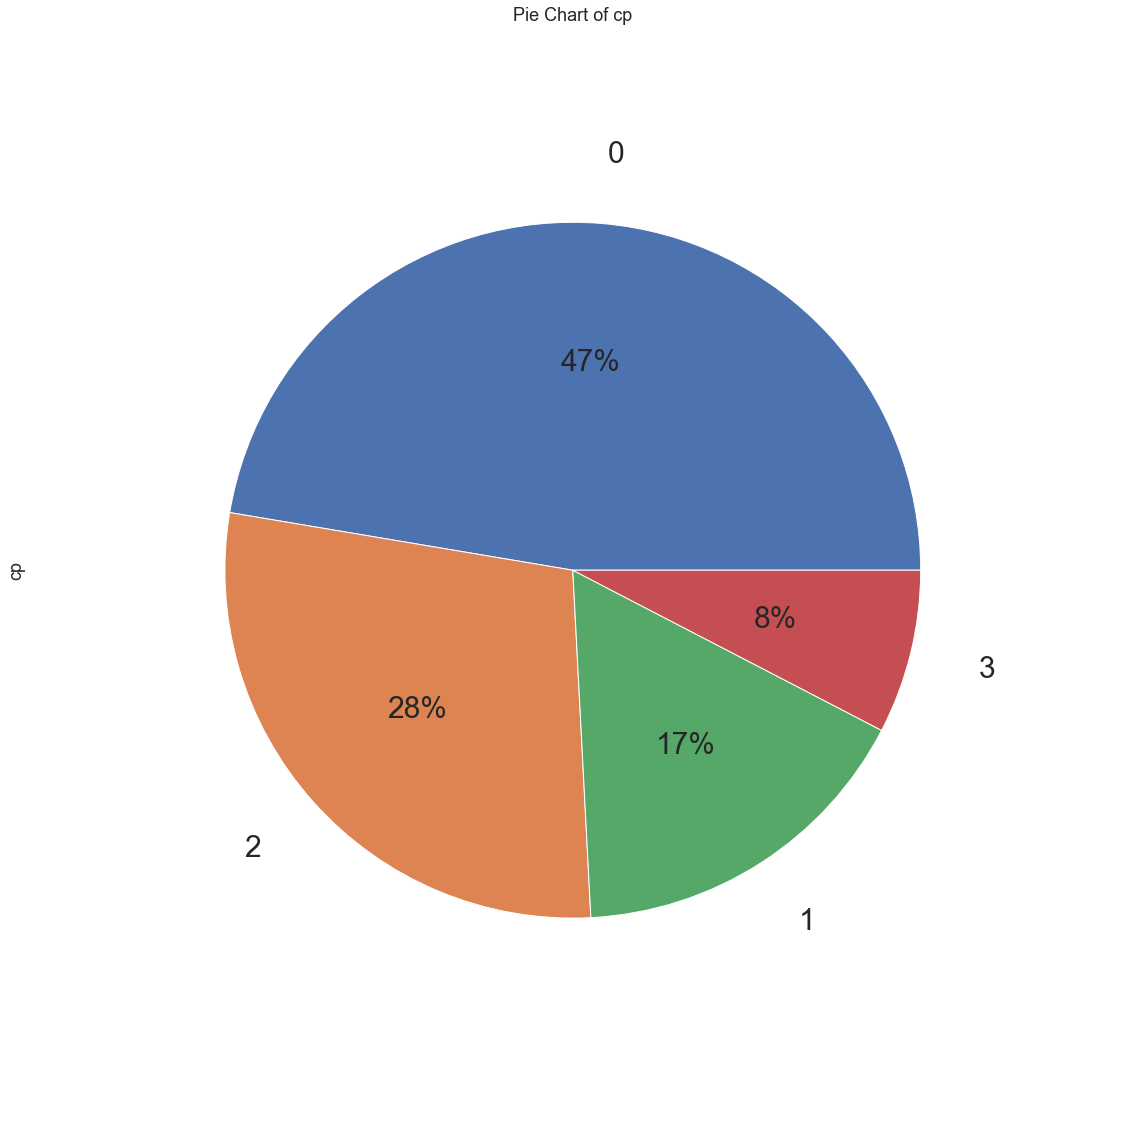

In [97]:
# Visualize Comparing  ::
sns.set( rc = {"figure.figsize" : [20 ,20]} , font_scale=1.5)
cps.plot.pie(autopct = "%1.0f%%" , radius = 0.8 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of cp")
plt.show()

In [98]:
# To Present fbs of Clients ::
fbss = df["fbs"].value_counts()
fbss

0    257
1     45
Name: fbs, dtype: int64

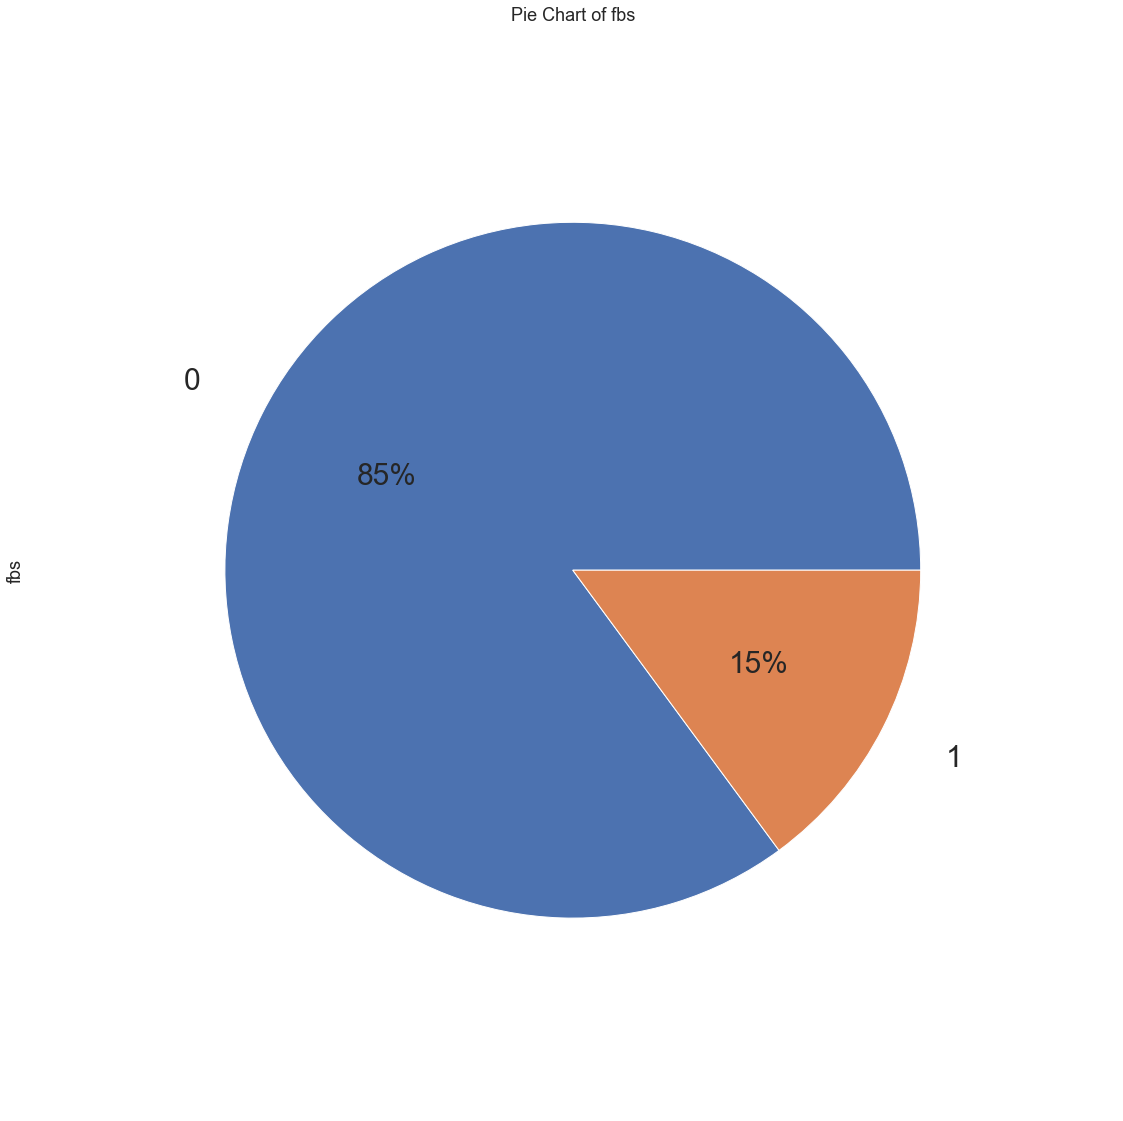

In [99]:
# Visualize Comparing  ::
sns.set( rc = {"figure.figsize" : [20 ,20]} , font_scale=1.5)
fbss.plot.pie(autopct = "%1.0f%%" , radius = 0.8 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of fbs")
plt.show()

In [100]:
# To Present restecg of Clients ::
restecgs = df["restecg"].value_counts()
restecgs

1    151
0    147
2      4
Name: restecg, dtype: int64

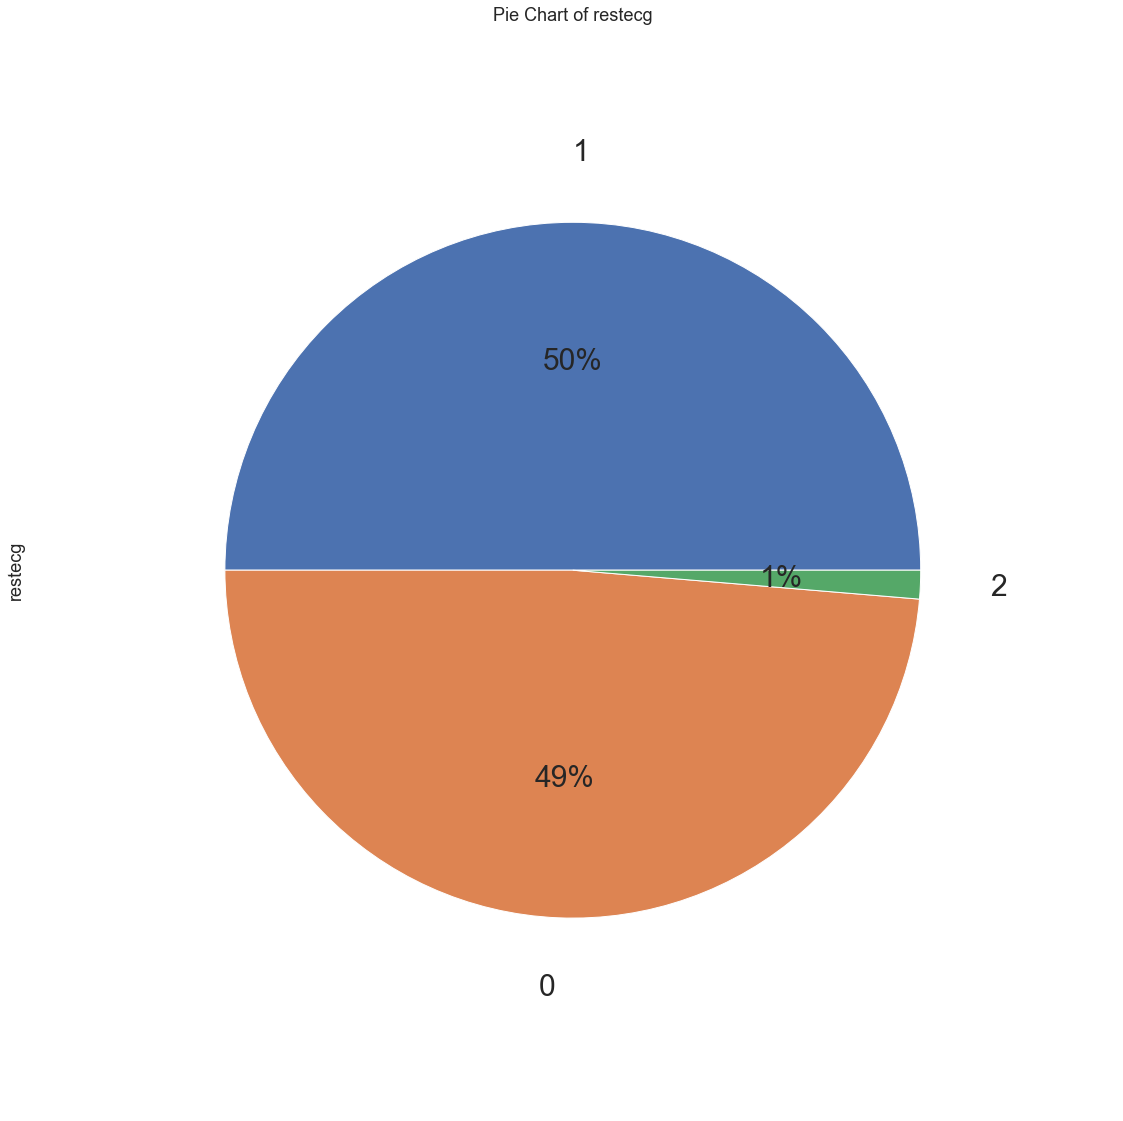

In [101]:
# Visualize Comparing  ::
sns.set( rc = {"figure.figsize" : [20 ,20]} , font_scale=1.5)
restecgs.plot.pie(autopct = "%1.0f%%" , radius = 0.8 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of restecg")
plt.show()

In [102]:
# To Present exng of Clients ::
exngs = df["exng"].value_counts()
exngs

0    203
1     99
Name: exng, dtype: int64

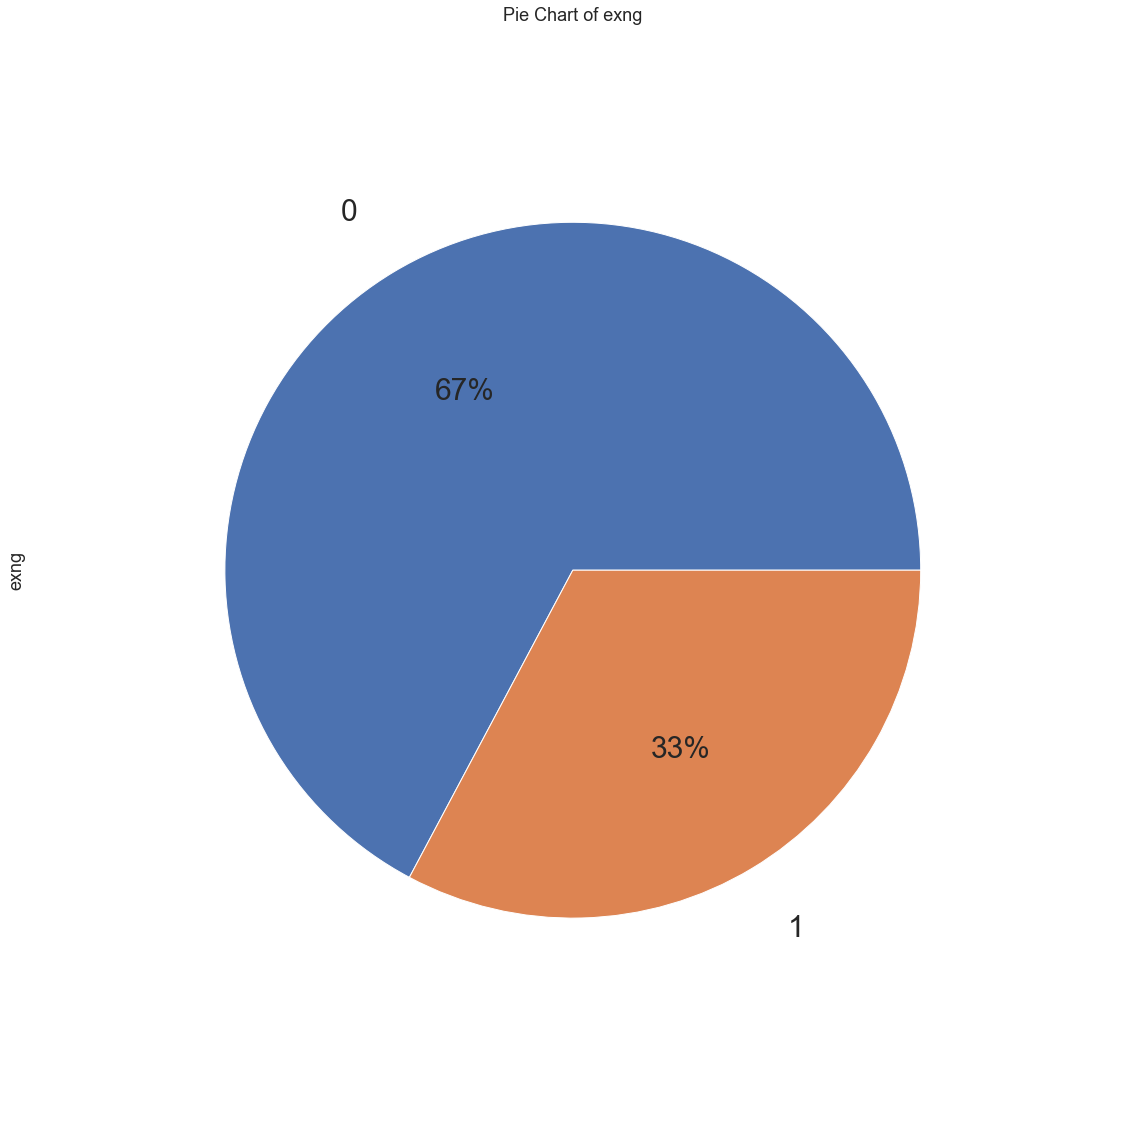

In [103]:
# Visualize Comparing  ::
sns.set( rc = {"figure.figsize" : [20 ,20]} , font_scale=1.5)
exngs.plot.pie(autopct = "%1.0f%%" , radius = 0.8 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of exng")
plt.show()

In [104]:
# To Present slp of Clients ::
slps = df["slp"].value_counts()
slps

2    141
1    140
0     21
Name: slp, dtype: int64

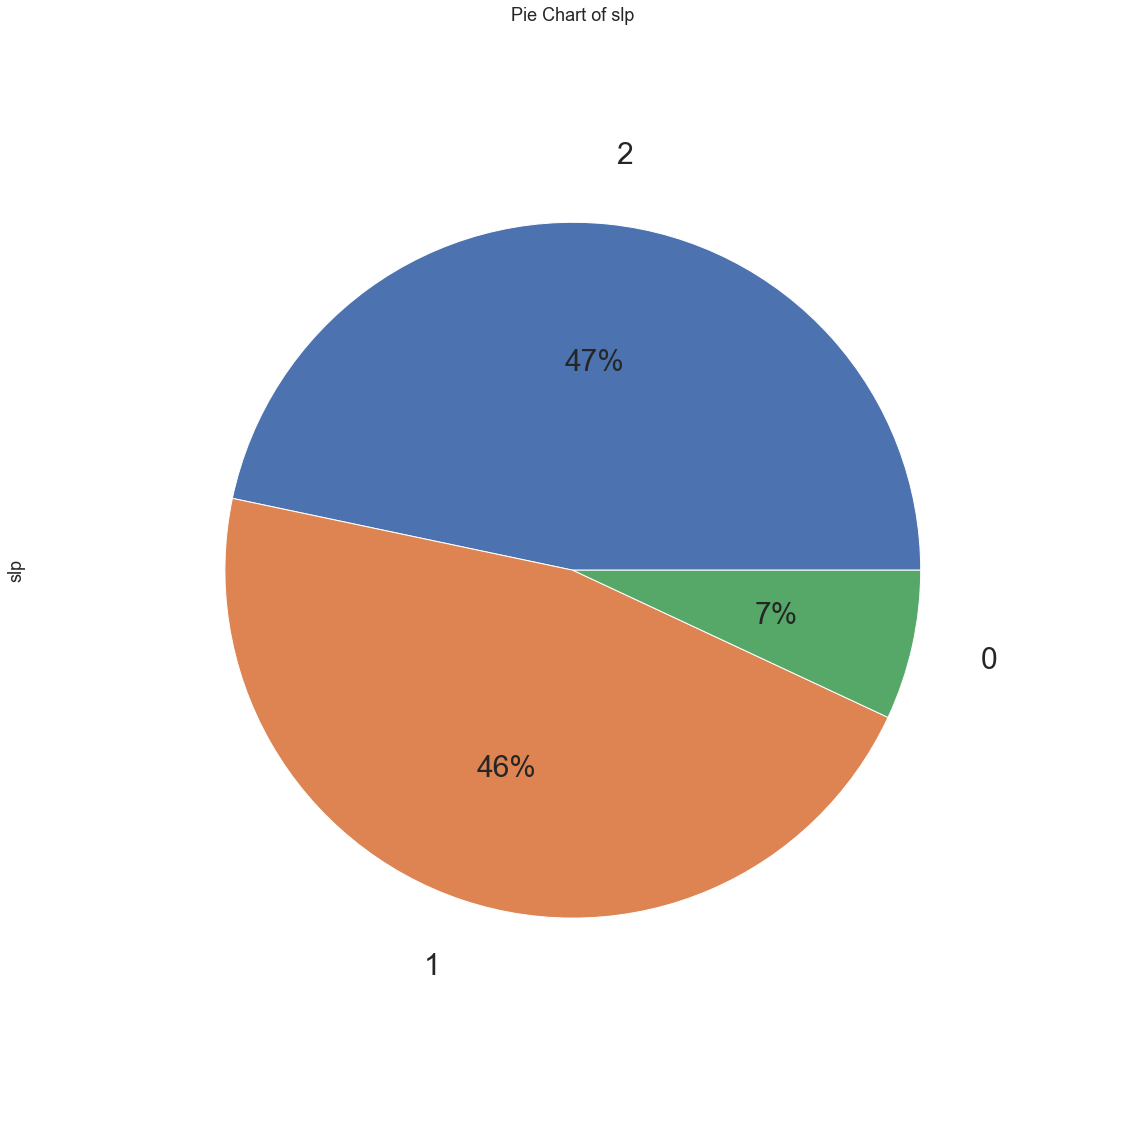

In [105]:
# Visualize Comparing  ::
sns.set( rc = {"figure.figsize" : [20 ,20]} , font_scale=1.5)
slps.plot.pie(autopct = "%1.0f%%" , radius = 0.8 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of slp")
plt.show()

In [106]:
# To Present slp of Clients ::
caas = df["caa"].value_counts()
caas

0    175
1     65
2     38
3     20
4      4
Name: caa, dtype: int64

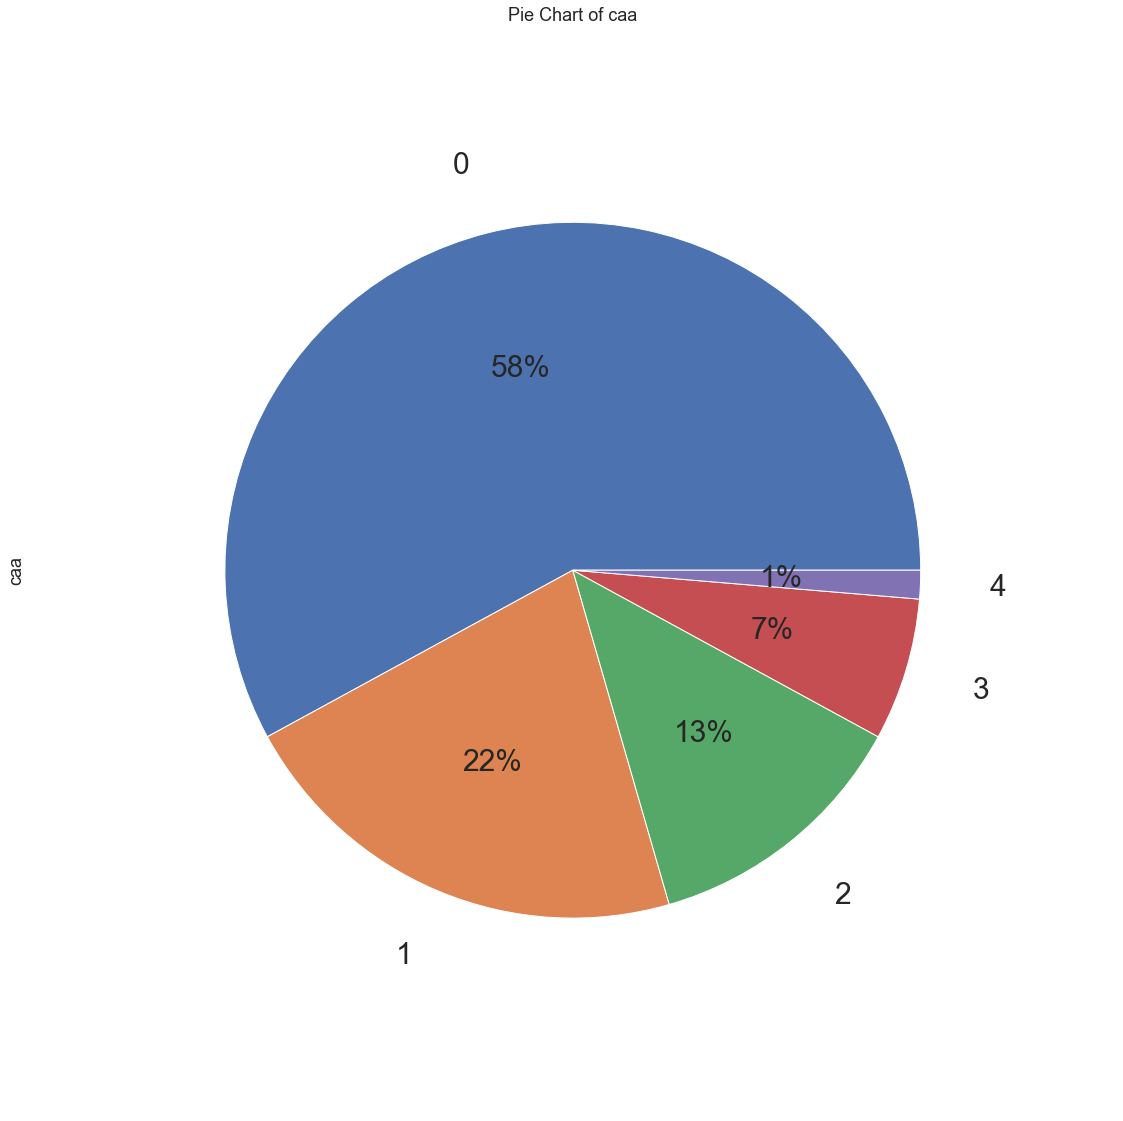

In [107]:
# Visualize Comparing  ::
sns.set( rc = {"figure.figsize" : [20 ,20]} , font_scale=1.5)
caas.plot.pie(autopct = "%1.0f%%" , radius = 0.8 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of caa")
plt.show()

In [108]:
# To Present thall of Clients ::
thalls = df["thall"].value_counts()
thalls

2    165
3    117
1     18
0      2
Name: thall, dtype: int64

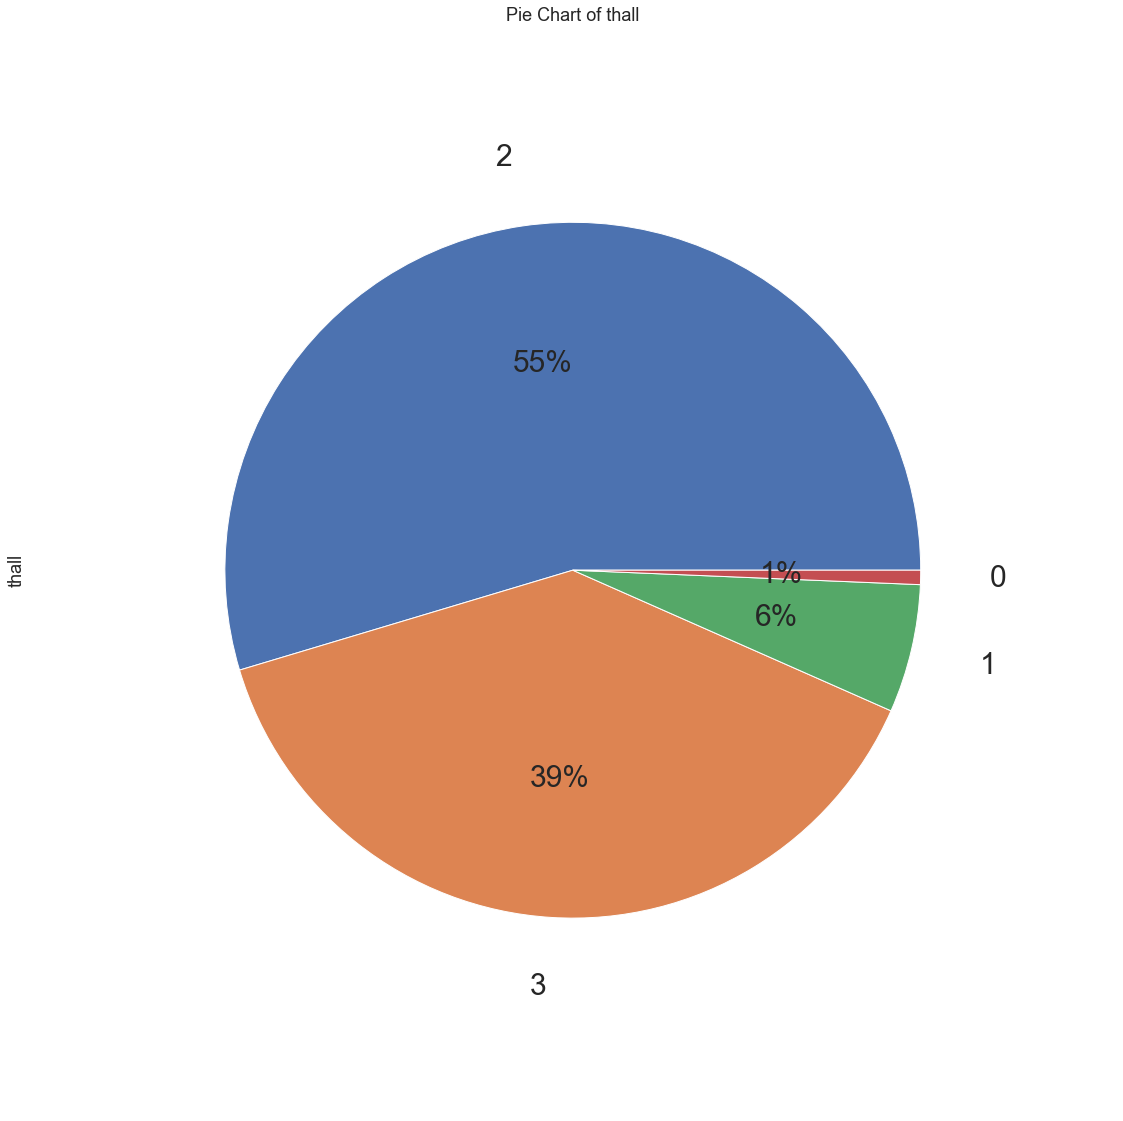

In [109]:
# Visualize Comparing  ::
sns.set( rc = {"figure.figsize" : [20 ,20]} , font_scale=1.5)
thalls.plot.pie(autopct = "%1.0f%%" , radius = 0.8 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of thall")
plt.show()

In [110]:
# To Present output of Clients ::
outputs = df["output"].value_counts()
outputs

1    164
0    138
Name: output, dtype: int64

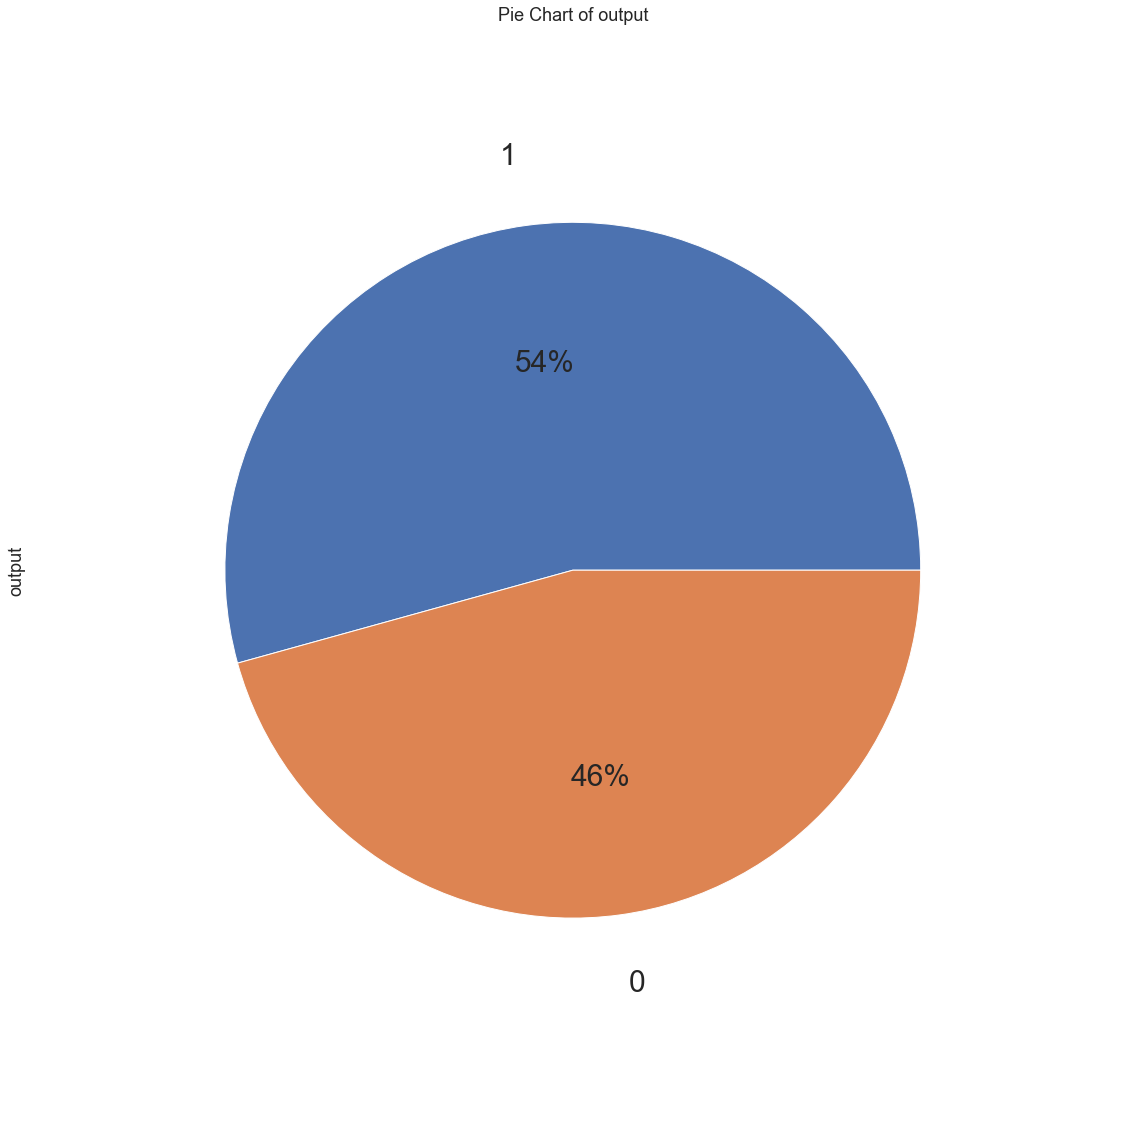

In [111]:
# Visualize Comparing  ::
sns.set( rc = {"figure.figsize" : [20 ,20]} , font_scale=1.5)
outputs.plot.pie(autopct = "%1.0f%%" , radius = 0.8 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of output")
plt.show()

Text(0.5, 1.0, 'Count Plot of age')

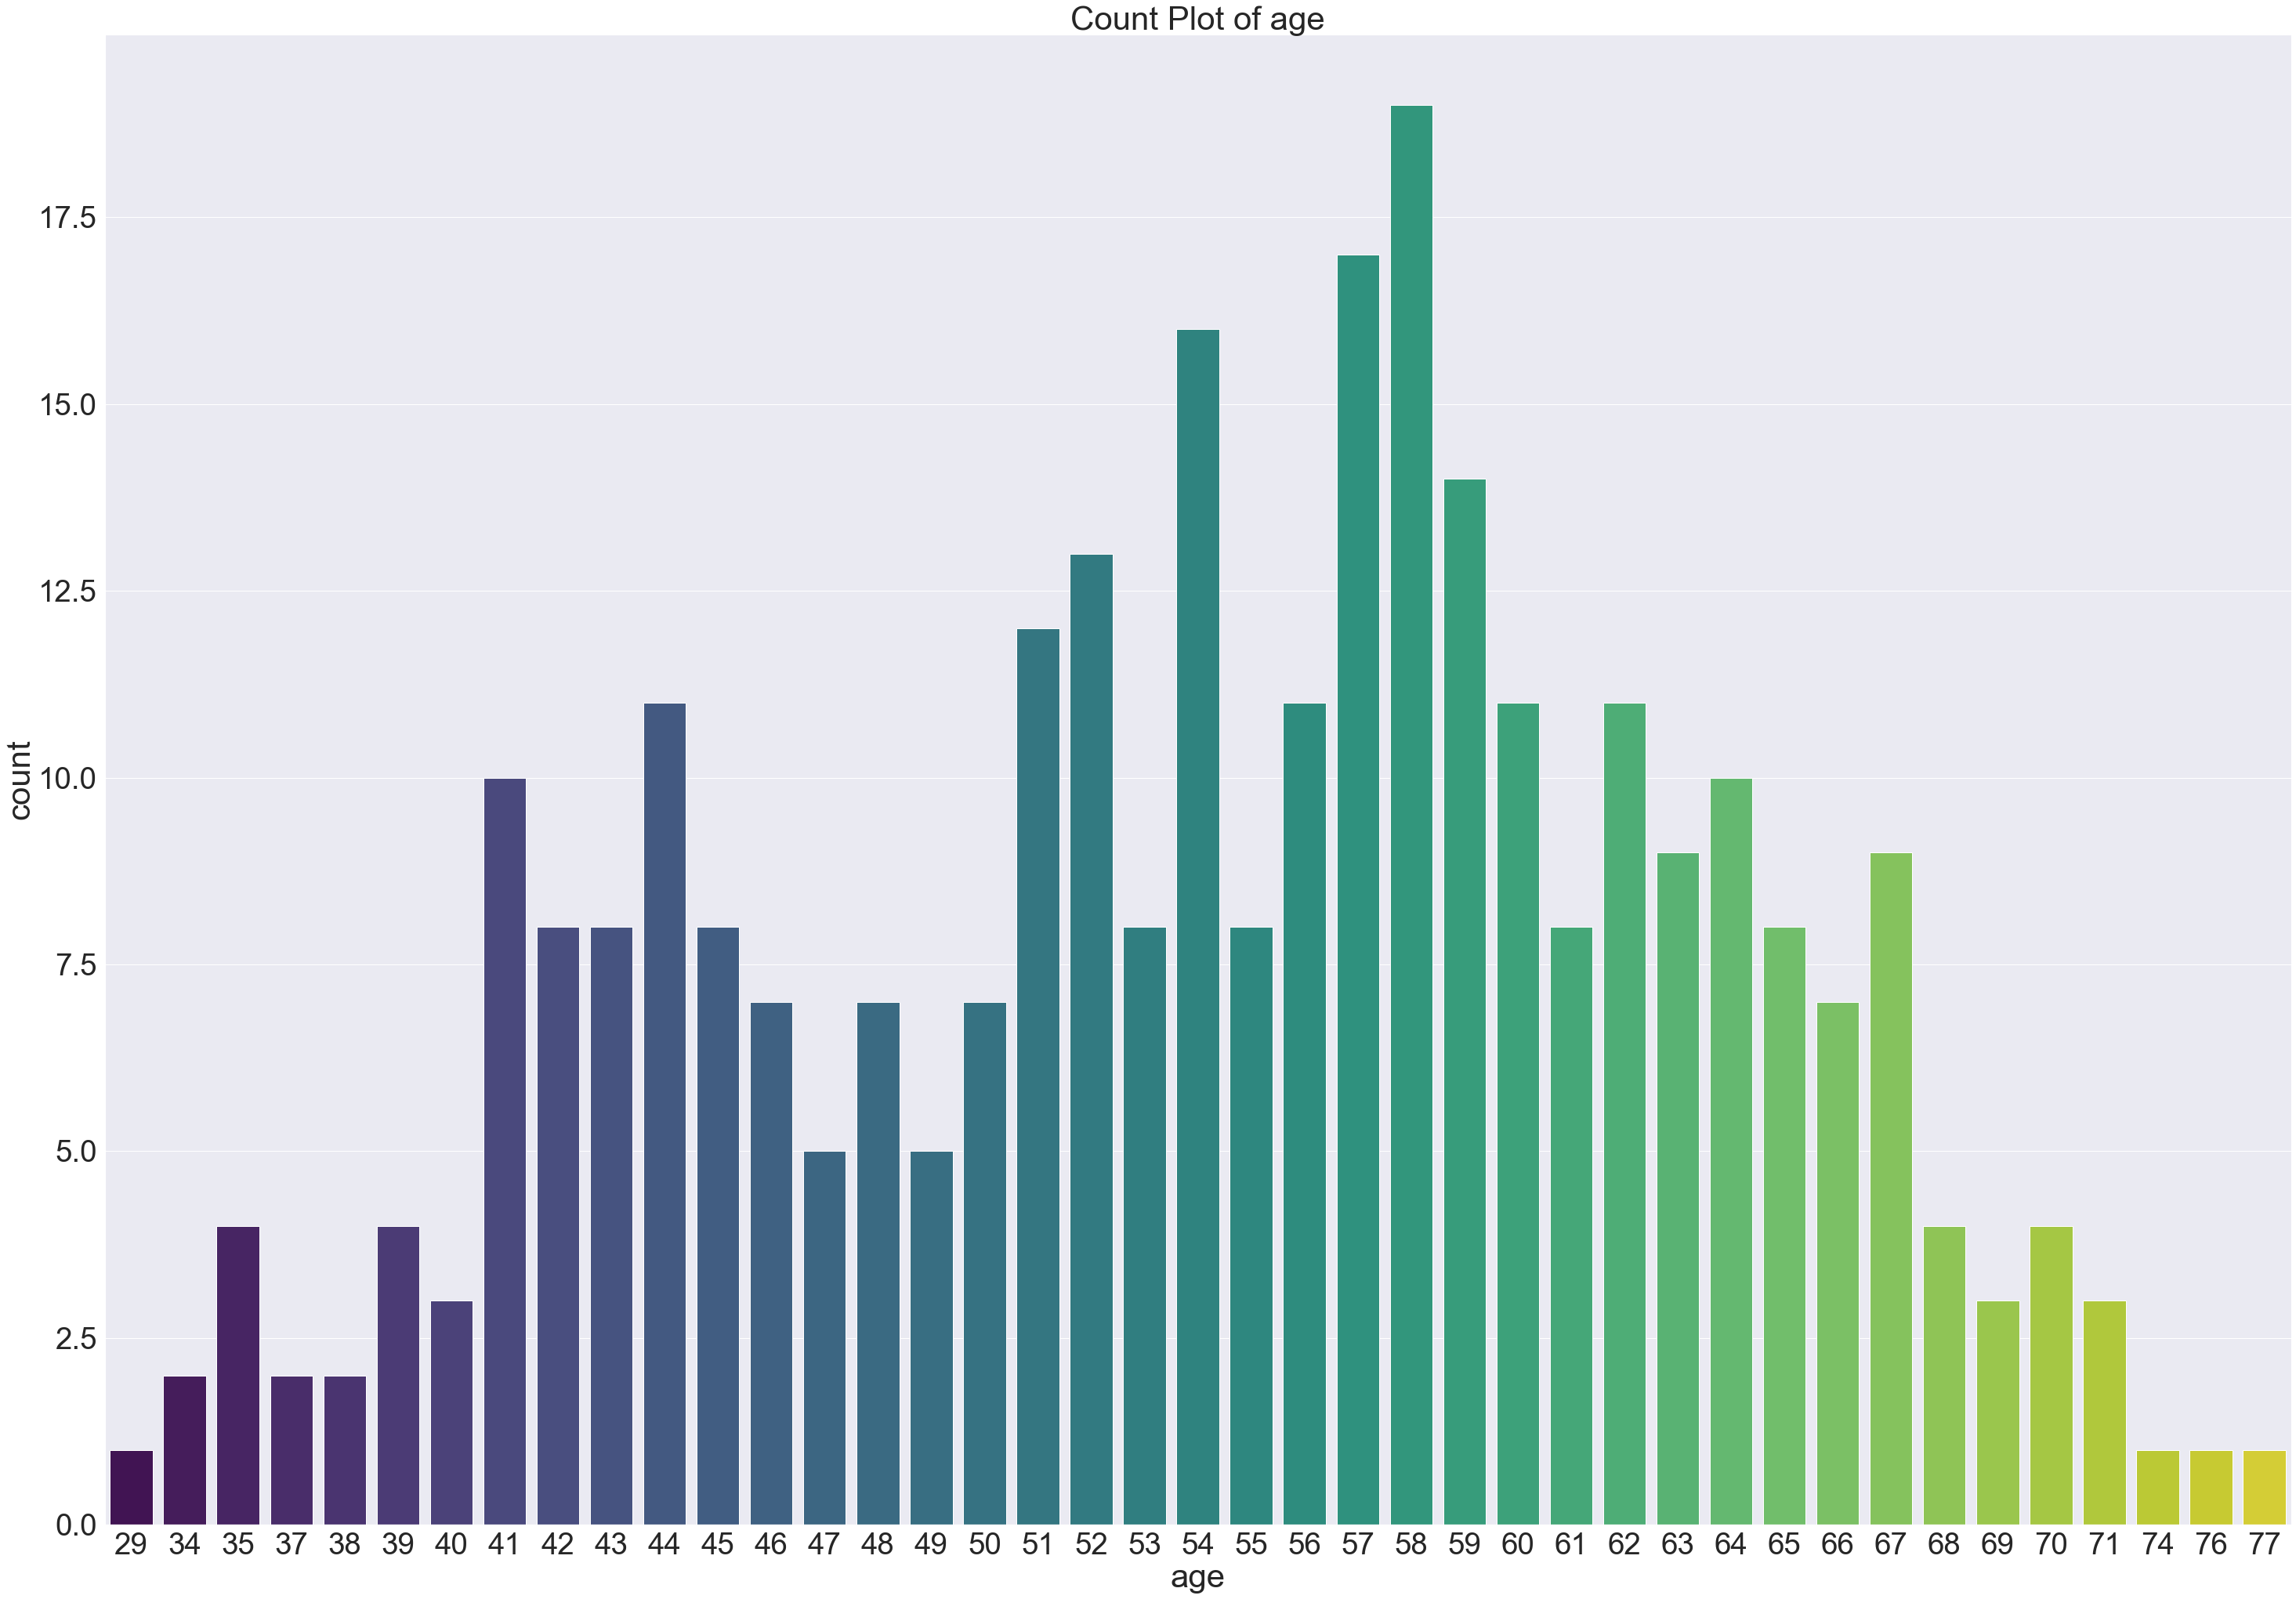

In [112]:
sns.set( rc = {"figure.figsize" : [50 , 35]} , font_scale=3.5)
sns.countplot(df["age"] , data = df , palette="viridis")
plt.title("Count Plot of age")

In [113]:
df.head(2)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   

   caa  thall  output  
0    0      1       1  
1    0      2       1

Text(0.5, 1.0, 'Distribution Plot of trtbps')

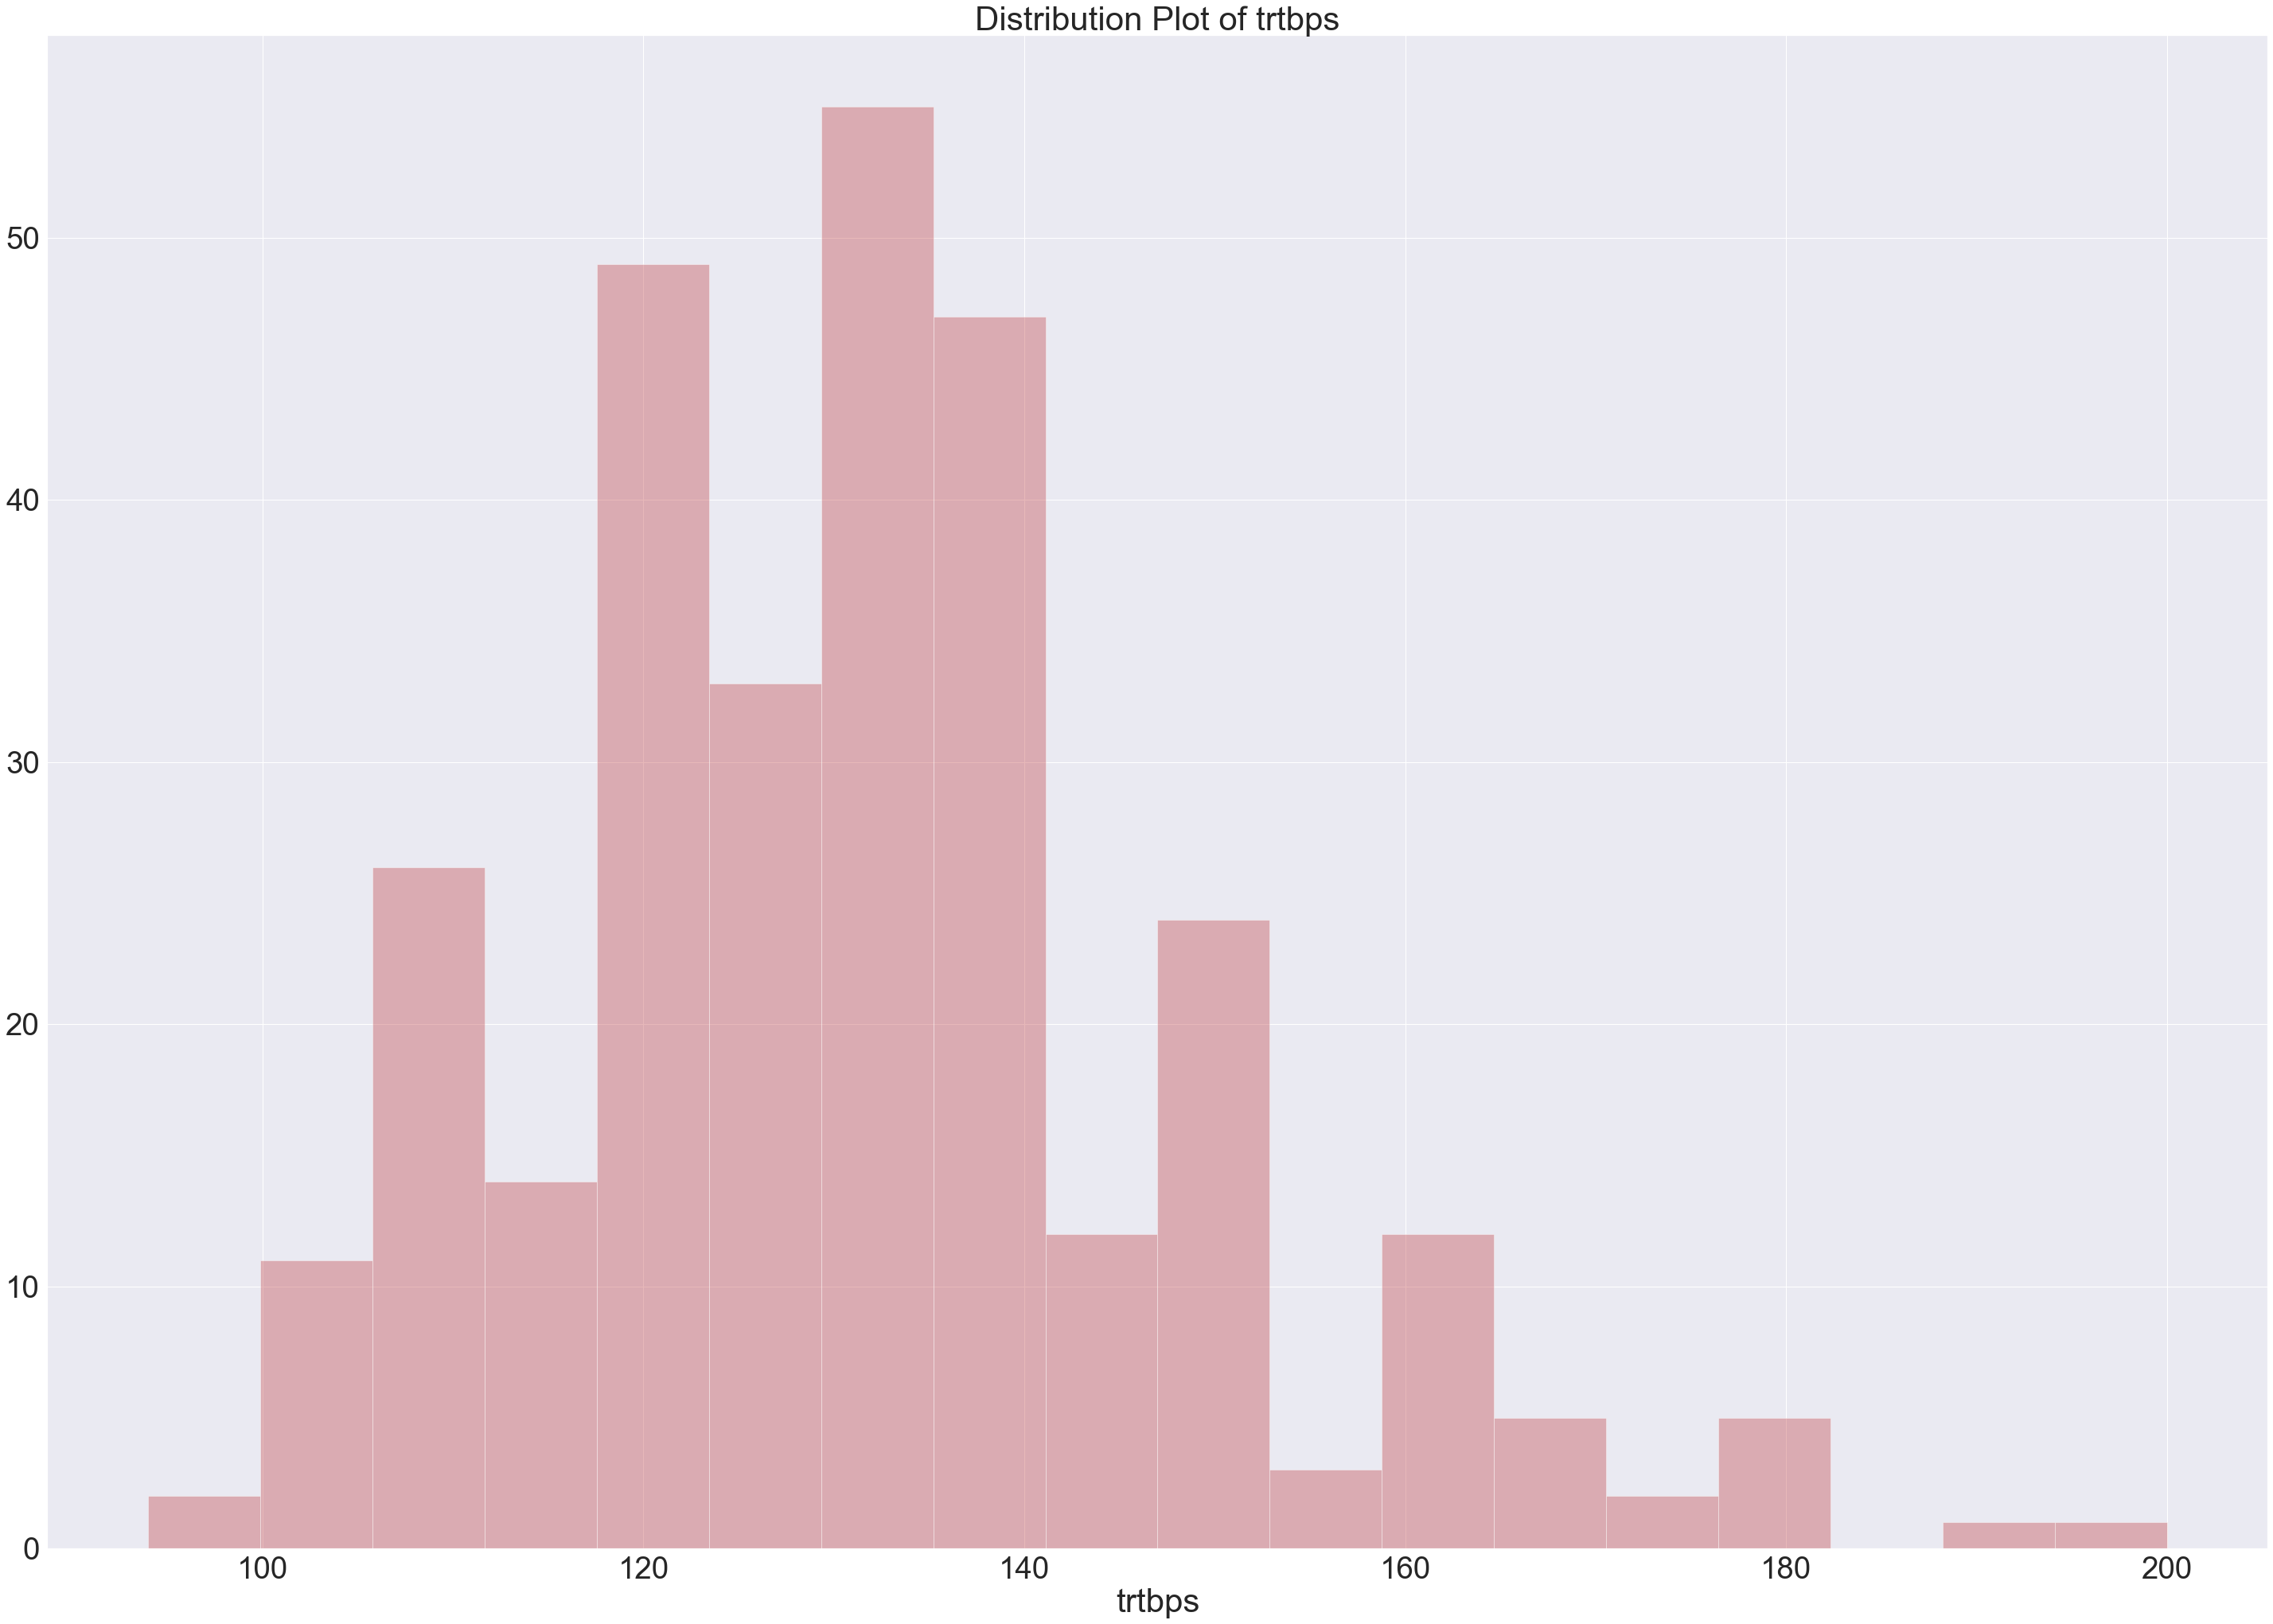

In [122]:
sns.distplot(df["trtbps"] , kde=False , color="r")
plt.title("Distribution Plot of trtbps")

Text(0.5, 1.0, 'Kde Plot of trtbps')

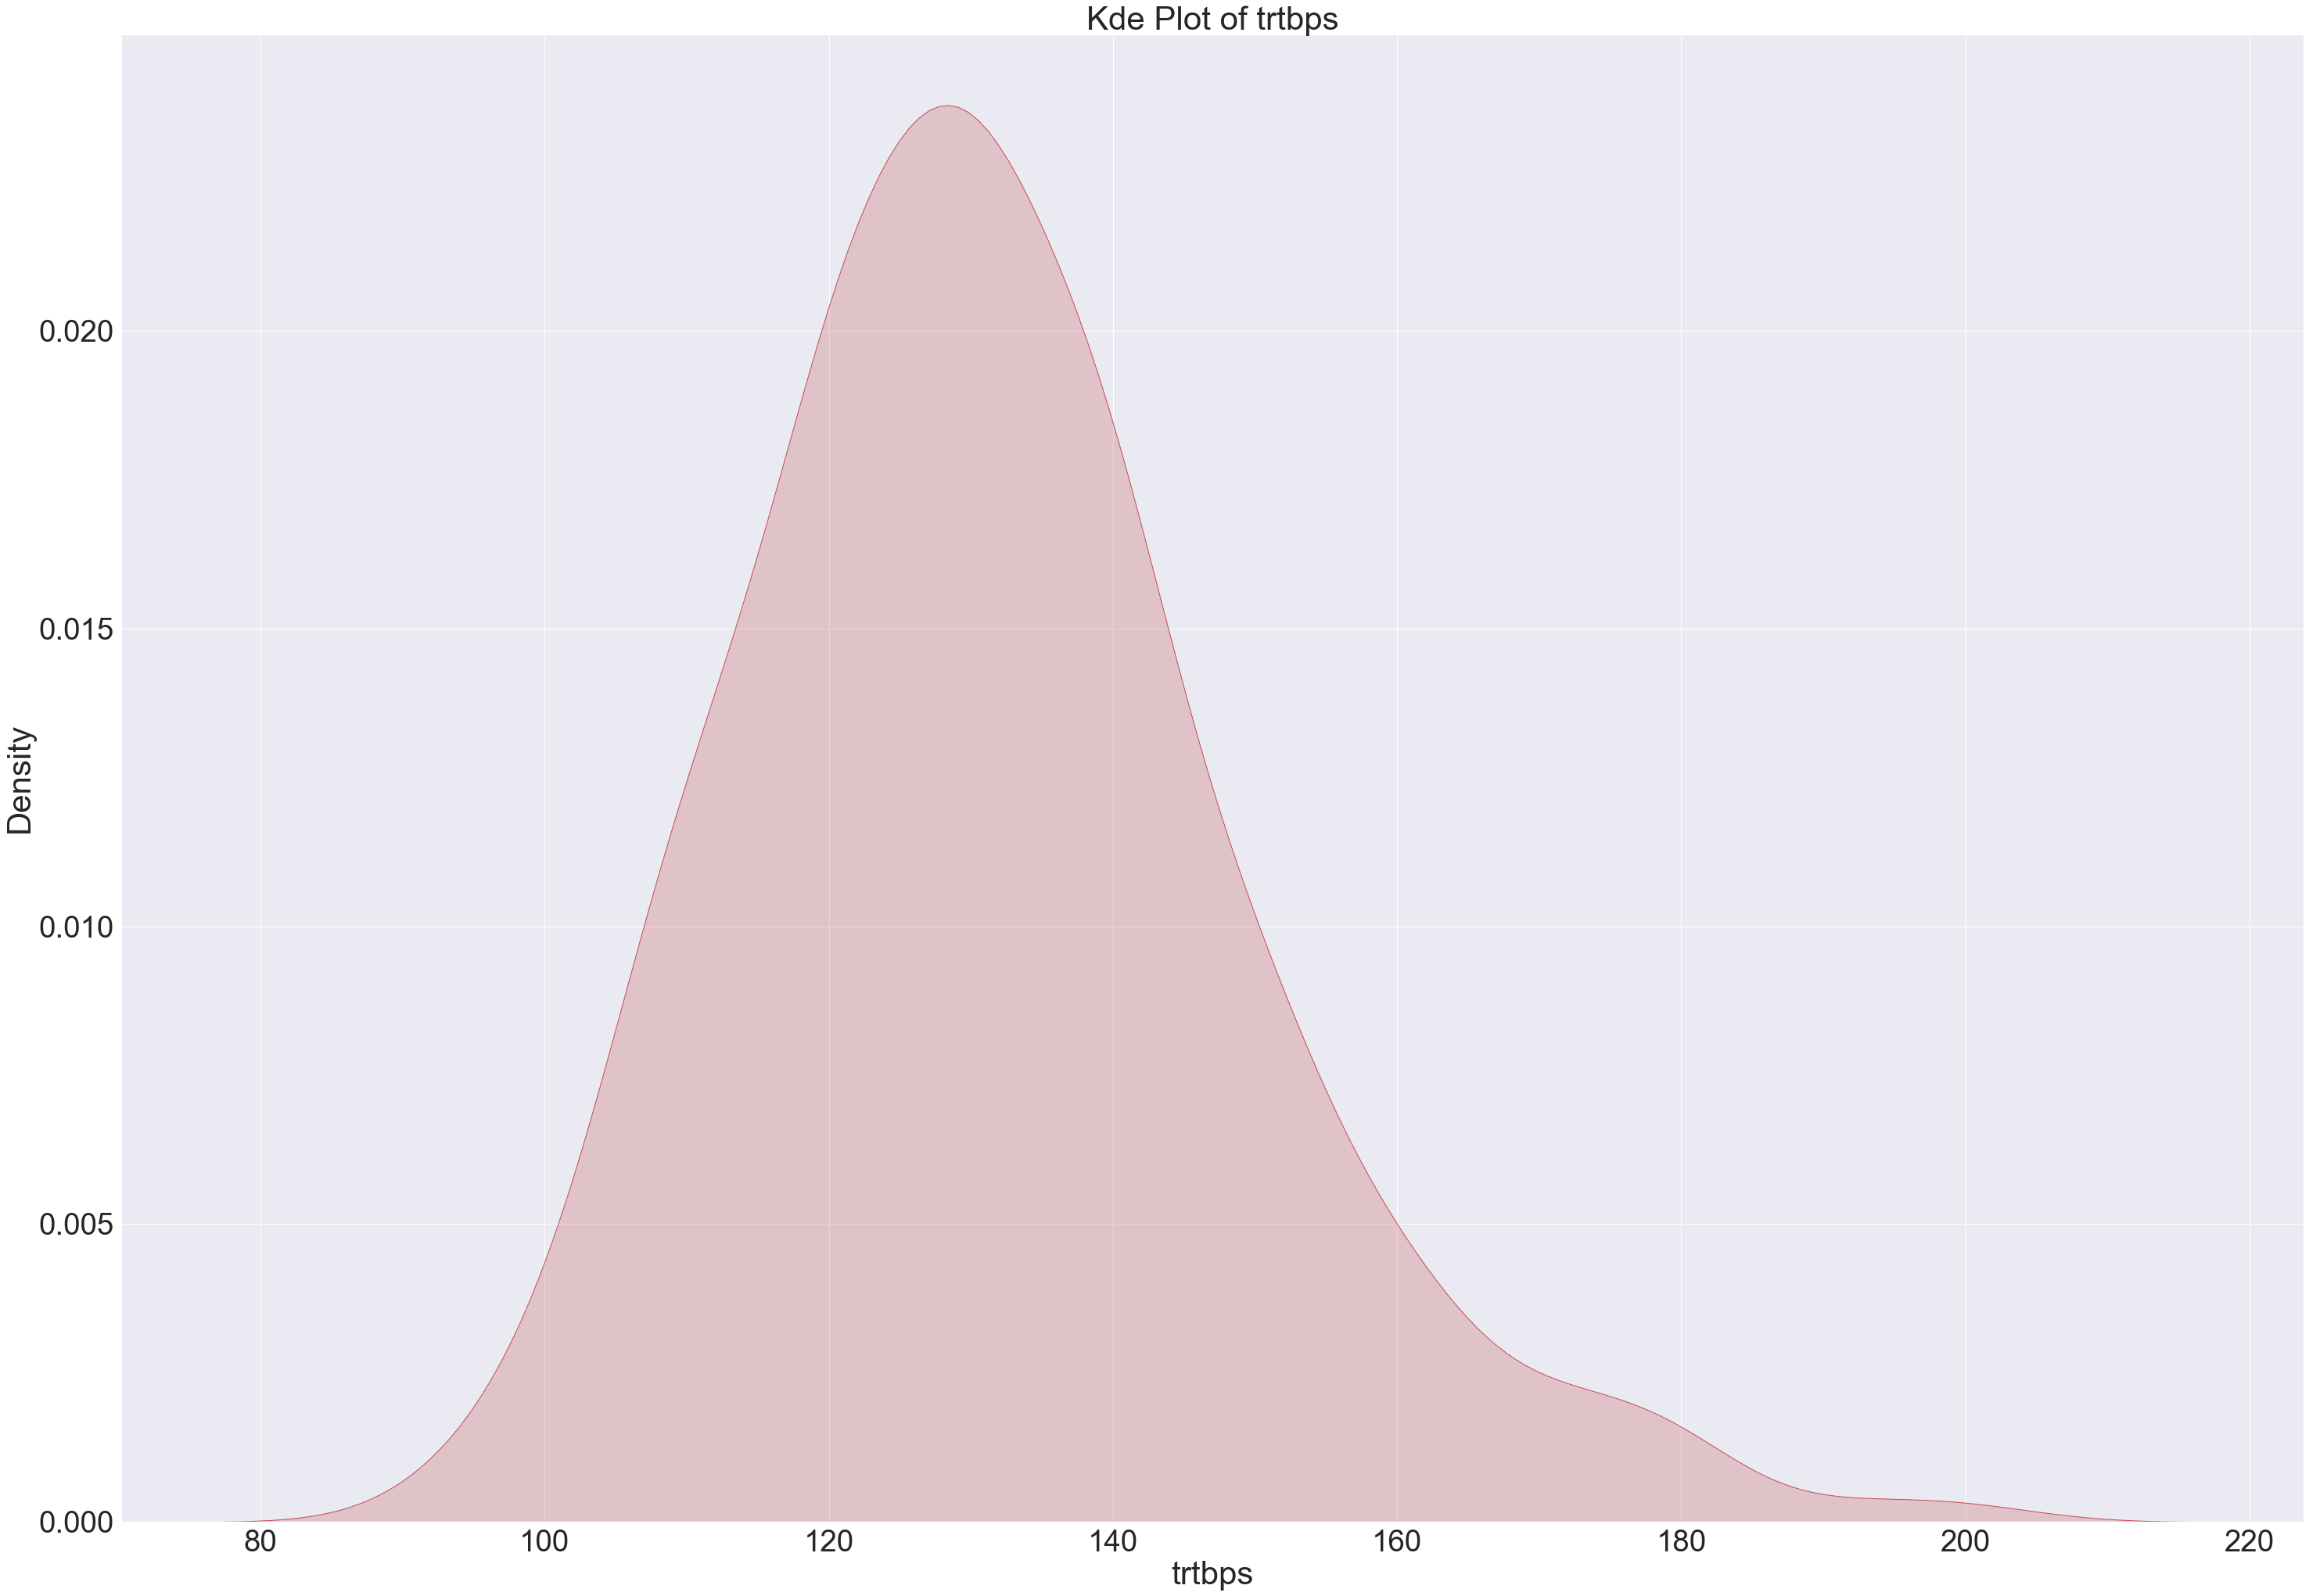

In [123]:
sns.kdeplot(df["trtbps"] , shade=True , color="r")
plt.title("Kde Plot of trtbps")

Text(0.5, 1.0, 'Distribution Plot of chol')

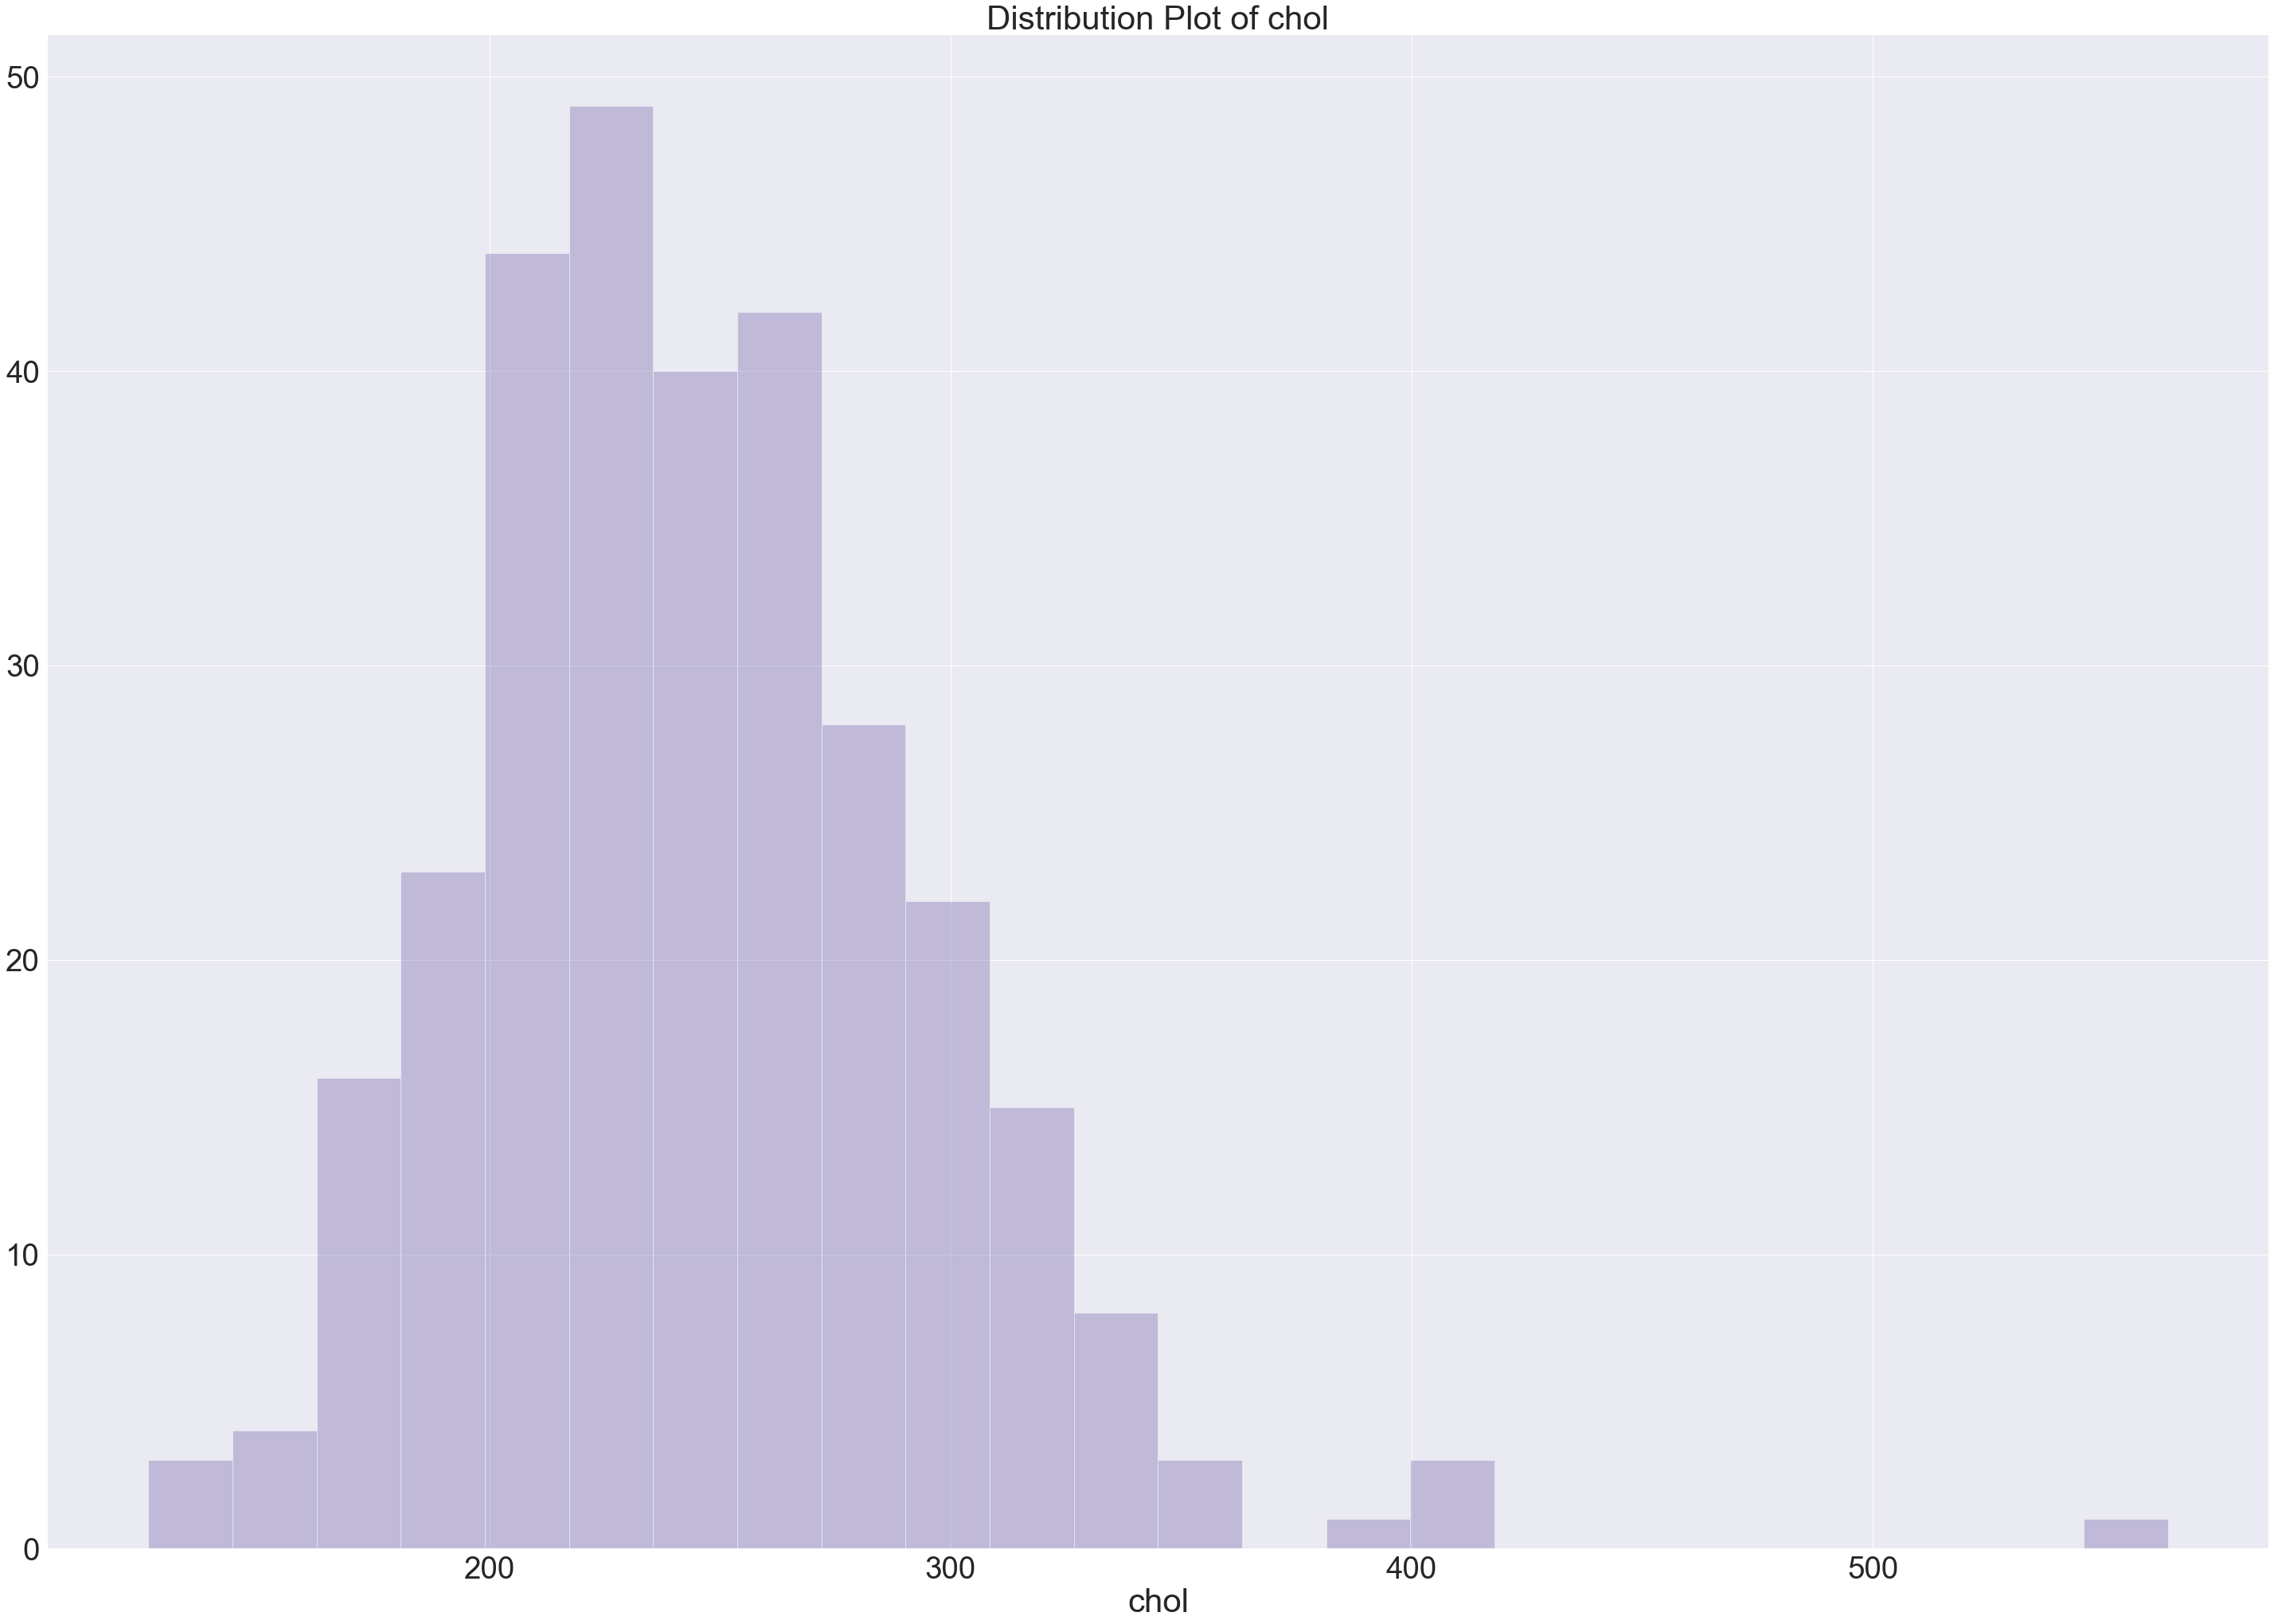

In [116]:
sns.distplot(df["chol"] , kde=False , color="r")
plt.title("Distribution Plot of chol")

Text(0.5, 1.0, 'Kde Plot of chol')

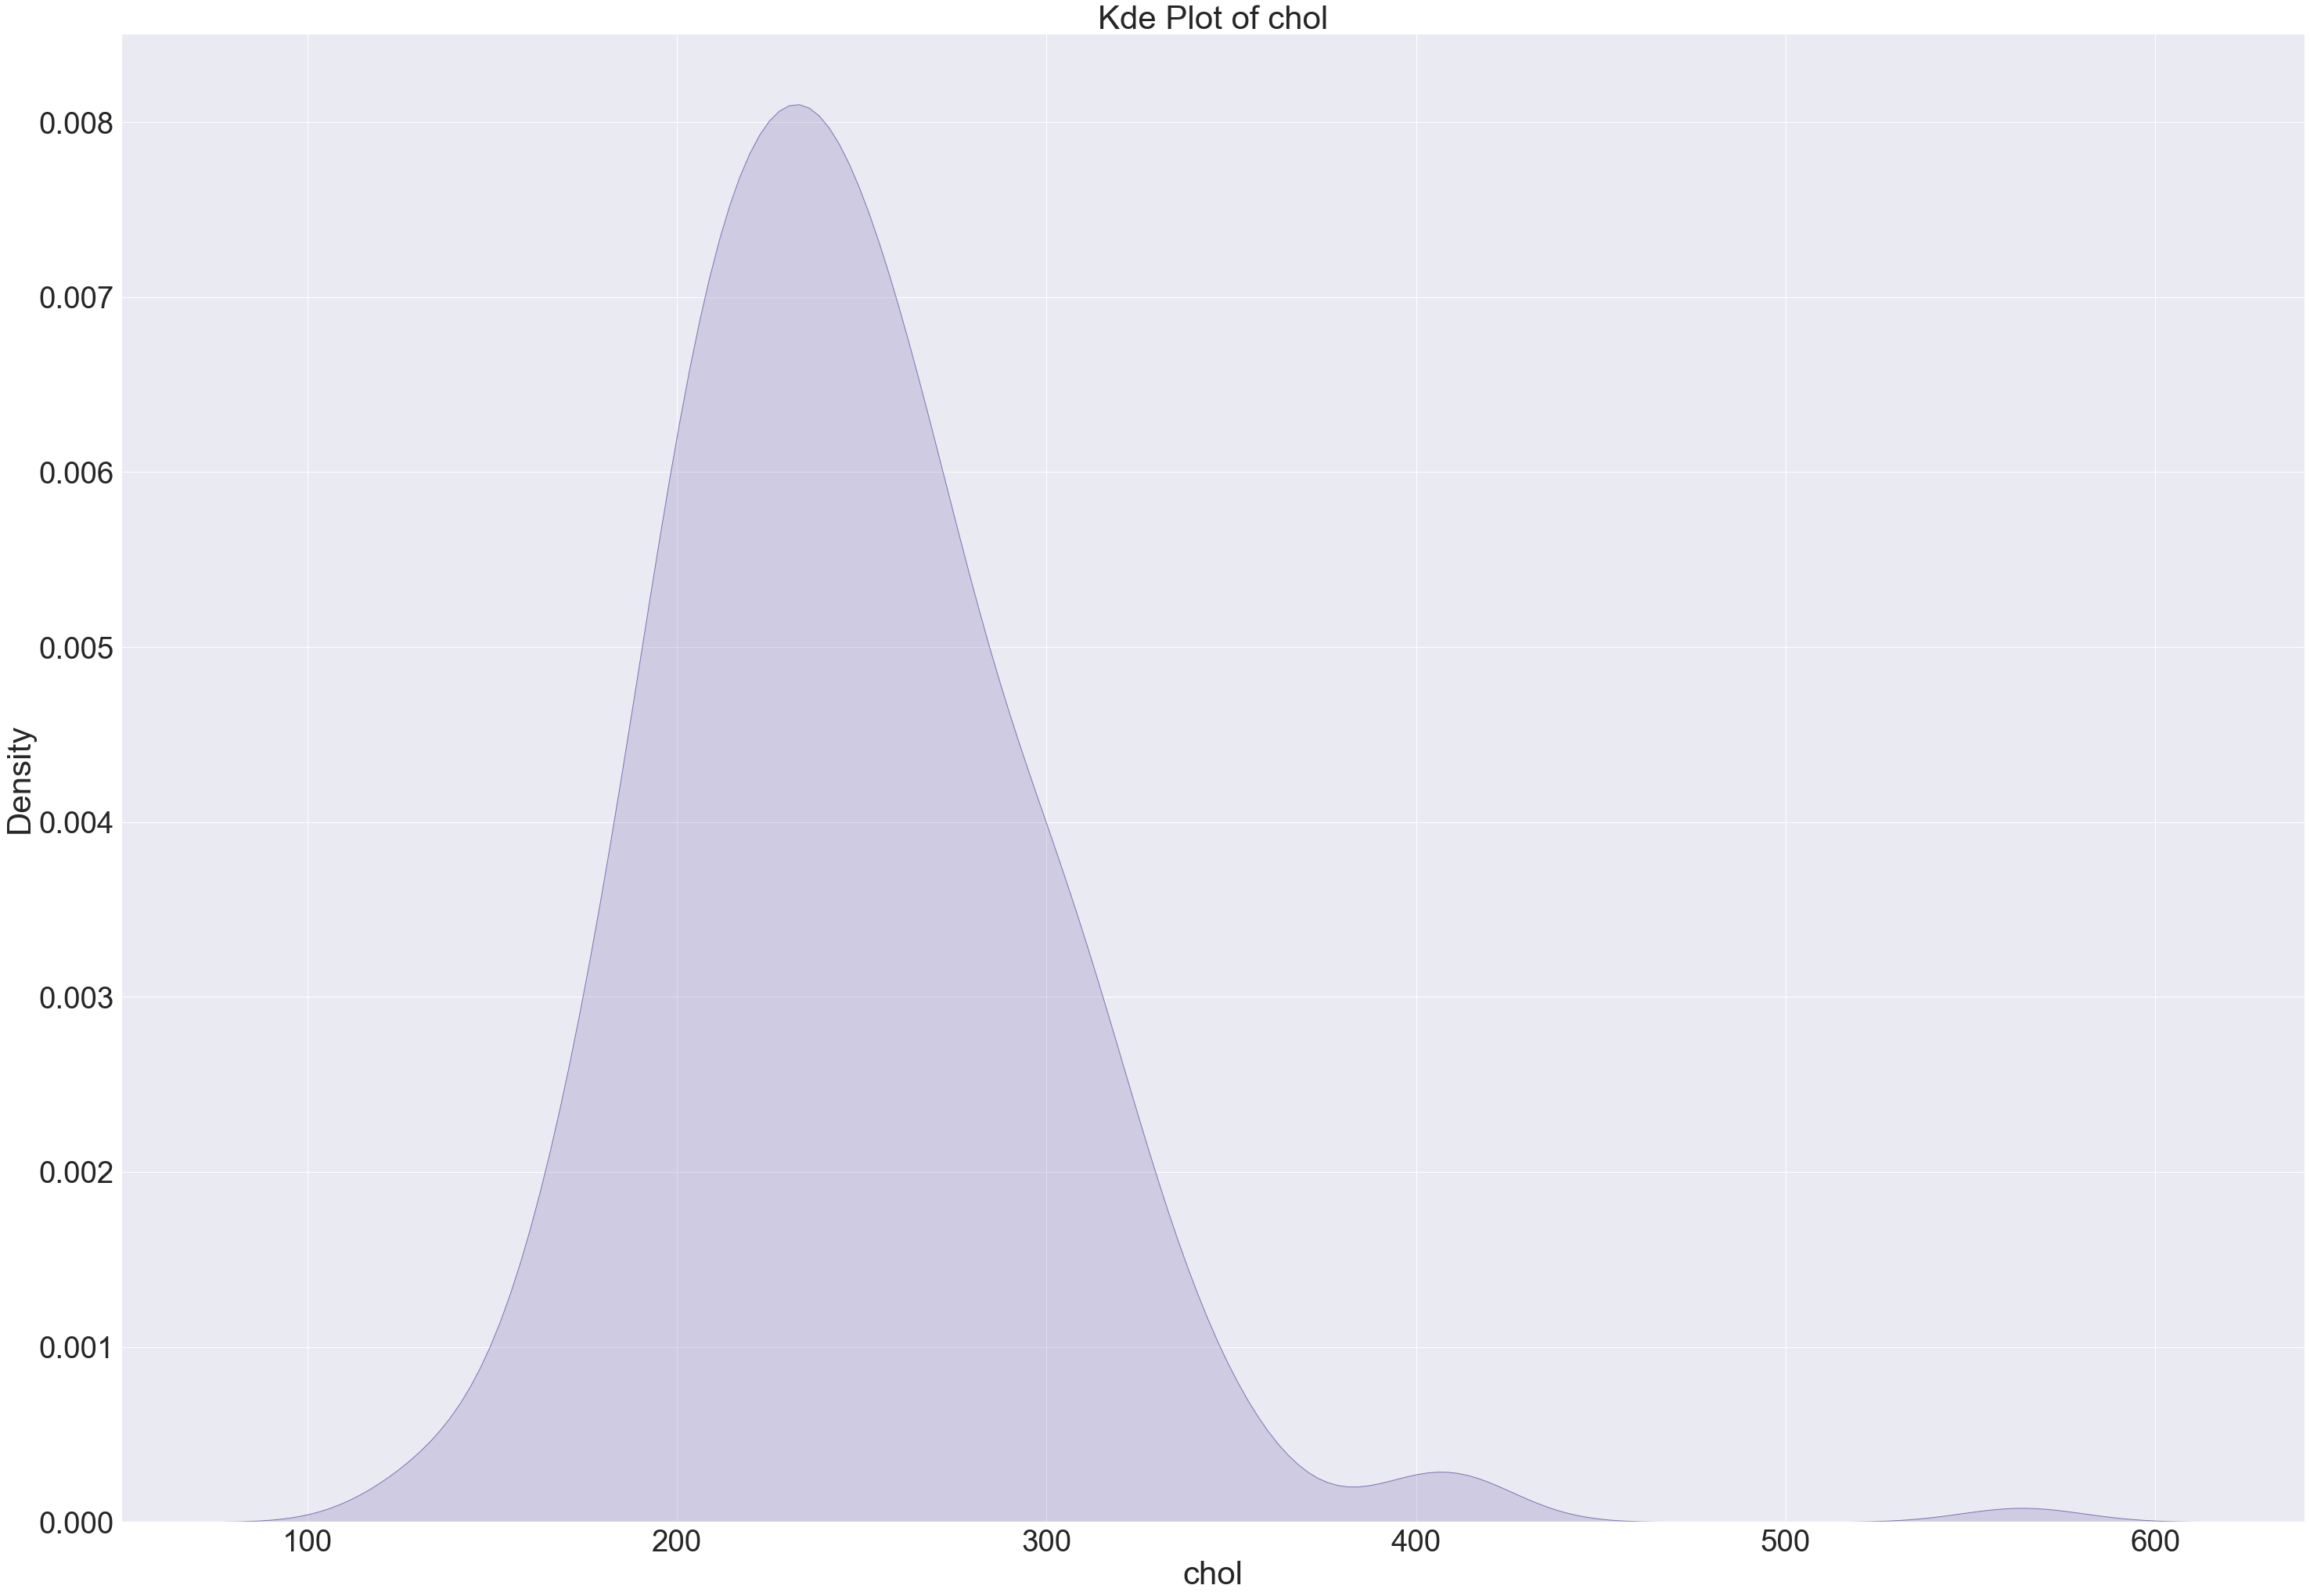

In [117]:
sns.kdeplot(df["chol"] , shade=True , color="r")
plt.title("Kde Plot of chol")

Text(0.5, 1.0, 'Distribution Plot of thalachh')

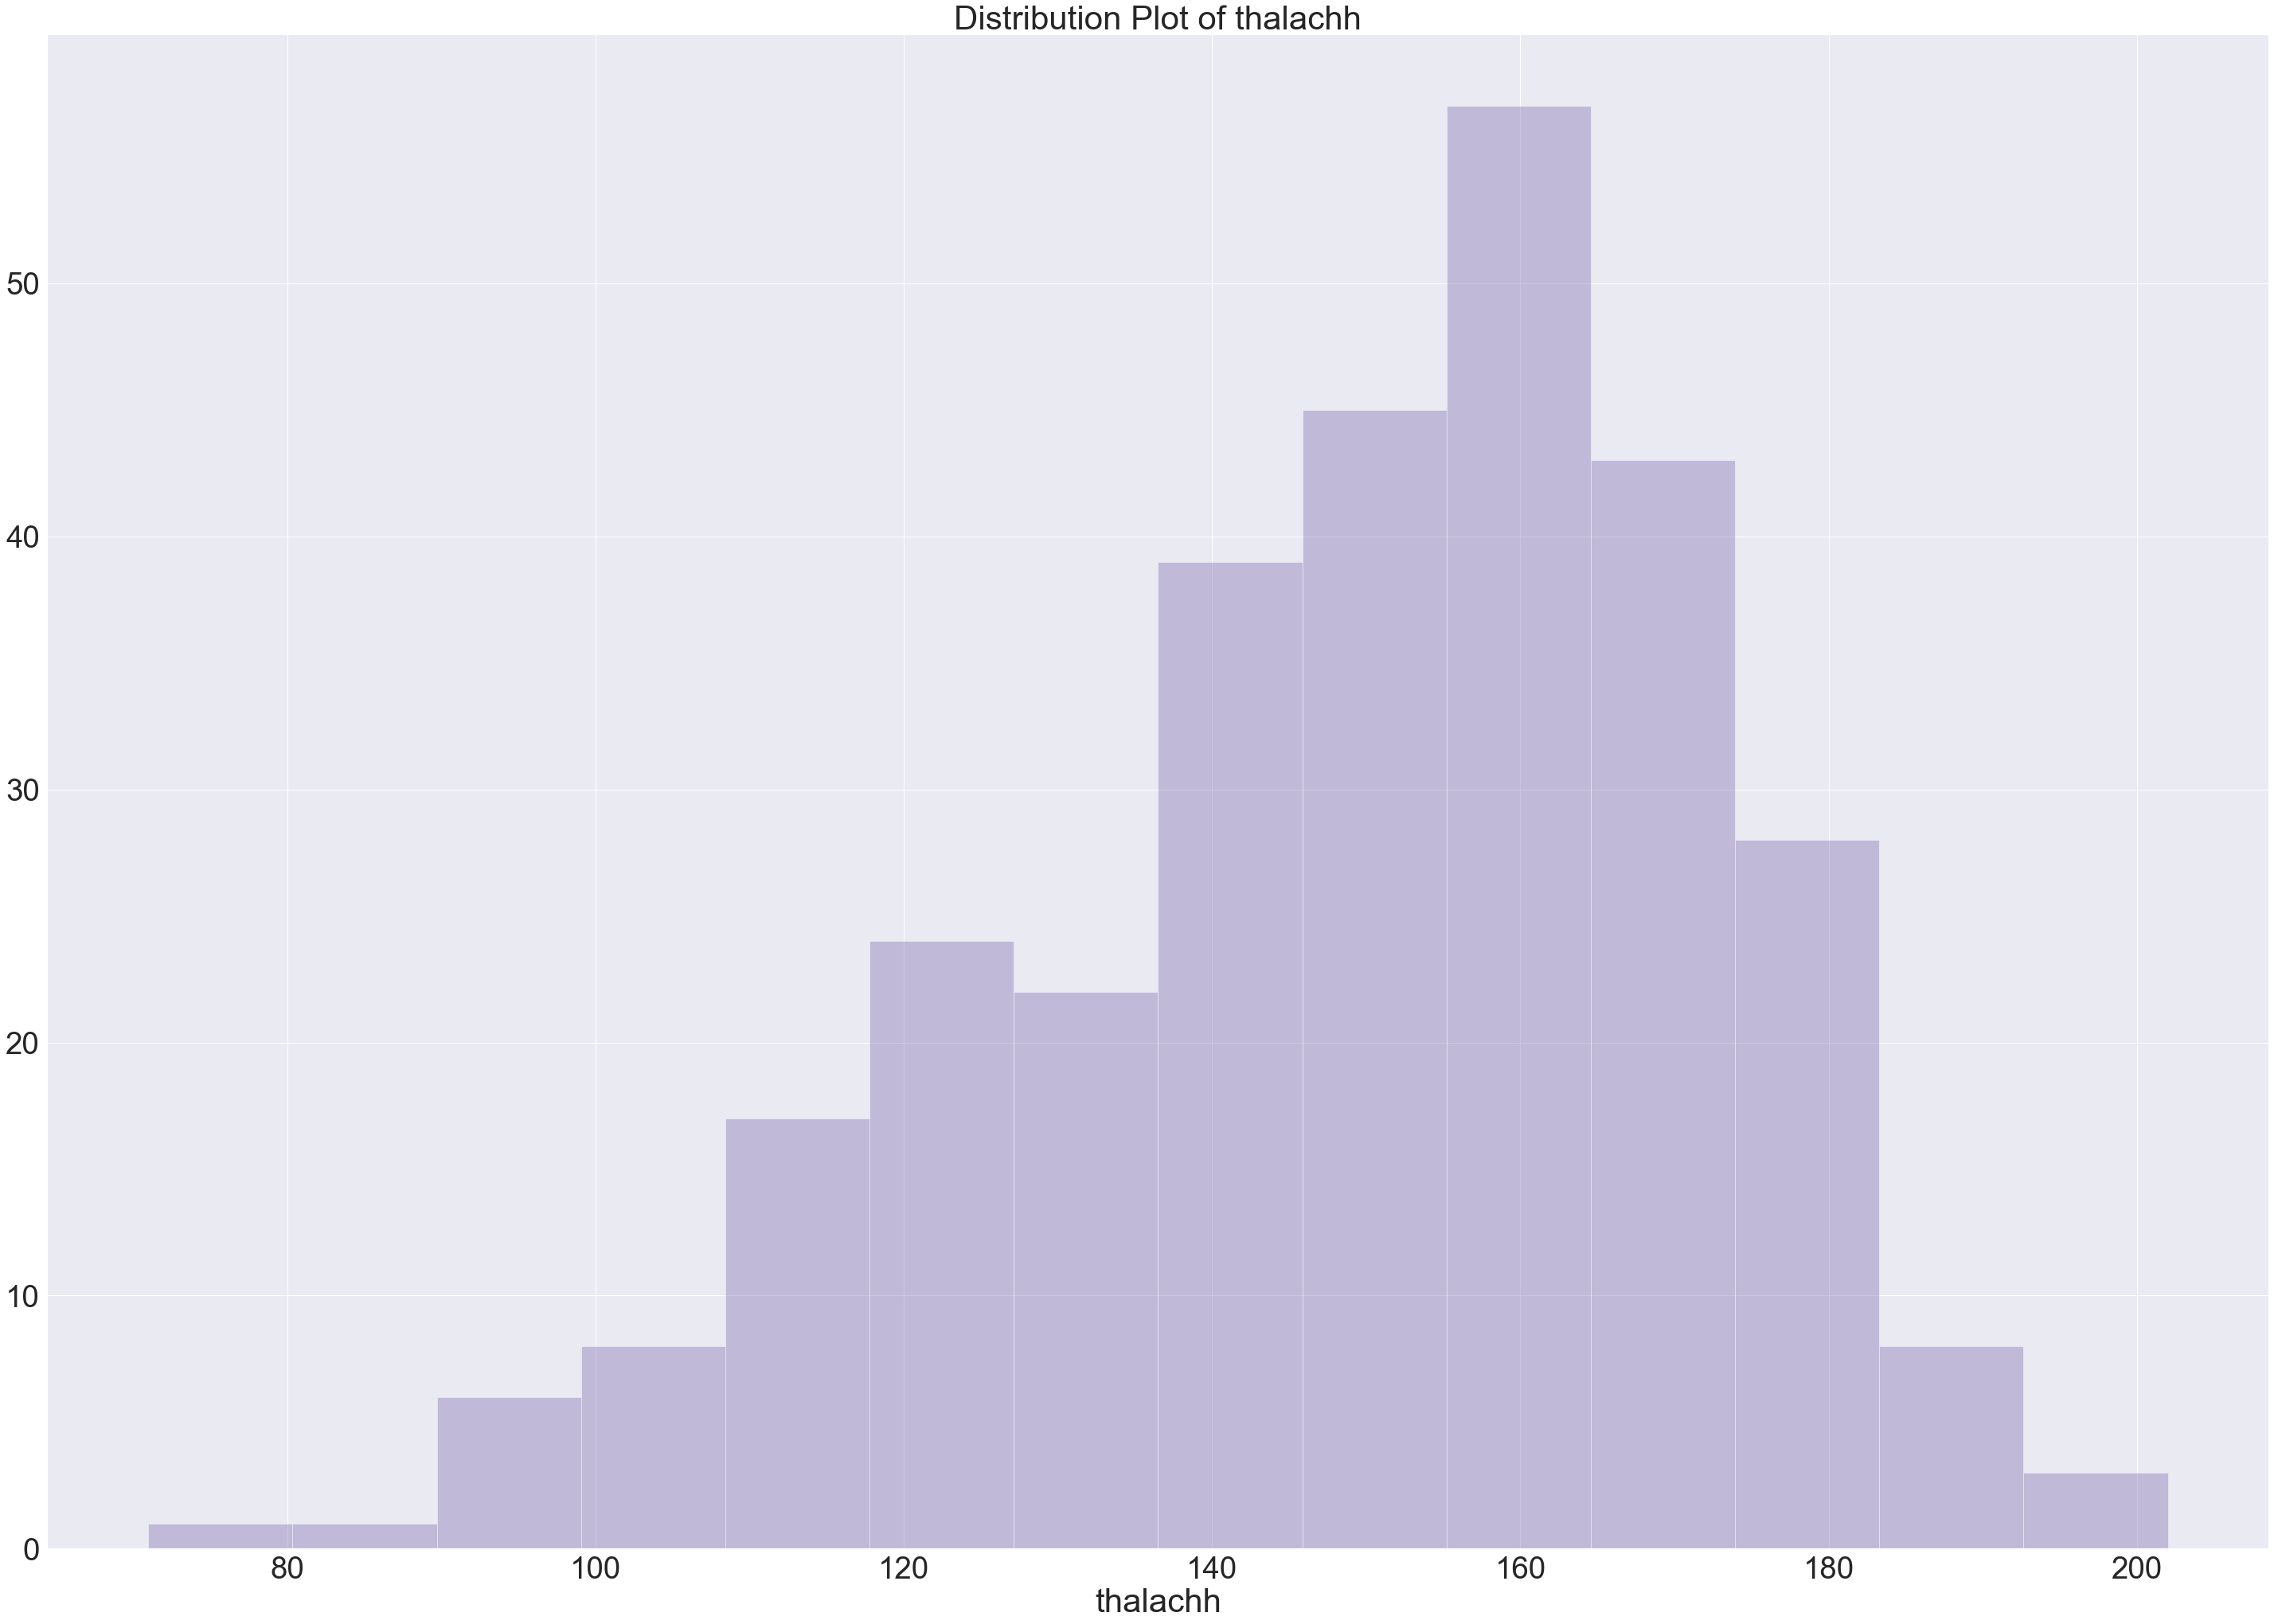

In [118]:
sns.distplot(df["thalachh"] , kde=False , color="r")
plt.title("Distribution Plot of thalachh")

Text(0.5, 1.0, 'Kde Plot of thalachh')

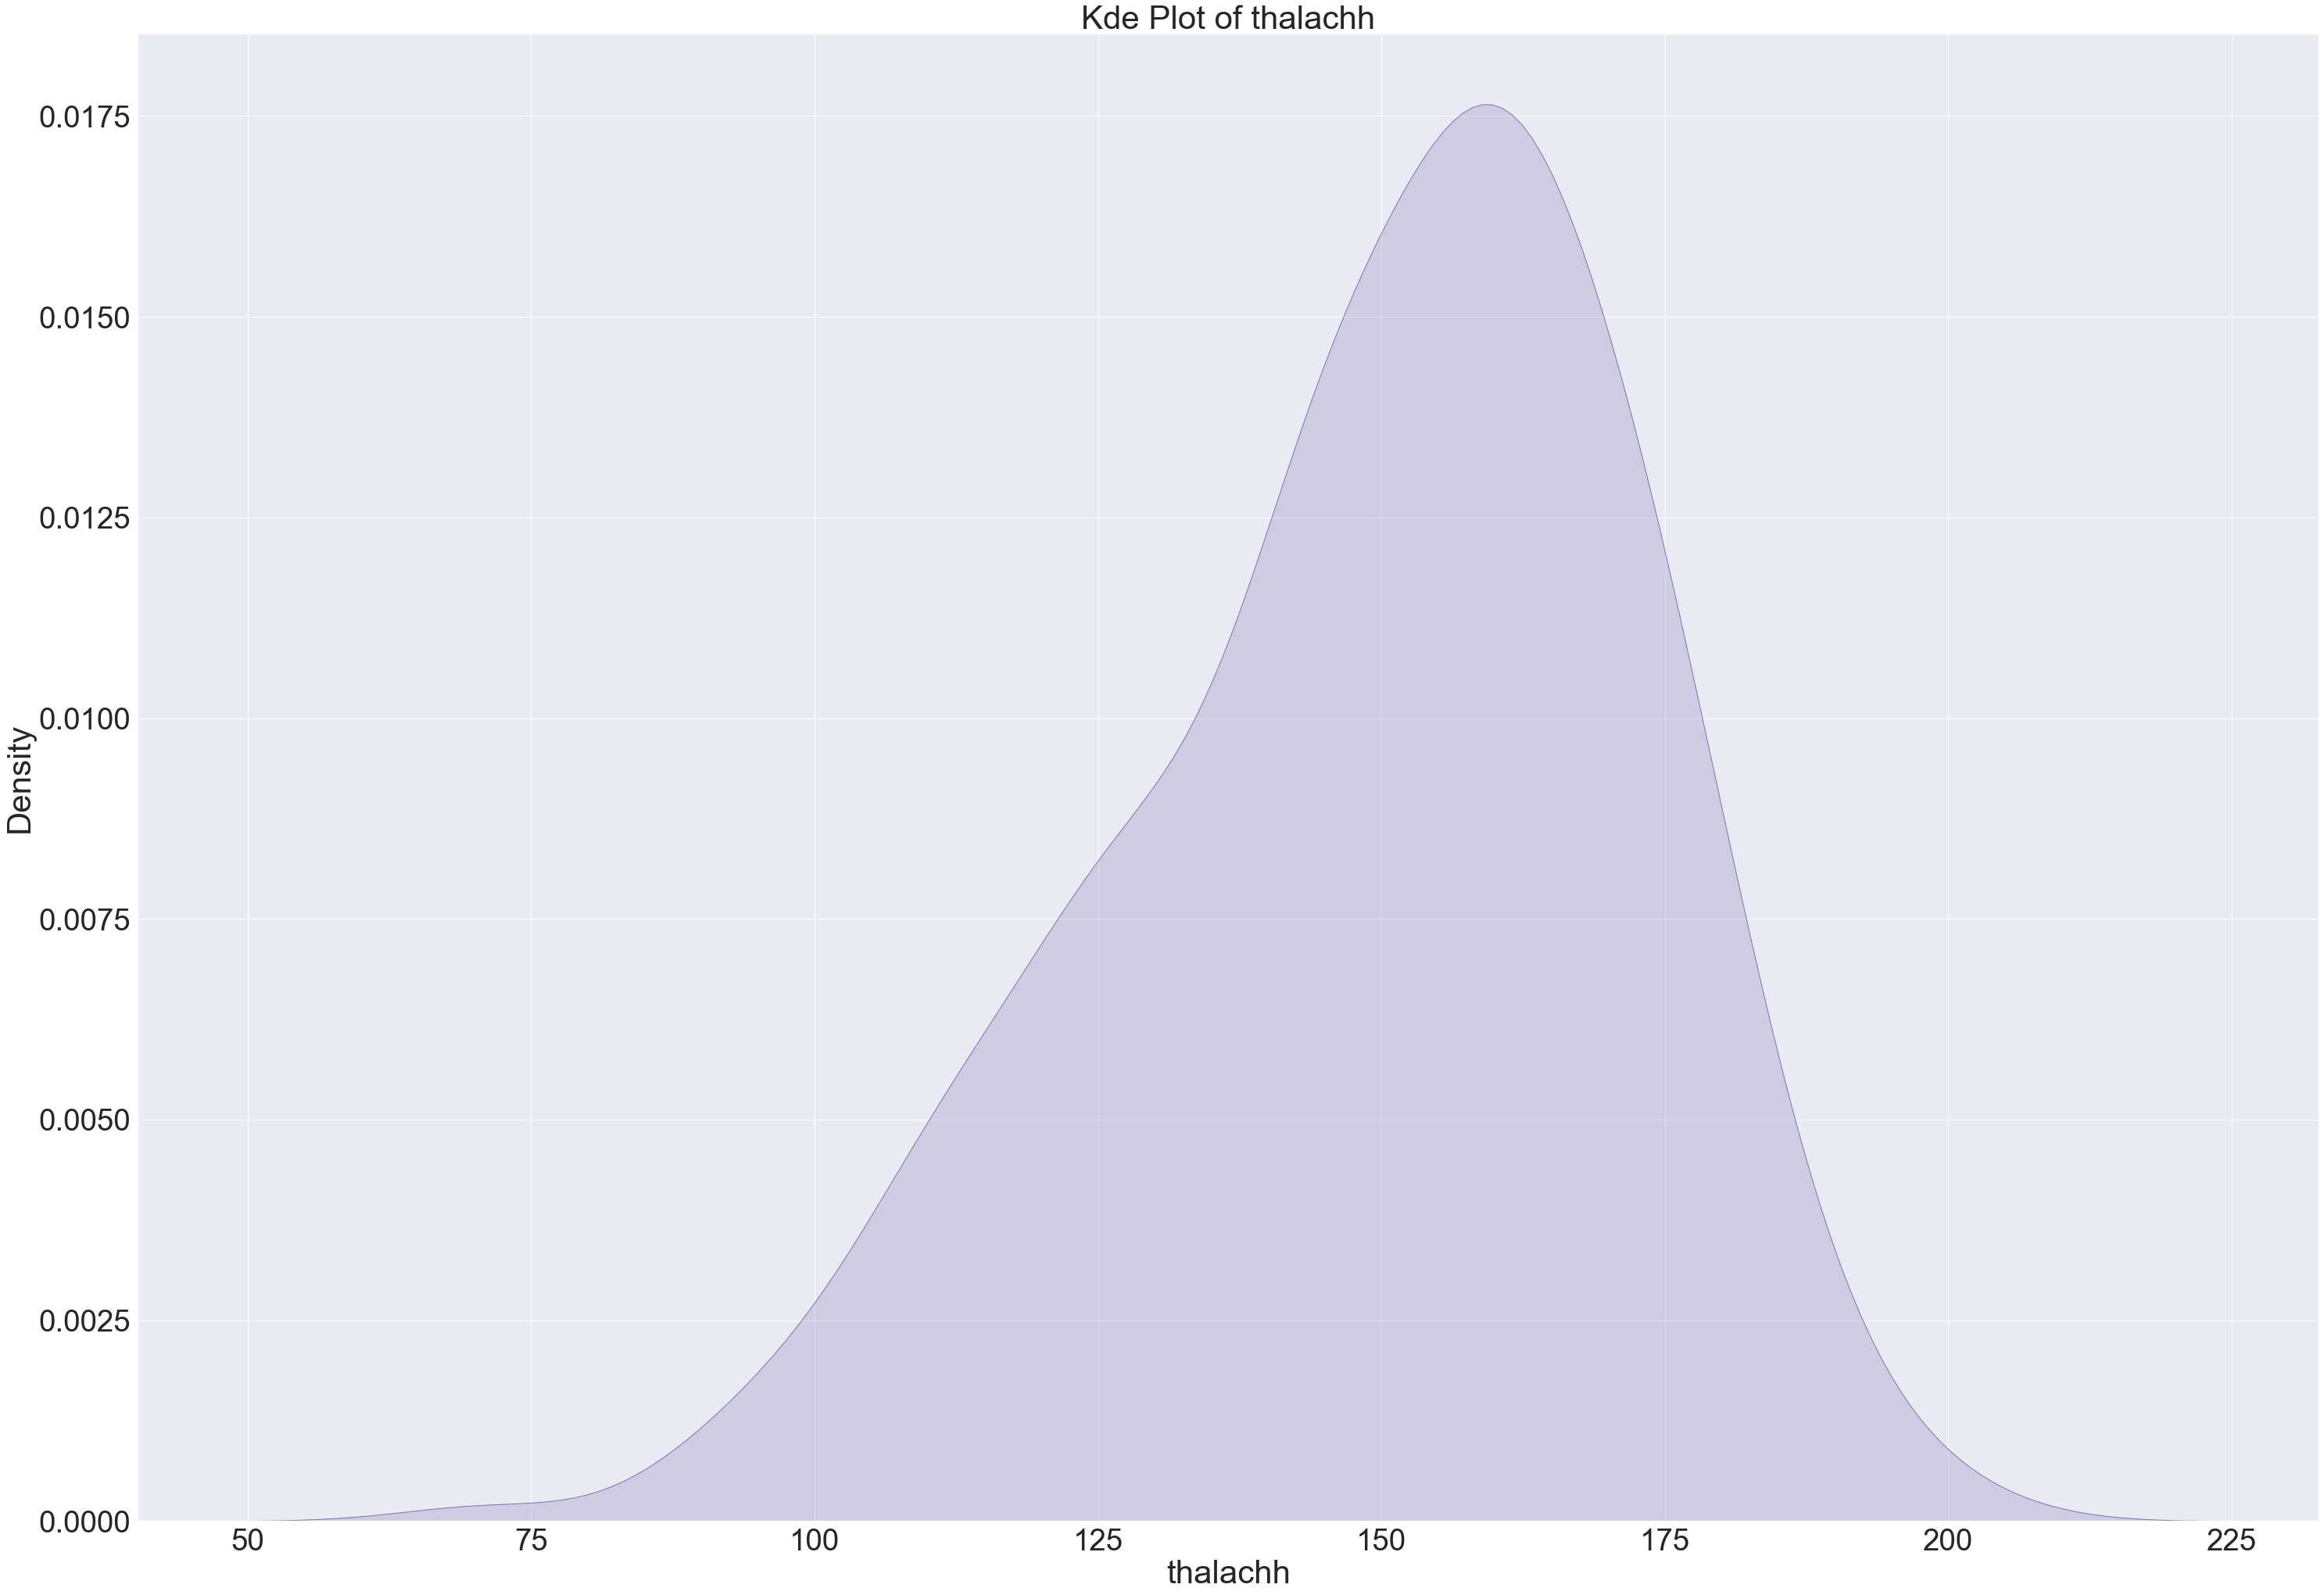

In [119]:
sns.kdeplot(df["thalachh"] , shade=True , color="r")
plt.title("Kde Plot of thalachh")

Text(0.5, 1.0, 'Distribution Plot of oldpeak')

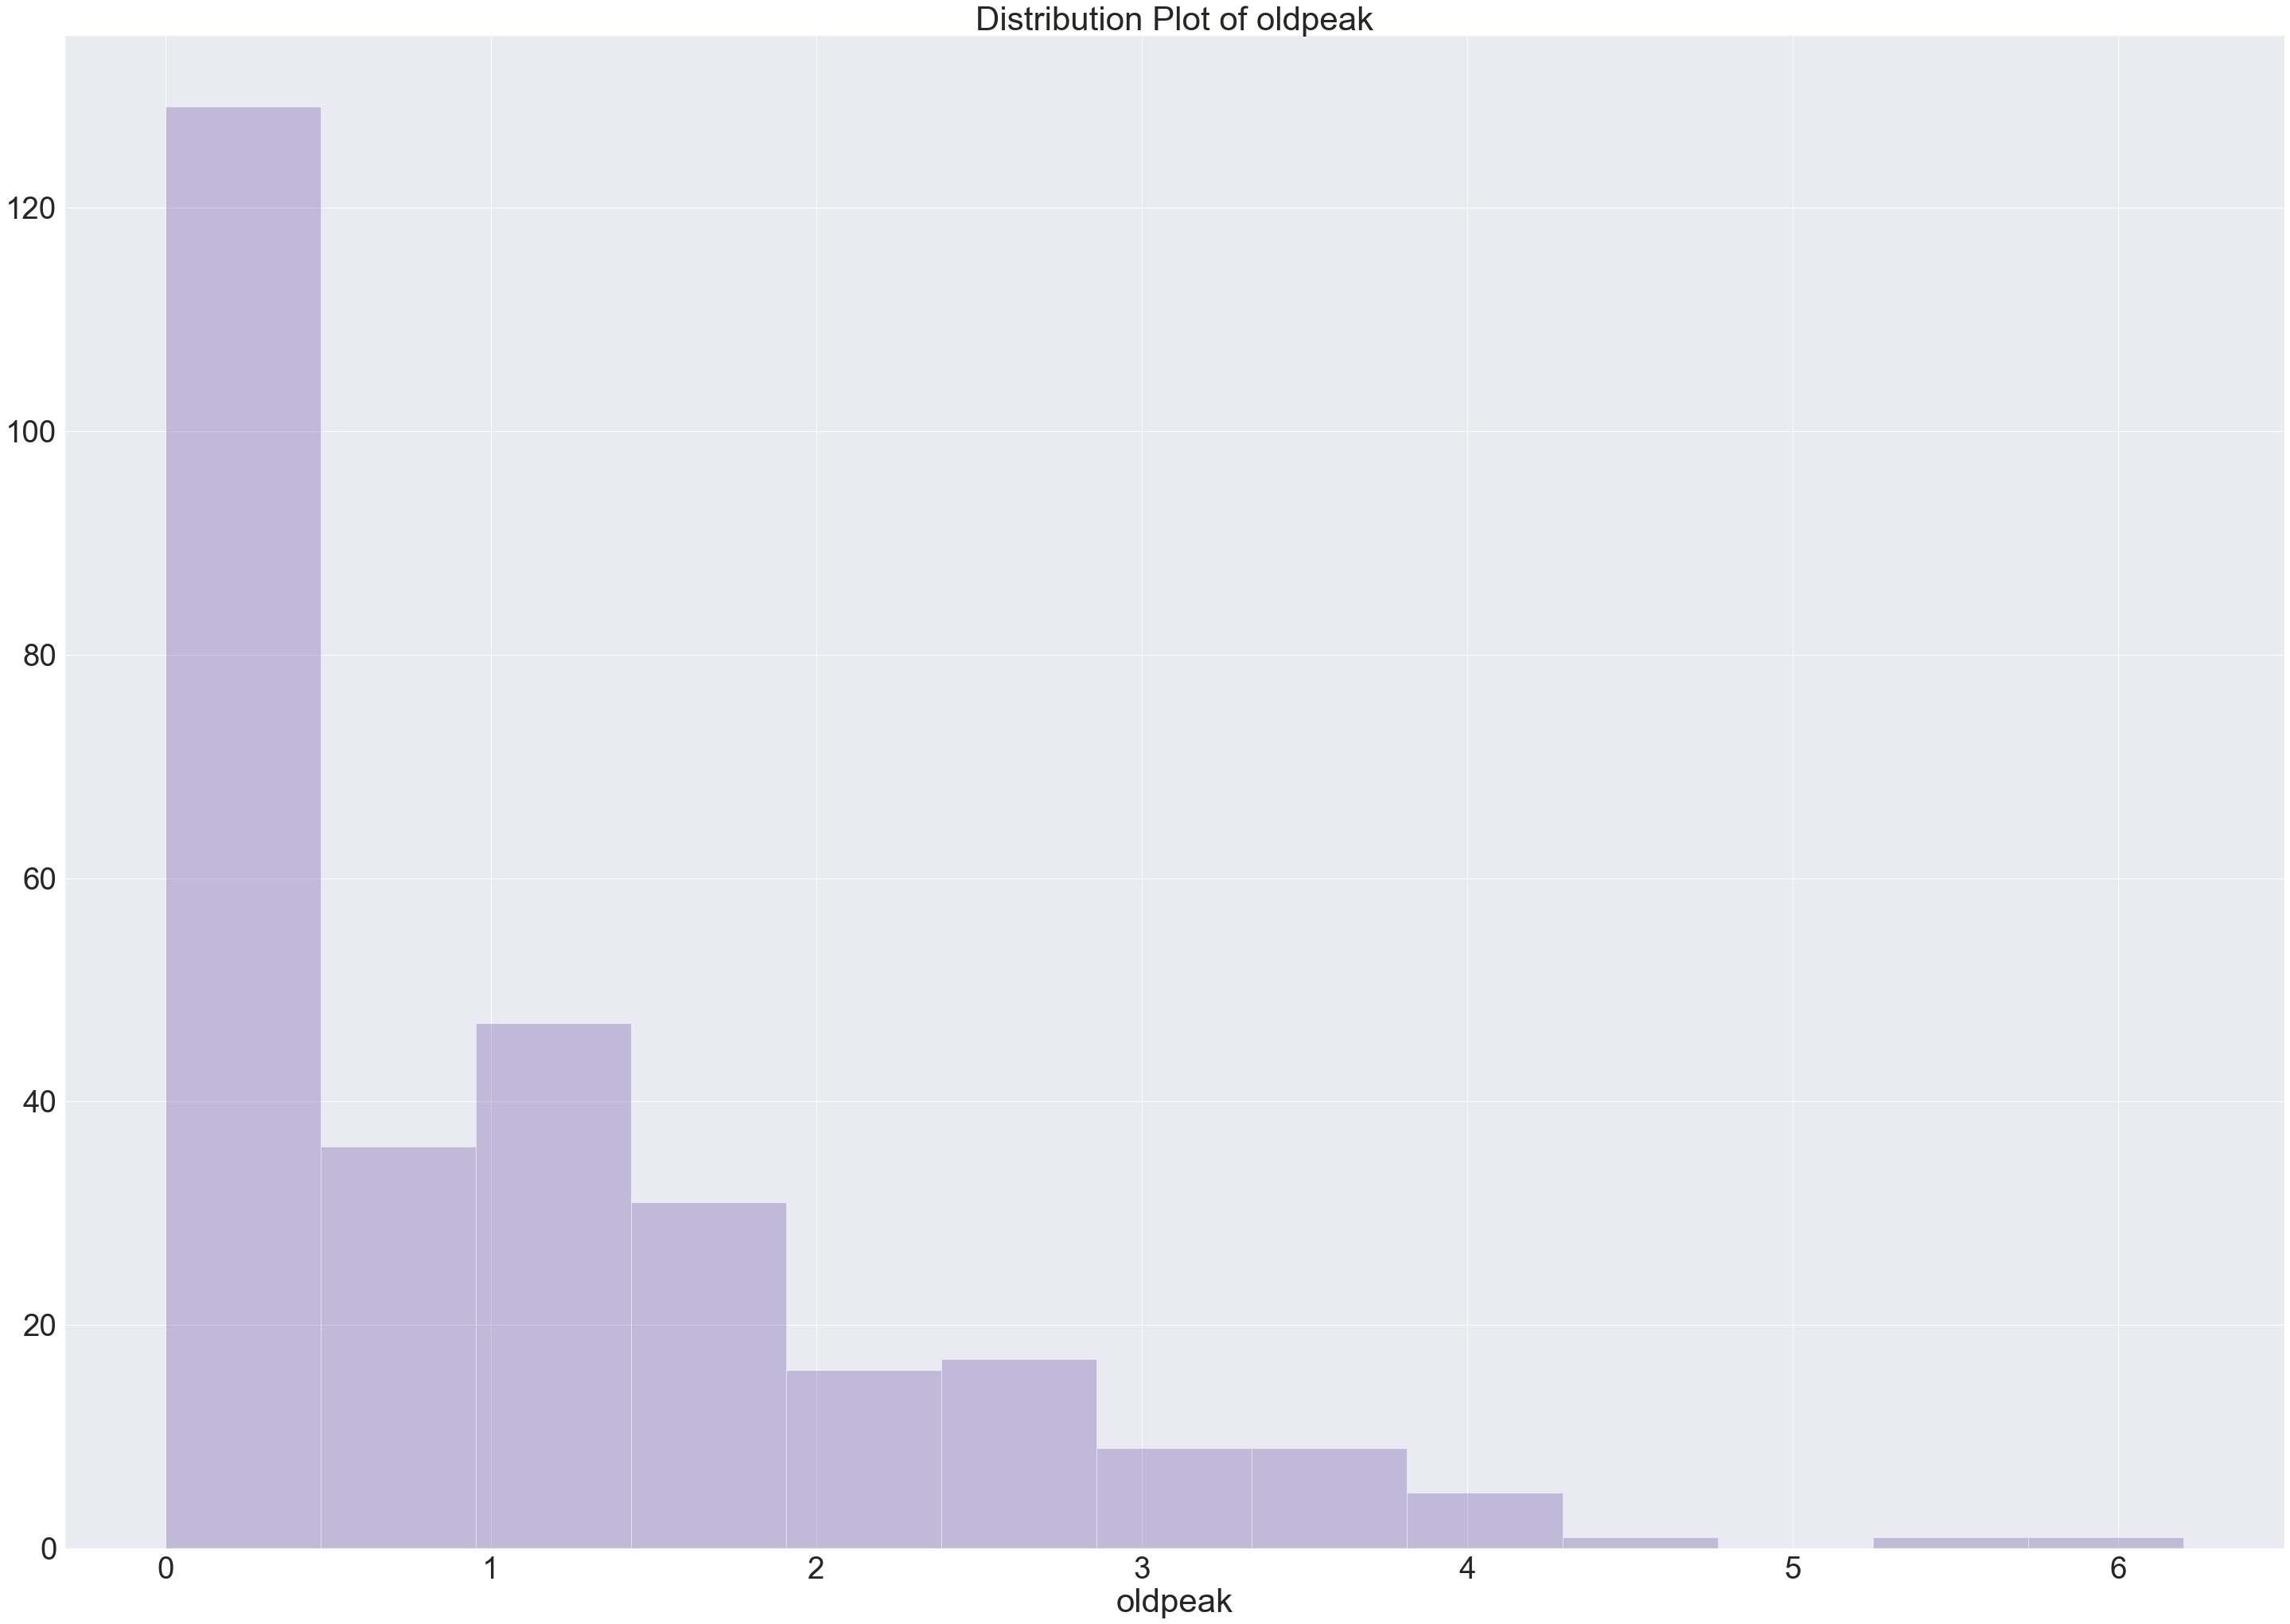

In [120]:
sns.distplot(df["oldpeak"] , kde=False , color="r")
plt.title("Distribution Plot of oldpeak")

Text(0.5, 1.0, 'Kde Plot of oldpeak')

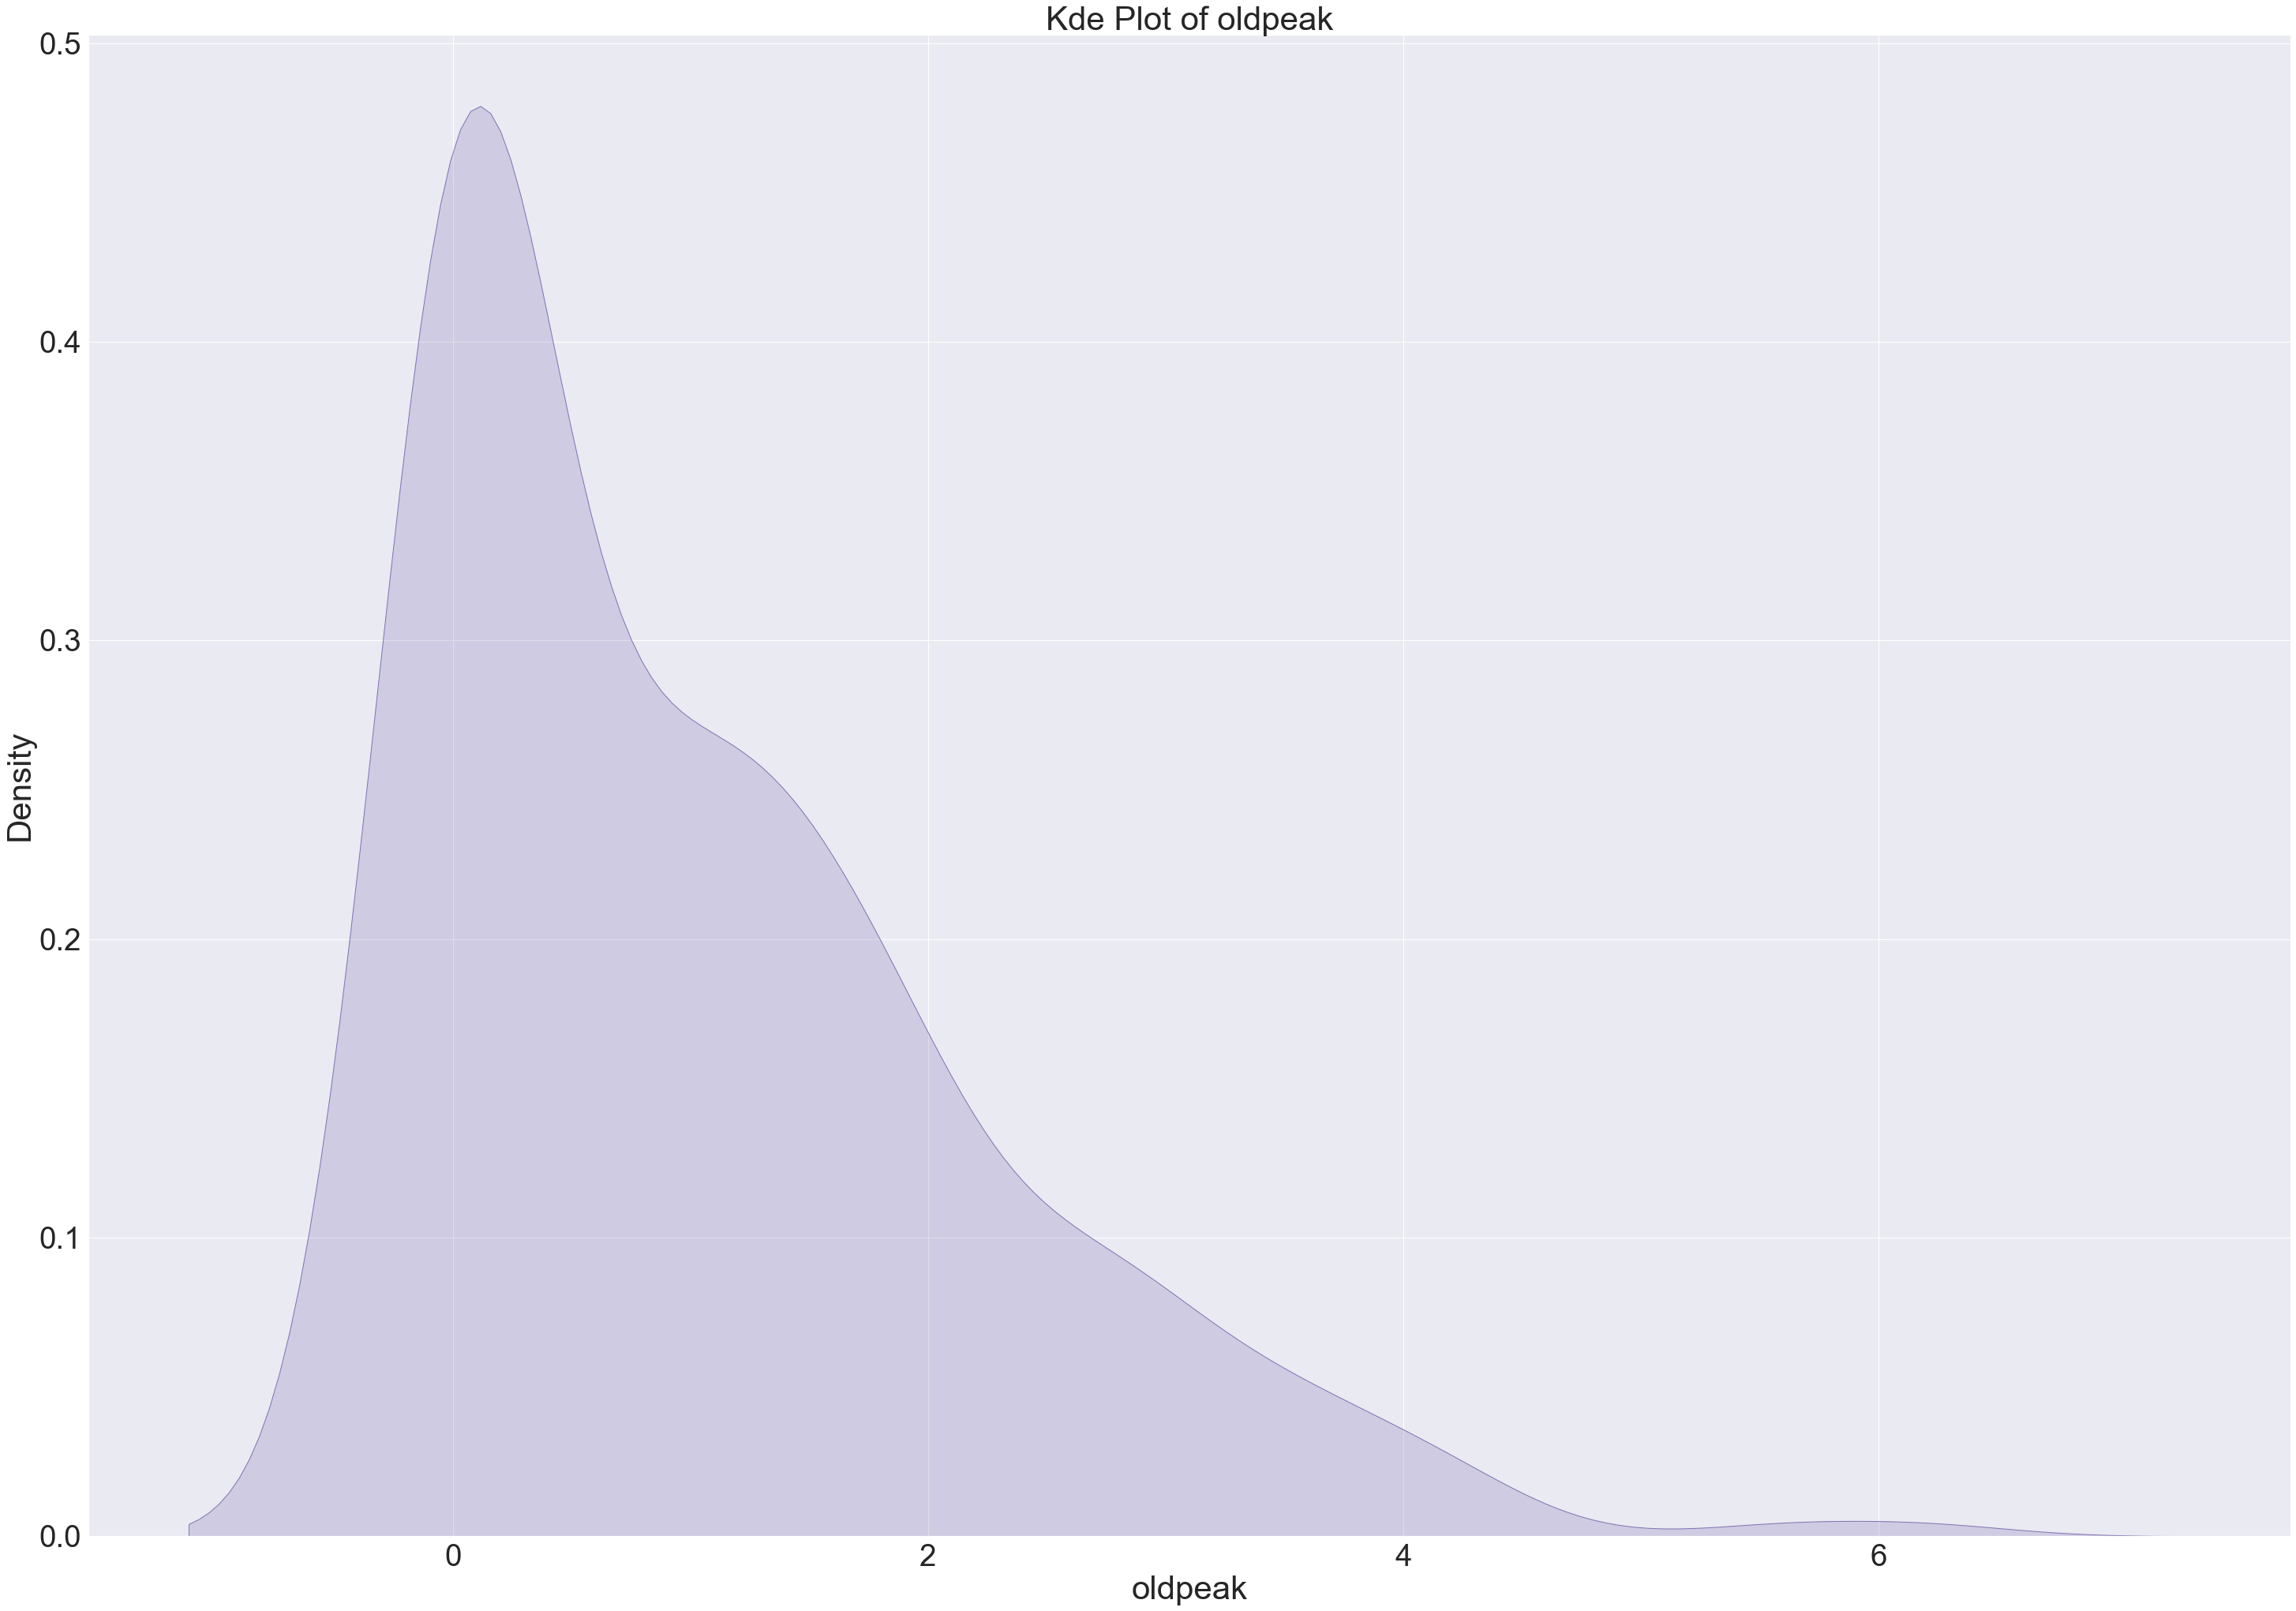

In [121]:
sns.kdeplot(df["oldpeak"] , shade=True , color="r")
plt.title("Kde Plot of oldpeak")

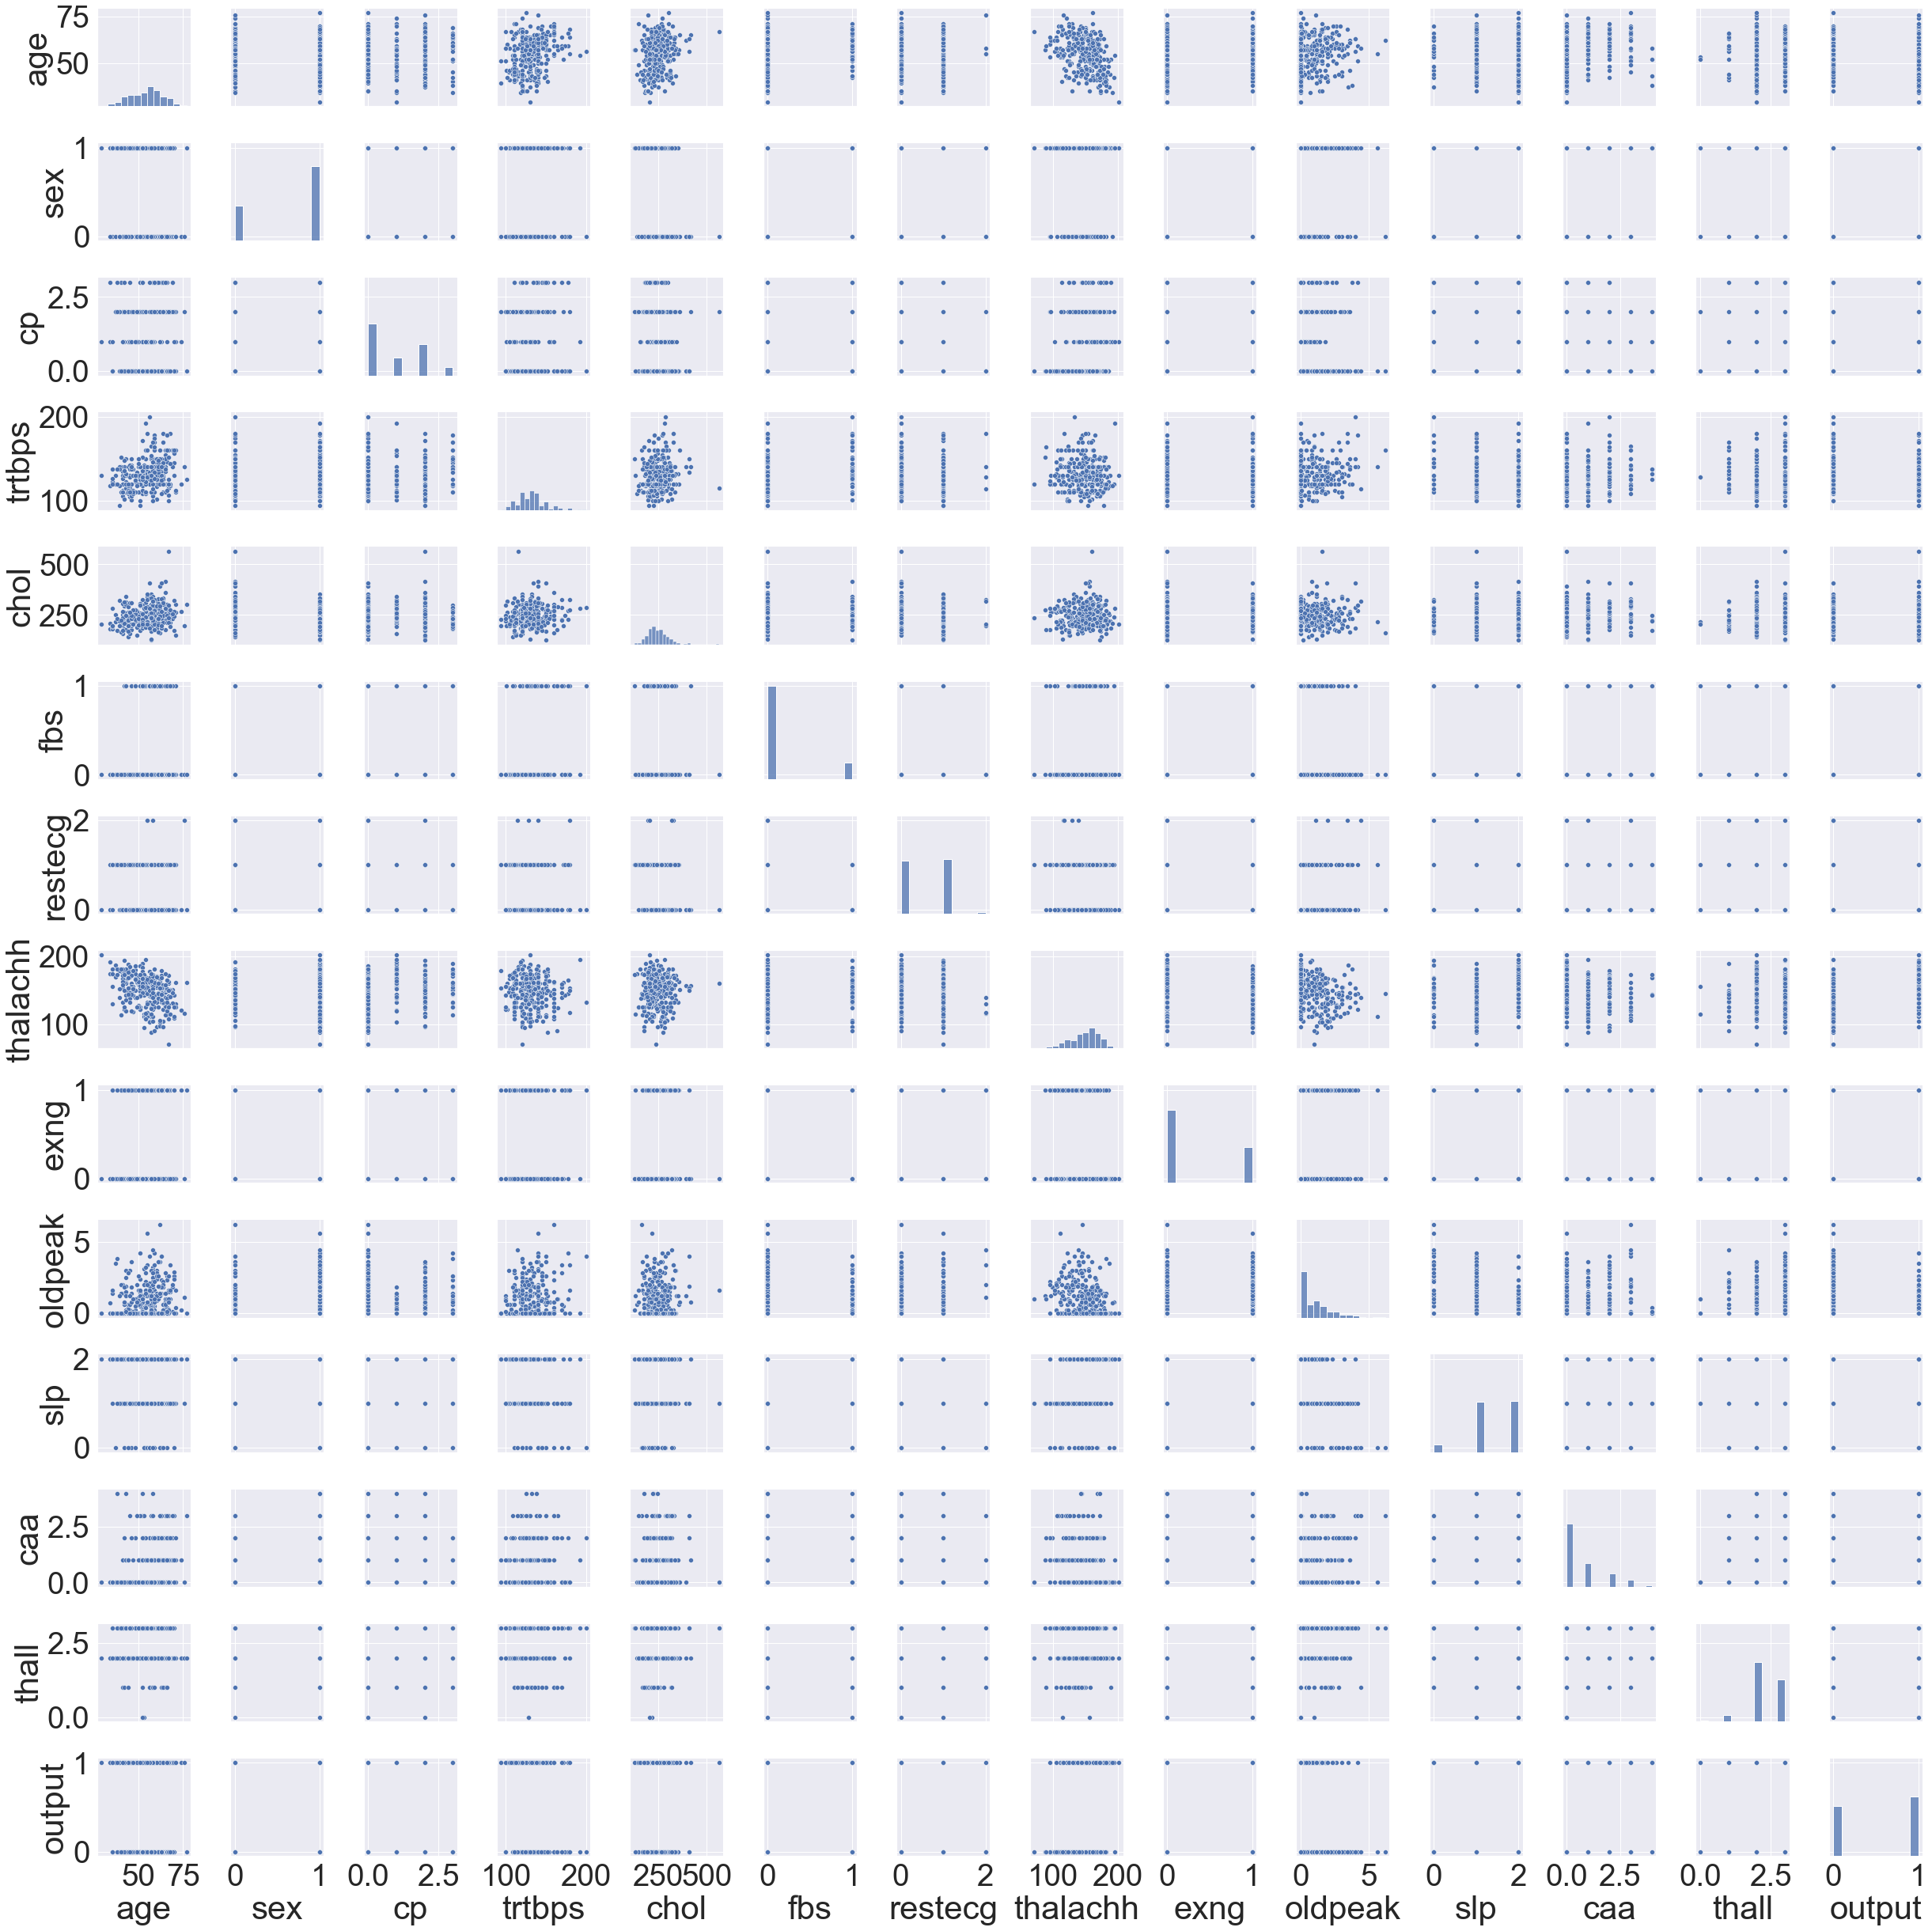

In [124]:
sns.pairplot(df)

In [132]:
sns.set( rc = {"figure.figsize" : [20 ,20]} , font_scale=1.5)

Text(0.5, 1.0, 'Swarm Plot of cp and trtbps Based on output ')

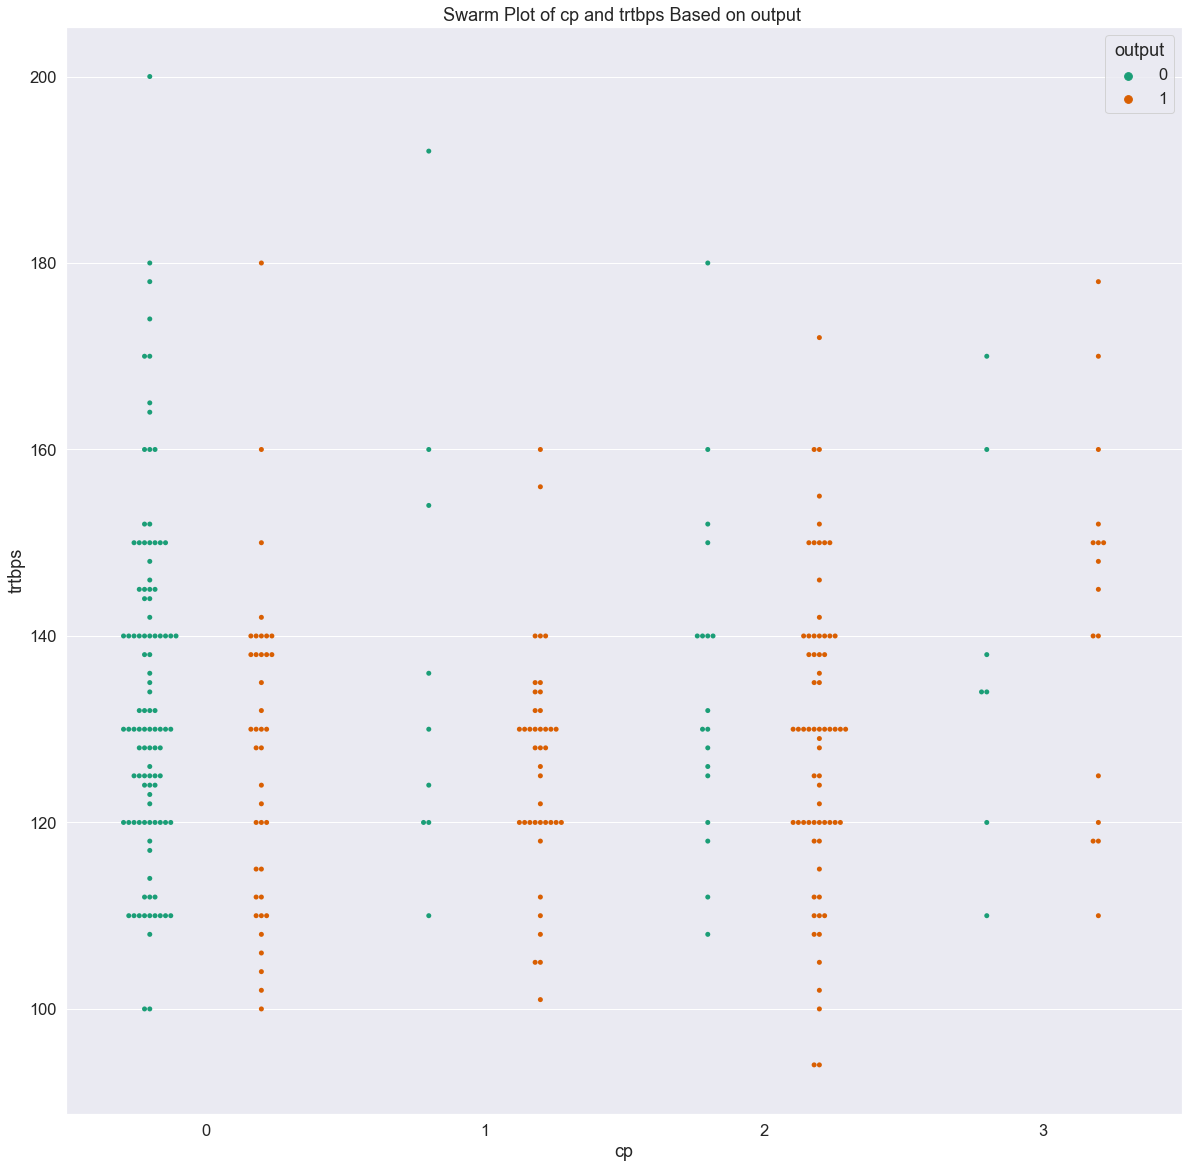

In [133]:
sns.swarmplot( x = "cp" , y = "trtbps" , data = df ,hue = "output" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of cp and trtbps Based on output ")

Text(0.5, 1.0, 'Swarm Plot of sex and trtbps Based on output ')

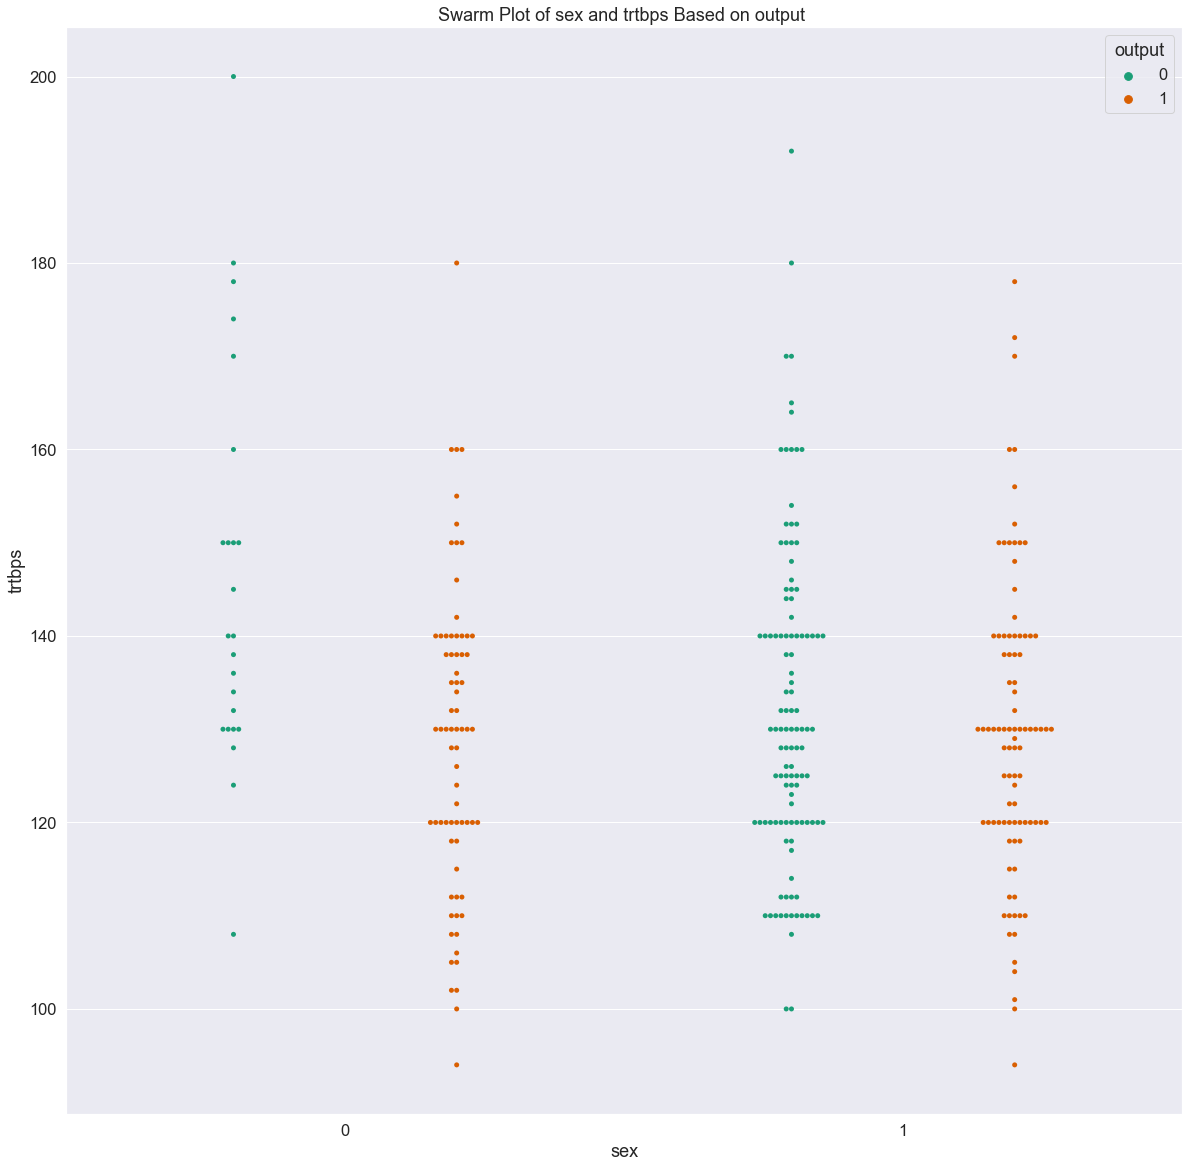

In [134]:
sns.swarmplot( x = "sex" , y = "trtbps" , data = df ,hue = "output" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of sex and trtbps Based on output ")

Text(0.5, 1.0, 'Swarm Plot of fbs and trtbps Based on output ')

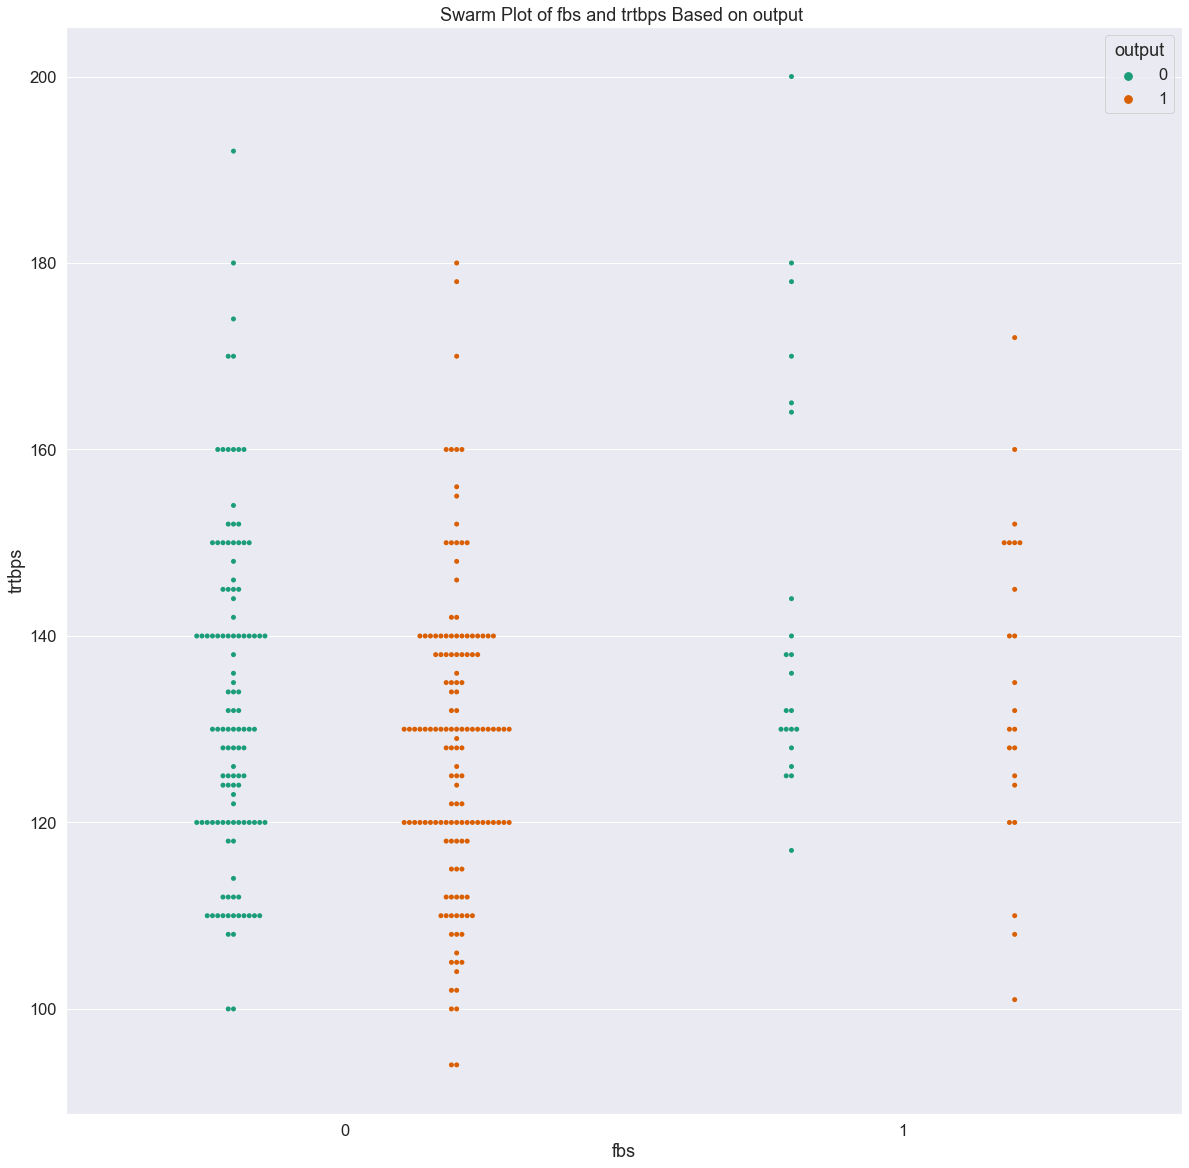

In [135]:
sns.swarmplot( x = "fbs" , y = "trtbps" , data = df ,hue = "output" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of fbs and trtbps Based on output ")

Text(0.5, 1.0, 'Swarm Plot of thall and thalachh Based on output ')

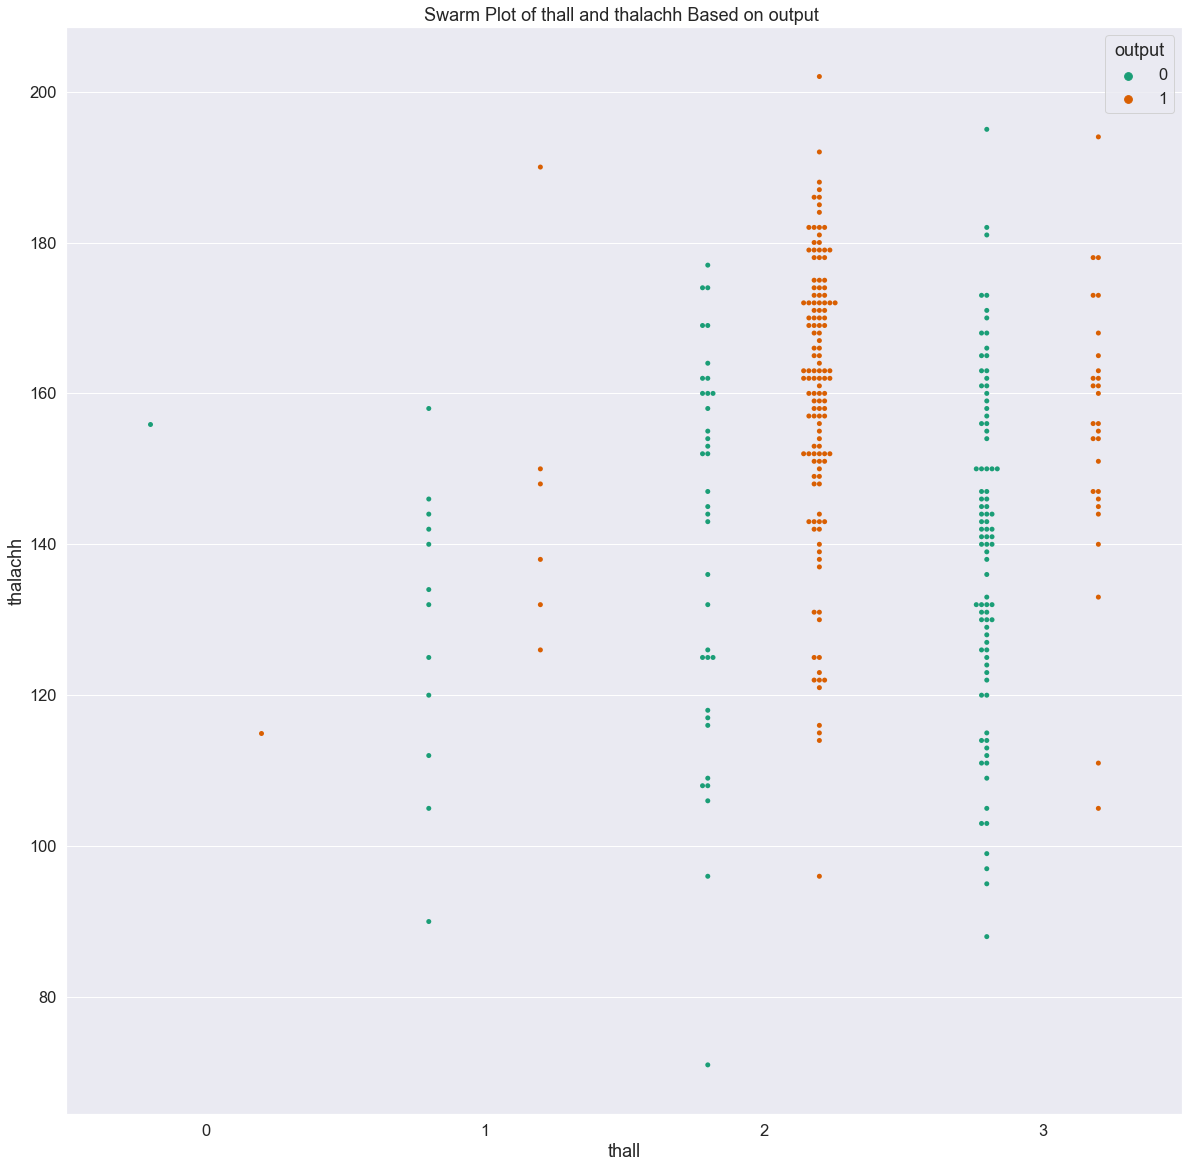

In [136]:
sns.swarmplot( x = "thall" , y = "thalachh" , data = df ,hue = "output" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of thall and thalachh Based on output ")

Text(0.5, 1.0, 'Swarm Plot of caa and thalachh Based on output ')

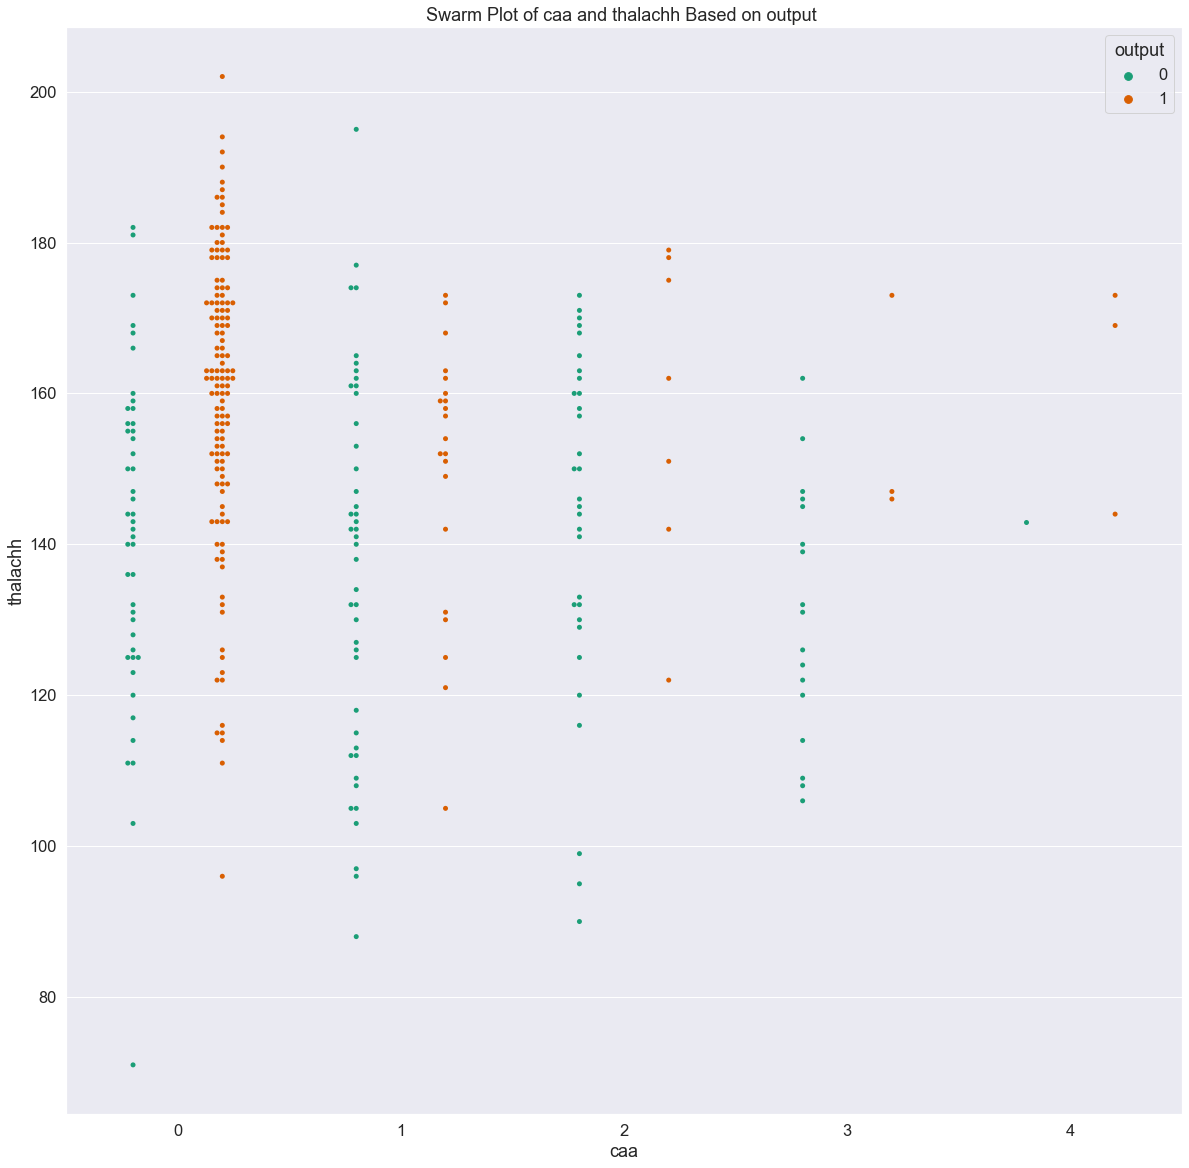

In [137]:
sns.swarmplot( x = "caa" , y = "thalachh" , data = df ,hue = "output" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of caa and thalachh Based on output ")

In [138]:
df.headad(2)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   

   caa  thall  output  
0    0      1       1  
1    0      2       1

Text(0.5, 1.0, 'Count Plot of age Based on output ')

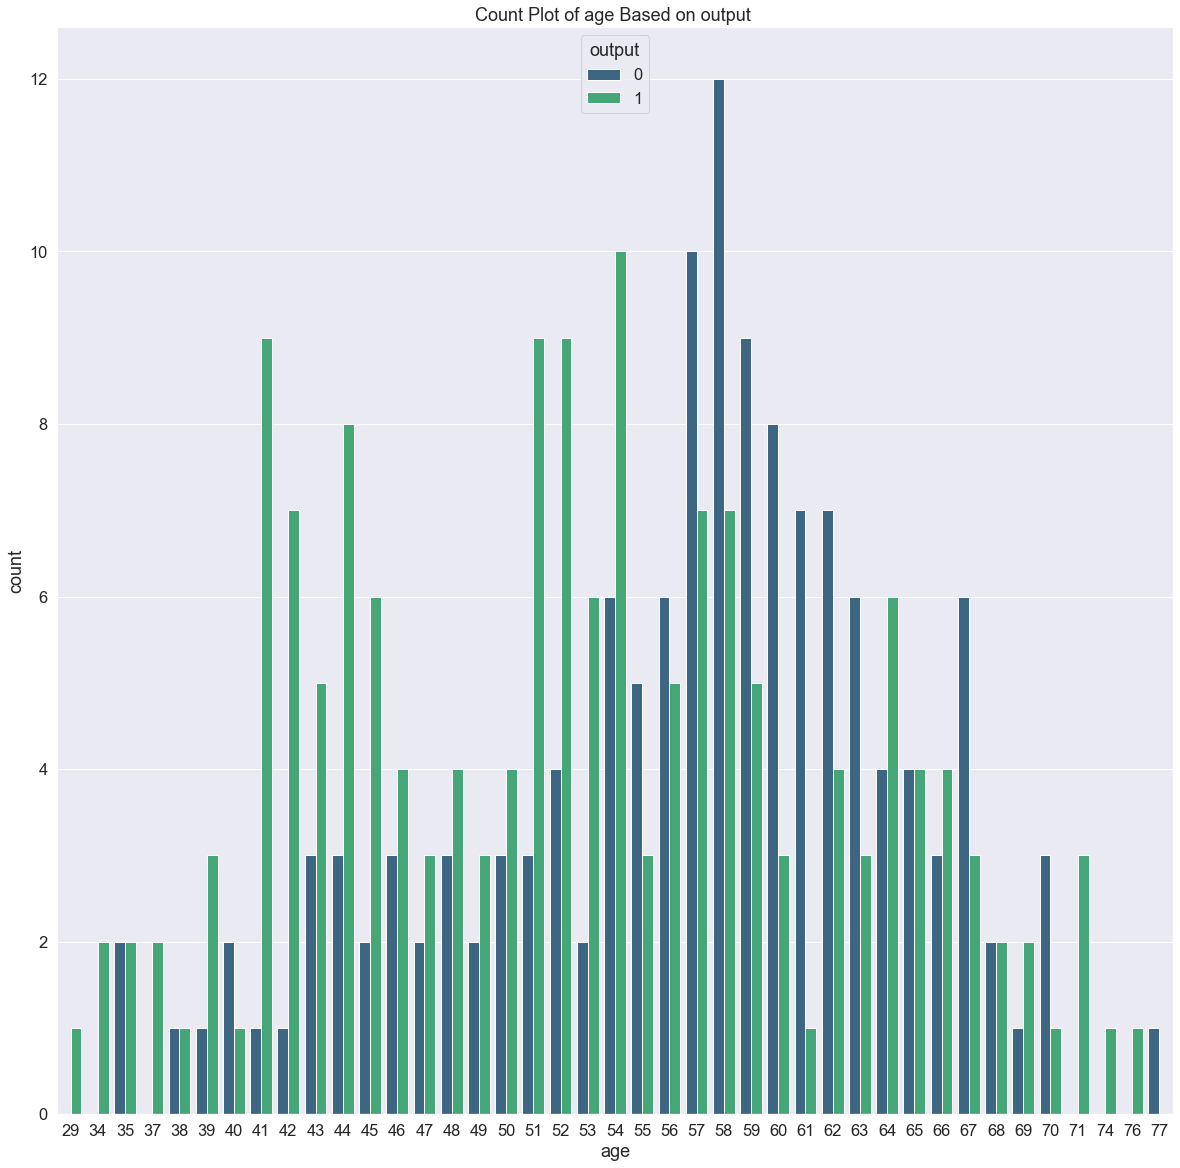

In [139]:
sns.countplot( x = "age"  , data = df , hue="output" , palette="viridis")
plt.title("Count Plot of age Based on output ")

Text(0.5, 1.0, 'Count Plot of sex Based on output ')

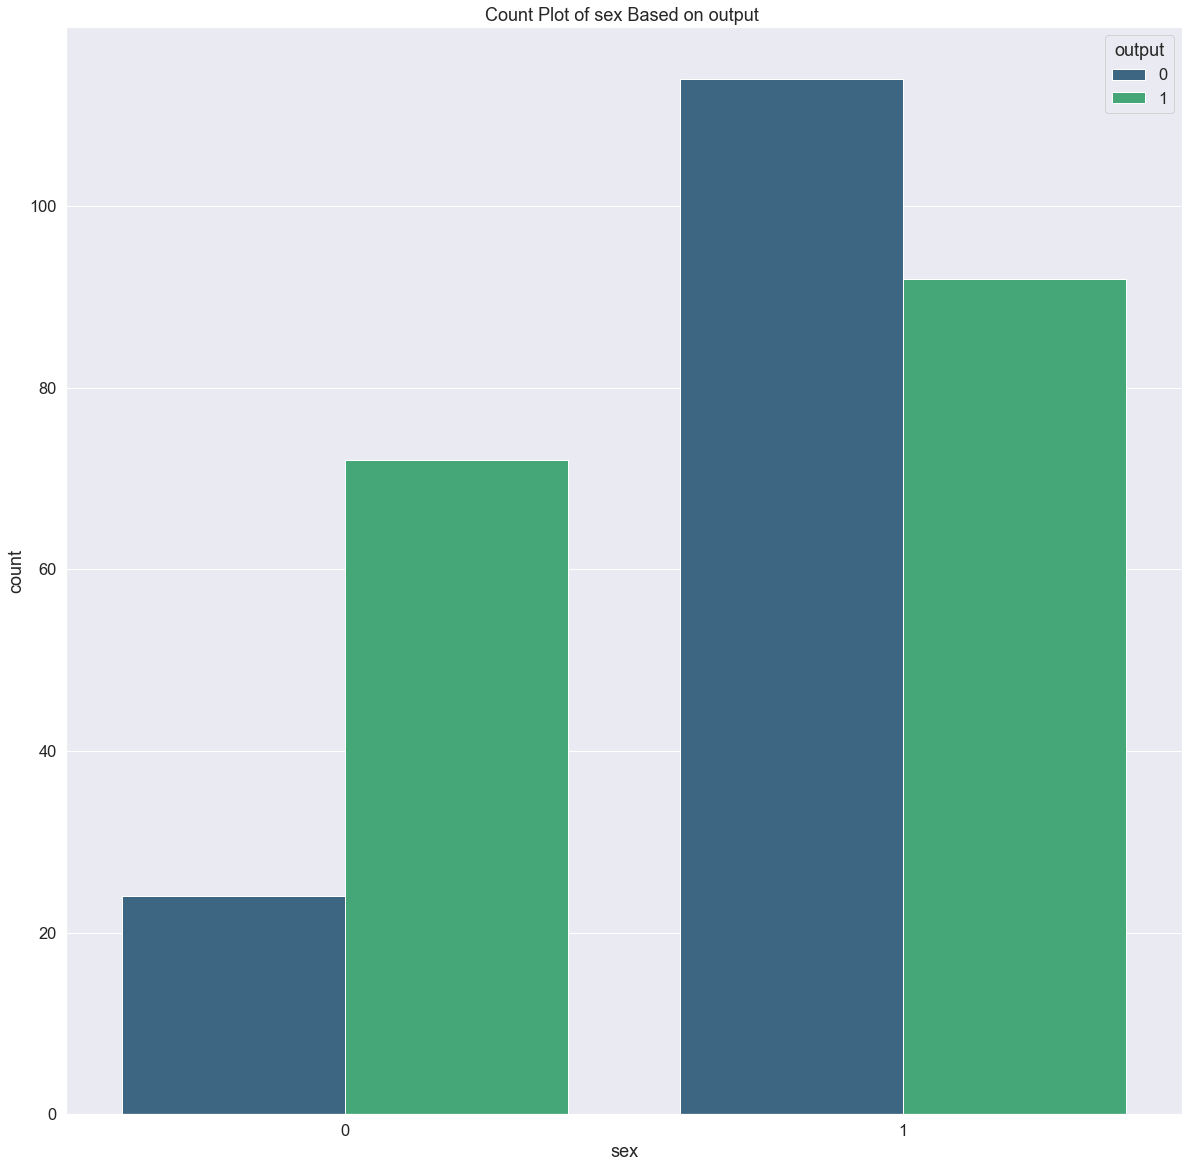

In [140]:
sns.countplot( x = "sex"  , data = df , hue="output" , palette="viridis")
plt.title("Count Plot of sex Based on output ")

Text(0.5, 1.0, 'Count Plot of cp Based on output ')

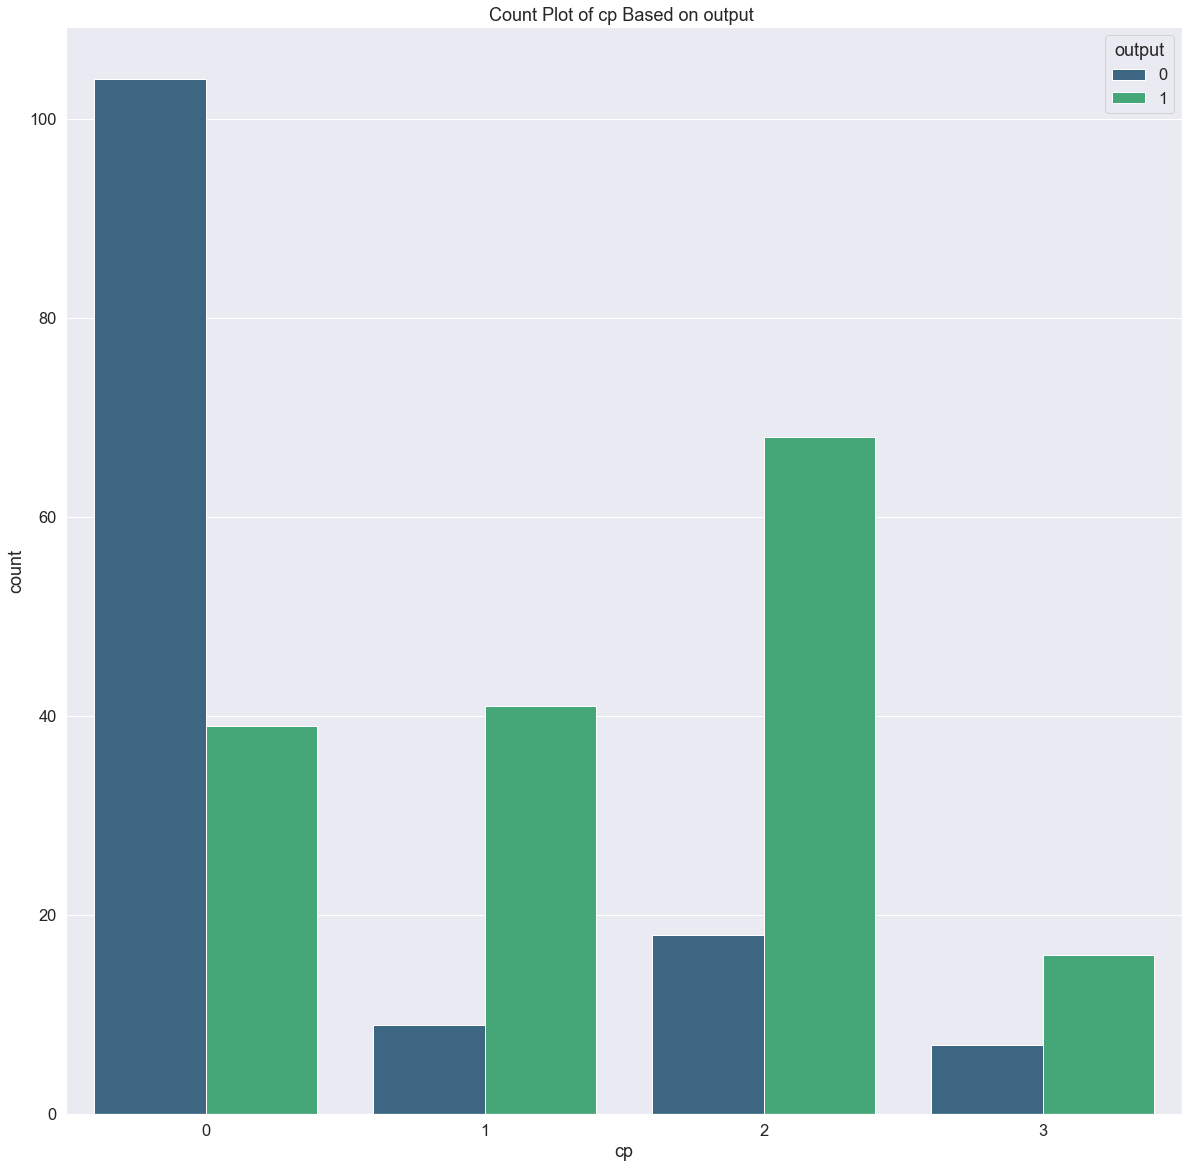

In [141]:
sns.countplot( x = "cp"  , data = df , hue="output" , palette="viridis")
plt.title("Count Plot of cp Based on output ")

Text(0.5, 1.0, 'Count Plot of fbs Based on output ')

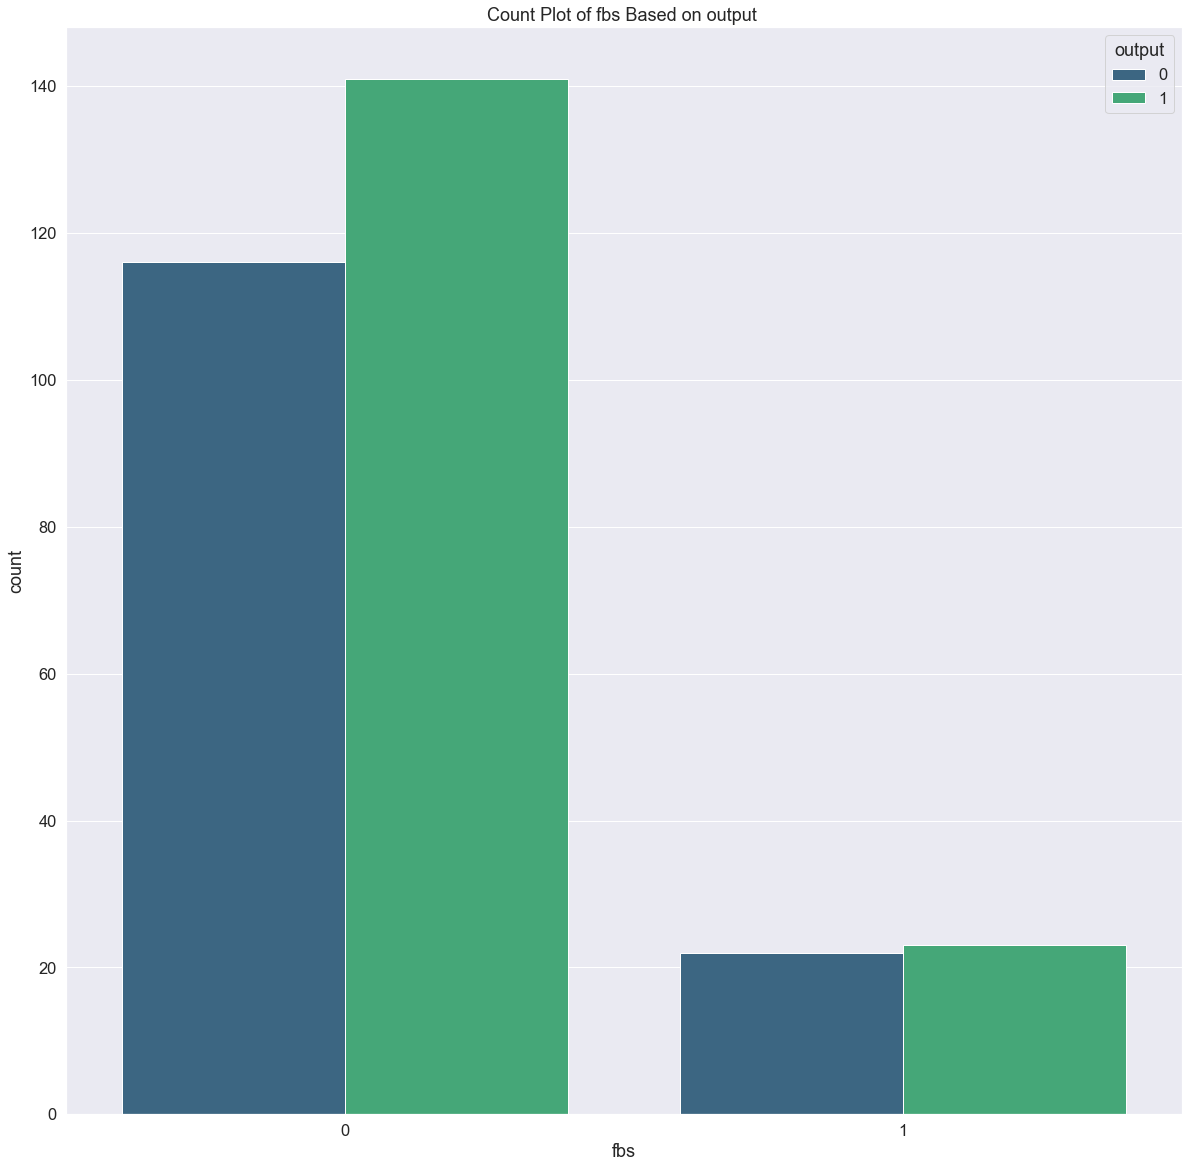

In [142]:
sns.countplot( x = "fbs"  , data = df , hue="output" , palette="viridis")
plt.title("Count Plot of fbs Based on output ")

Text(0.5, 1.0, 'Count Plot of restecg Based on output ')

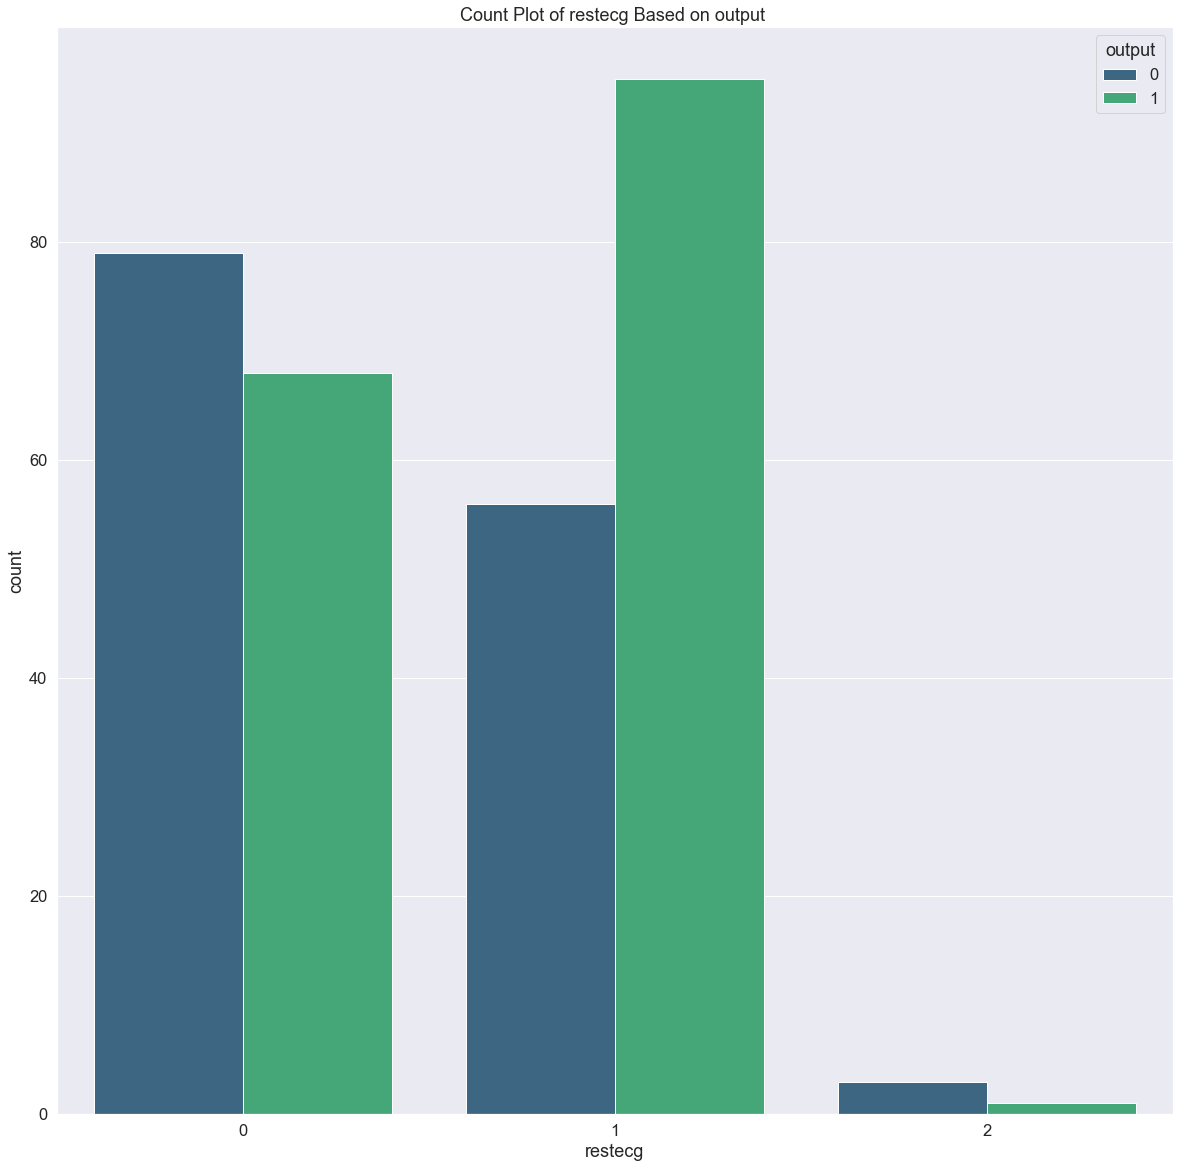

In [143]:
sns.countplot( x = "restecg"  , data = df , hue="output" , palette="viridis")
plt.title("Count Plot of restecg Based on output ")

Text(0.5, 1.0, 'Count Plot of exng Based on output ')

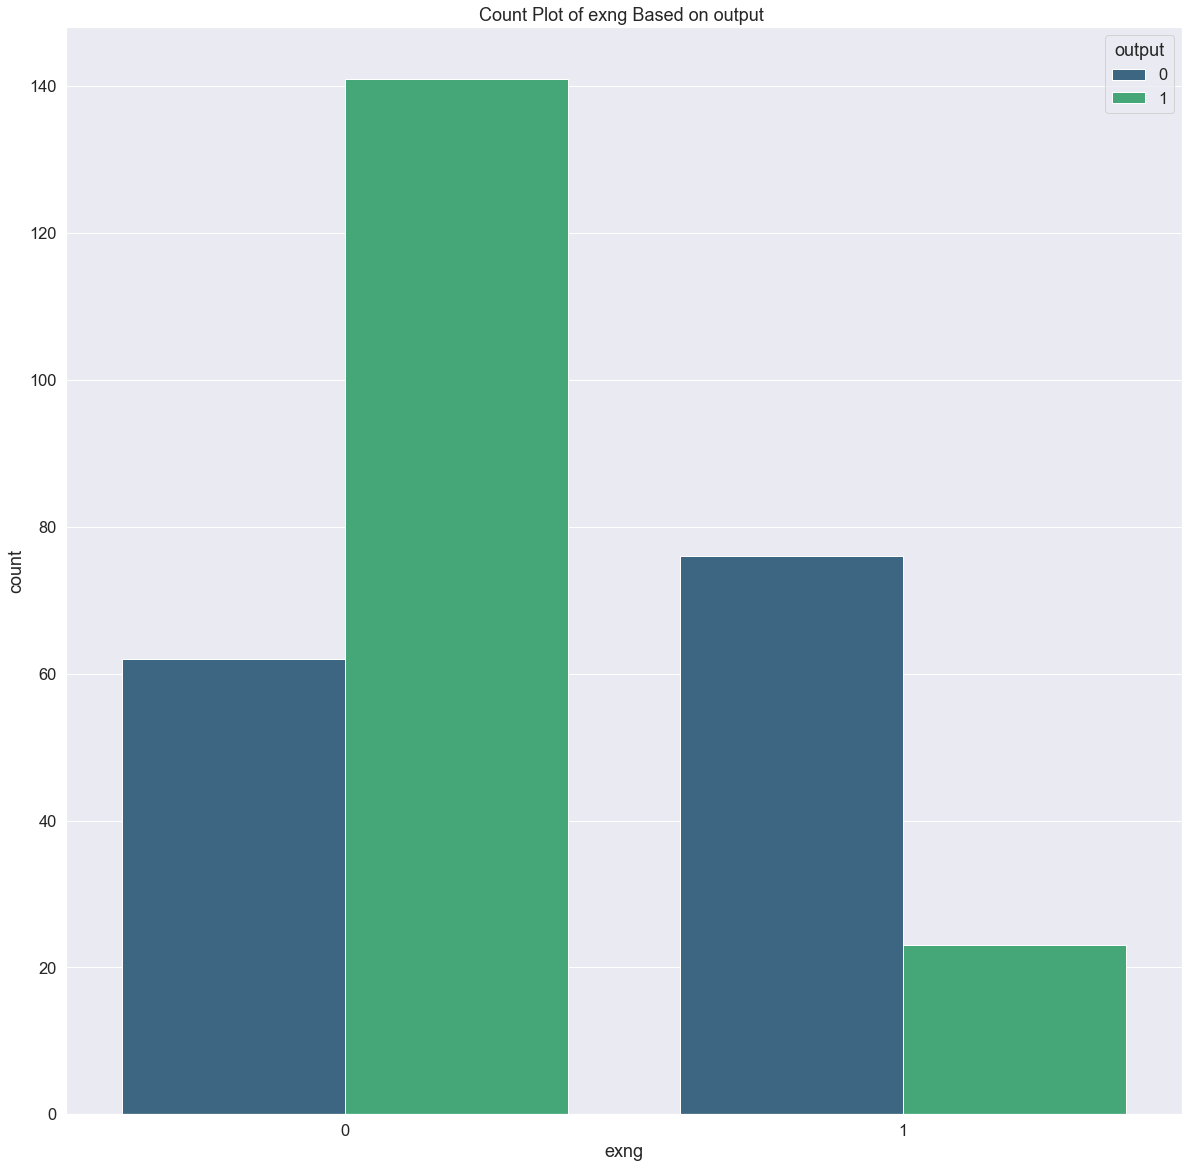

In [144]:
sns.countplot( x = "exng"  , data = df , hue="output" , palette="Dark2")
plt.title("Count Plot of exng Based on output ")

Text(0.5, 1.0, 'Count Plot of slp Based on output ')

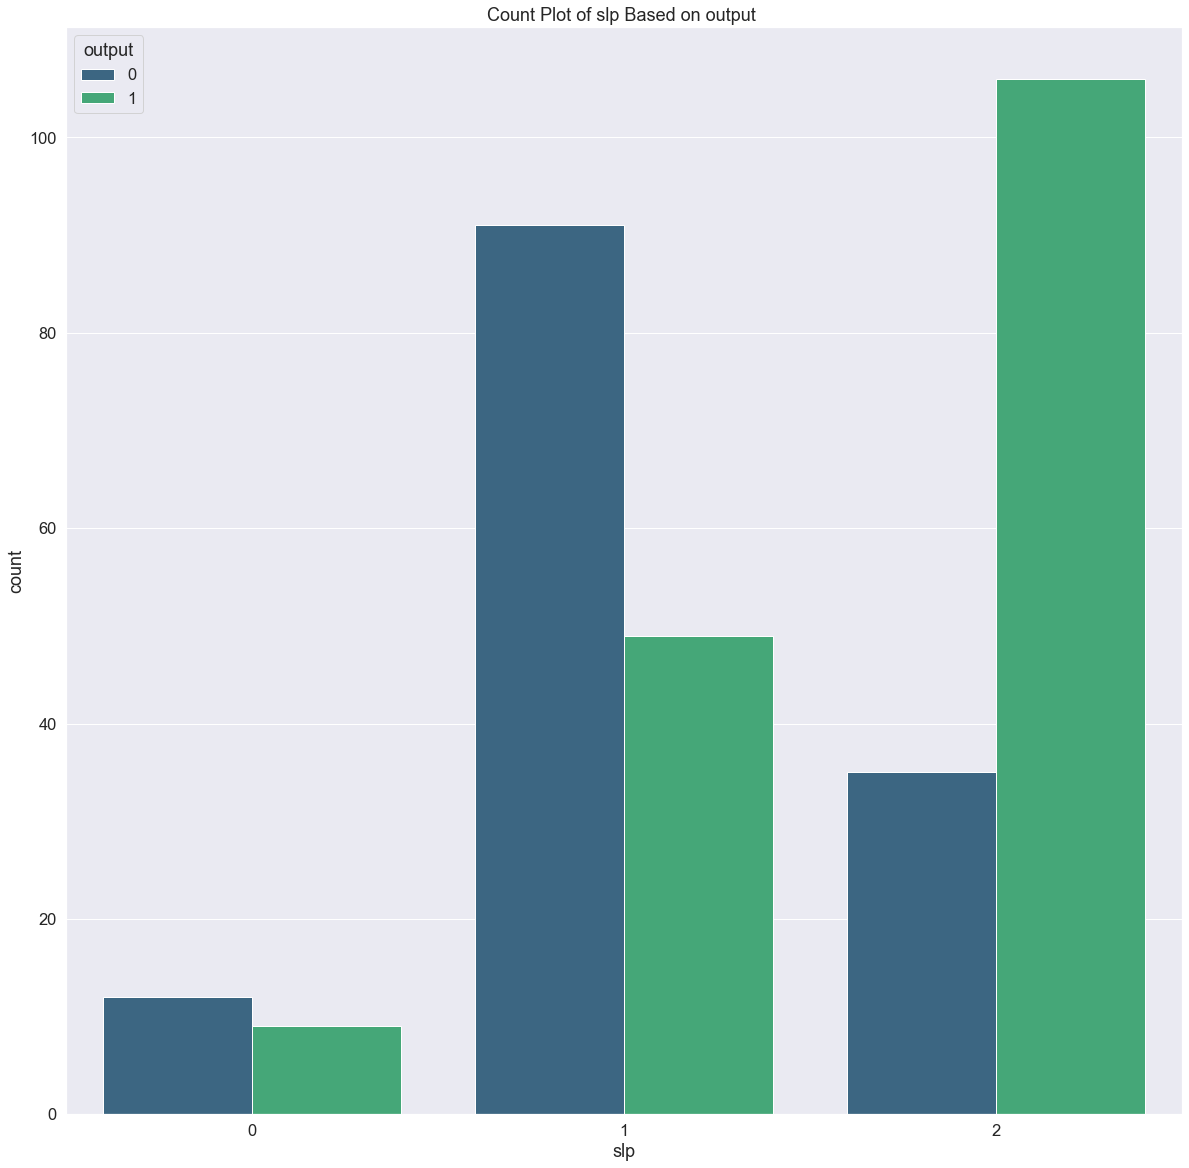

In [145]:
sns.countplot( x = "slp"  , data = df , hue="output" , palette="Dark2")
plt.title("Count Plot of slp Based on output ")

Text(0.5, 1.0, 'Count Plot of caa Based on output ')

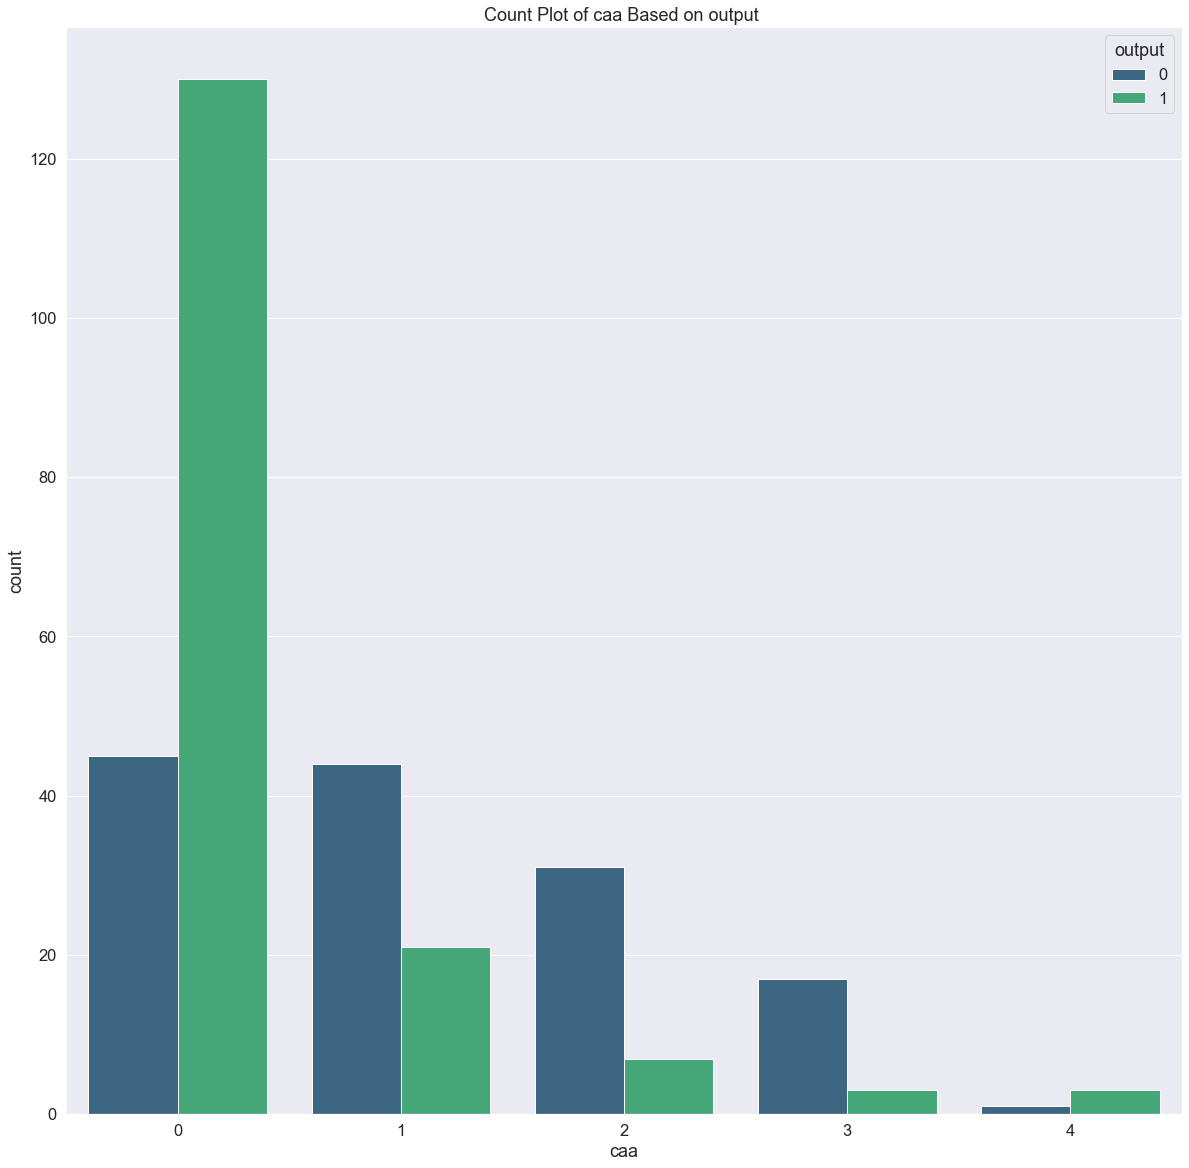

In [146]:
sns.countplot( x = "caa"  , data = df , hue="output" , palette="Dark2")
plt.title("Count Plot of caa Based on output ")

Text(0.5, 1.0, 'Count Plot of thall Based on output ')

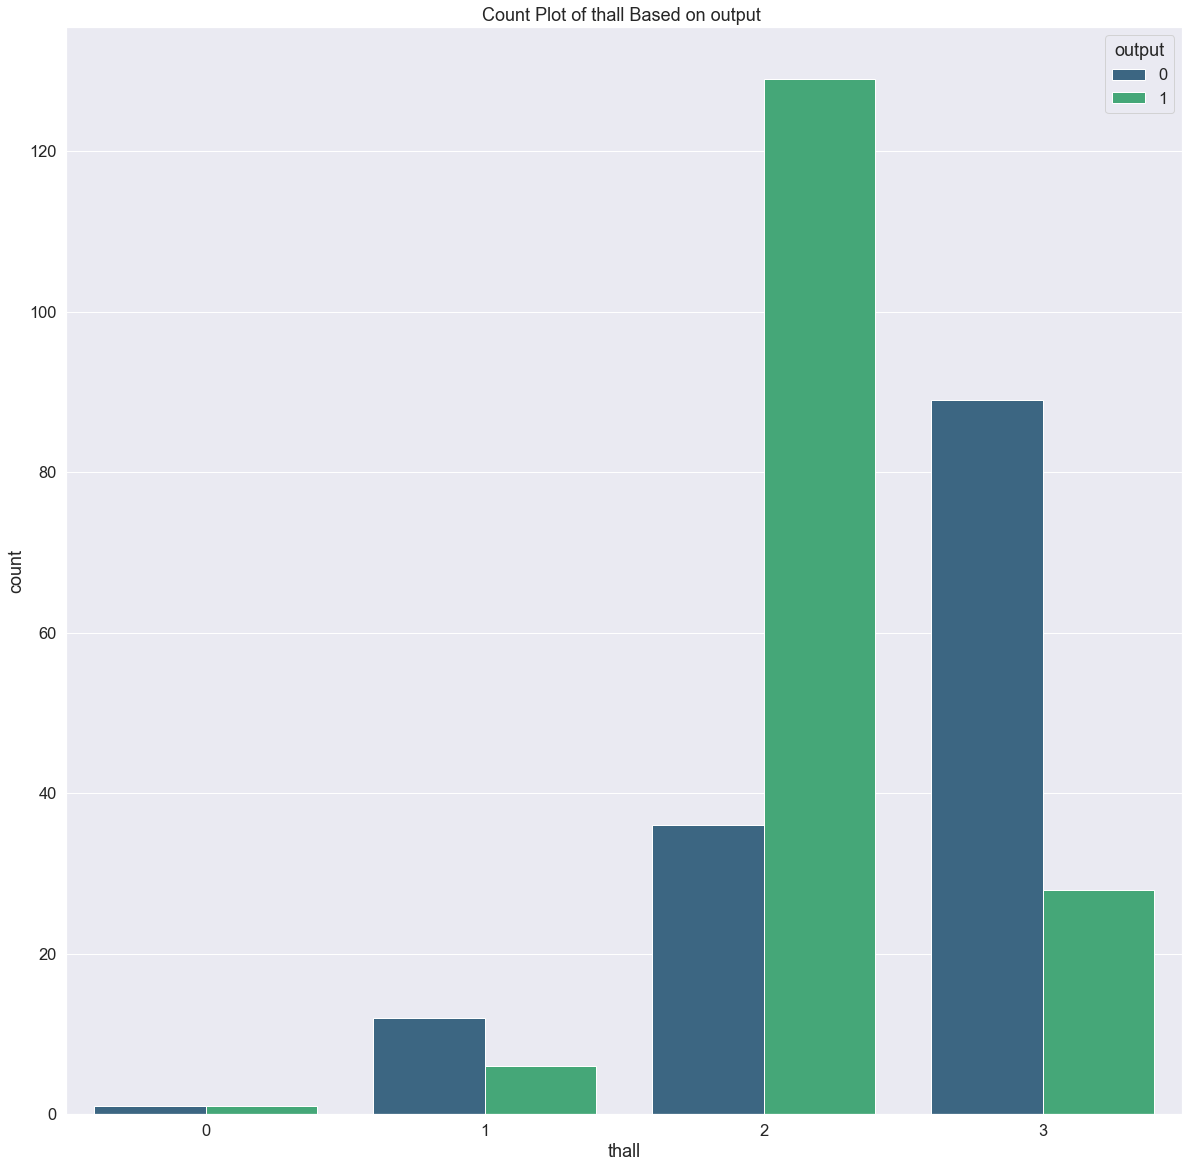

In [147]:
sns.countplot( x = "thall"  , data = df , hue="output" , palette="Dark2")
plt.title("Count Plot of thall Based on output ")

Text(0.5, 1.0, 'Count Plot of output  ')

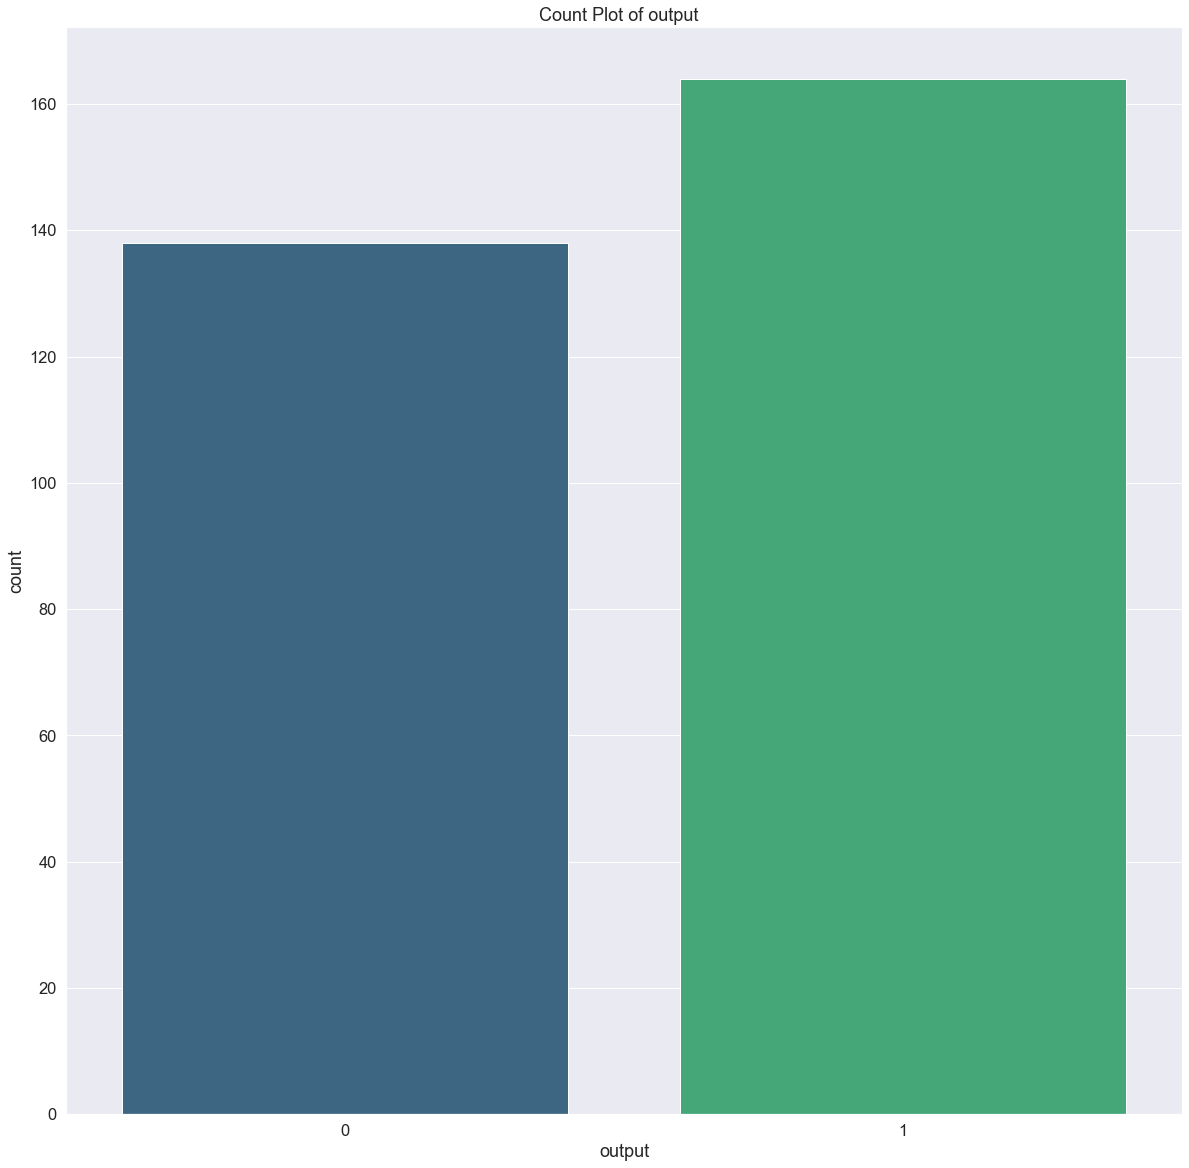

In [148]:
sns.countplot( x = "output"  , data = df  , palette="Dark2")
plt.title("Count Plot of output  ")

In [ ]:
# get describtion file of data ::

profile = pp.ProfileReport(df , title = "Human-Heart_Report" , explorative=True)
profile.to_widgets()


In [ ]:
# To save report as html file
profile.to_file("Human-Heart_Report.html")


<p id = "ETl">ETL-Process</p>

# 1 - Feature_Engineering Technice ::
*********************************************************************
* Its one of the most important phase in data scientist life cycle which use to generate new usefull features from the old  features which not enough for train model.

In [149]:
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[302 rows x 14 columns]

* Form The Result above we not Found any Feature of data we can apply that technice on it to generate new features.

# 2 - Transform_data ::
*************************************************
* 2 :: *Cleancing data* ::
     * Data in the real state dont comes cleaned is come dirty may include ::
         * non_logic_data_values.
         * Noisy and Errors.
         * Duplicaties data.
         * Missing_data_Values.
        

# non_logic_Values ::
***********************************
* Its one of the common issuse which consider us on data which data may include errors , noisy data such as :
    * Negaive values and that not logic.
    * Fraction Values and that not logic also.

In [150]:
# Check data include Non_logic data_Values ::

for col in df.columns :
    print(f"The Col ({col})\n")
    print(f"The Unique Values of ({col}) :: {df[col].unique()}\n\n")
    print(f"The Value_Counts of ({col}) :: \n{df[col].value_counts()}")
    print("-" * 80)

The Col (age)

The Unique Values of (age) :: [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]


The Value_Counts of (age) :: 
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
42     8
50     7
66     7
48     7
46     7
49     5
47     5
70     4
39     4
68     4
35     4
69     3
40     3
71     3
37     2
38     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64
--------------------------------------------------------------------------------
The Col (sex)

The Unique Values of (sex) :: [1 0]


The Value_Counts of (sex) :: 
1    206
0     96
Name: sex, dtype: int64
--------------------------------------------------------------------------------
The Col (cp)

The Unique Values of (cp) :: [3 2 1 0]


The Value_Counts of (cp) :: 
0    143
2     86
1     50
3     

# Dublicates data ::
***************************
* Its also one of the most common issue which may found reapat or redendant data that generate from :
    * Miss understanding from data entry person.
    * There are two cols have diff names but present the same entity.

In [151]:
# detect duplicated data ::

df.duplicated().sum()

0

# Missing Dtat Values ::
**********************************
* Its The Most common issue which consider us on data that generate from ::
    * Miss understanding from data entry person.
    * Falier the impute system.
* We must identify that missing data and impute it, we will solve that issue by ::
    * Fill Missing values use :
        * Mean value if data not include outliers.
        * Median value if data include outliers.
        * Mode value if that categorical data.
    * Or Impute data use :;
        * Simpleimputer ML Technice.
        * KNN ML Model.

In [152]:
# detect missing data values ::

df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [156]:
Num_Missing     = df.isnull().sum().sort_values(ascending = False)
Precent_Missing = ( df.isnull().sum() / df.isnull().count() ).sort_values(ascending = False)
Missing_Data    = pd.concat( [ Num_Missing , Precent_Missing ] ,axis=1 , keys = ["Num_Missing" , "Prec_Missing"])
Missing_Data


Num_Missing  Prec_Missing
age                 0           0.0
sex                 0           0.0
cp                  0           0.0
trtbps              0           0.0
chol                0           0.0
fbs                 0           0.0
restecg             0           0.0
thalachh            0           0.0
exng                0           0.0
oldpeak             0           0.0
slp                 0           0.0
caa                 0           0.0
thall               0           0.0
output              0           0.0

* From The result above we cann see that data not include any Missing values.

In [157]:
# Dropping NAN_Values
df.dropna(inplace=True)

* 3 :: *Data_Preprocessing* ::
    * Data may include ::
        * Outliers values.
        * Impalanced classes.
        * Text data.

# Outliers Values ::
**********************************
* Its one of the most common issuse which conseder us on data But we must investigate that value already outliers or anominal data values Based on ::
    * Understanding the domain of the Business well.
    * If num of ouliers values few that mean may that values outlier.
    * If num of outliers values hue that mean may that values not outliers.
* If that data outlier we will replace it by mean value or drop it.

In [158]:
df.head(2)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   

   caa  thall  output  
0    0      1       1  
1    0      2       1

<AxesSubplot:ylabel='trtbps'>

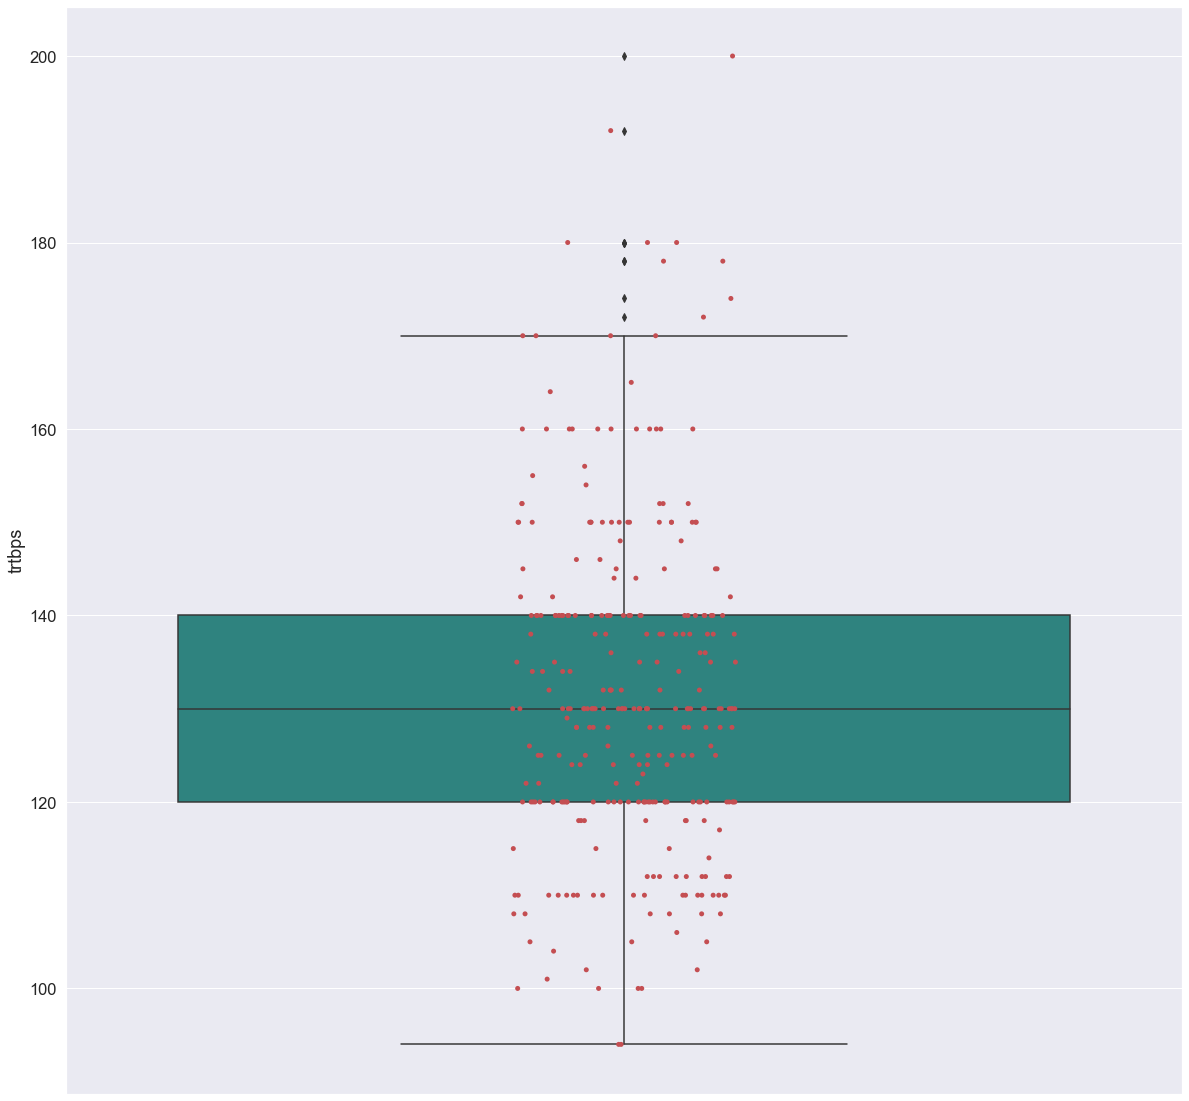

In [159]:
# detect outliers values in trtbps feature ::

sns.boxplot  (y = "trtbps" , data = df , palette="viridis")
sns.stripplot(y = "trtbps" , data = df , color = "r")

* From the result above we can see that the trtbps feature not include outliers values.

<AxesSubplot:ylabel='chol'>

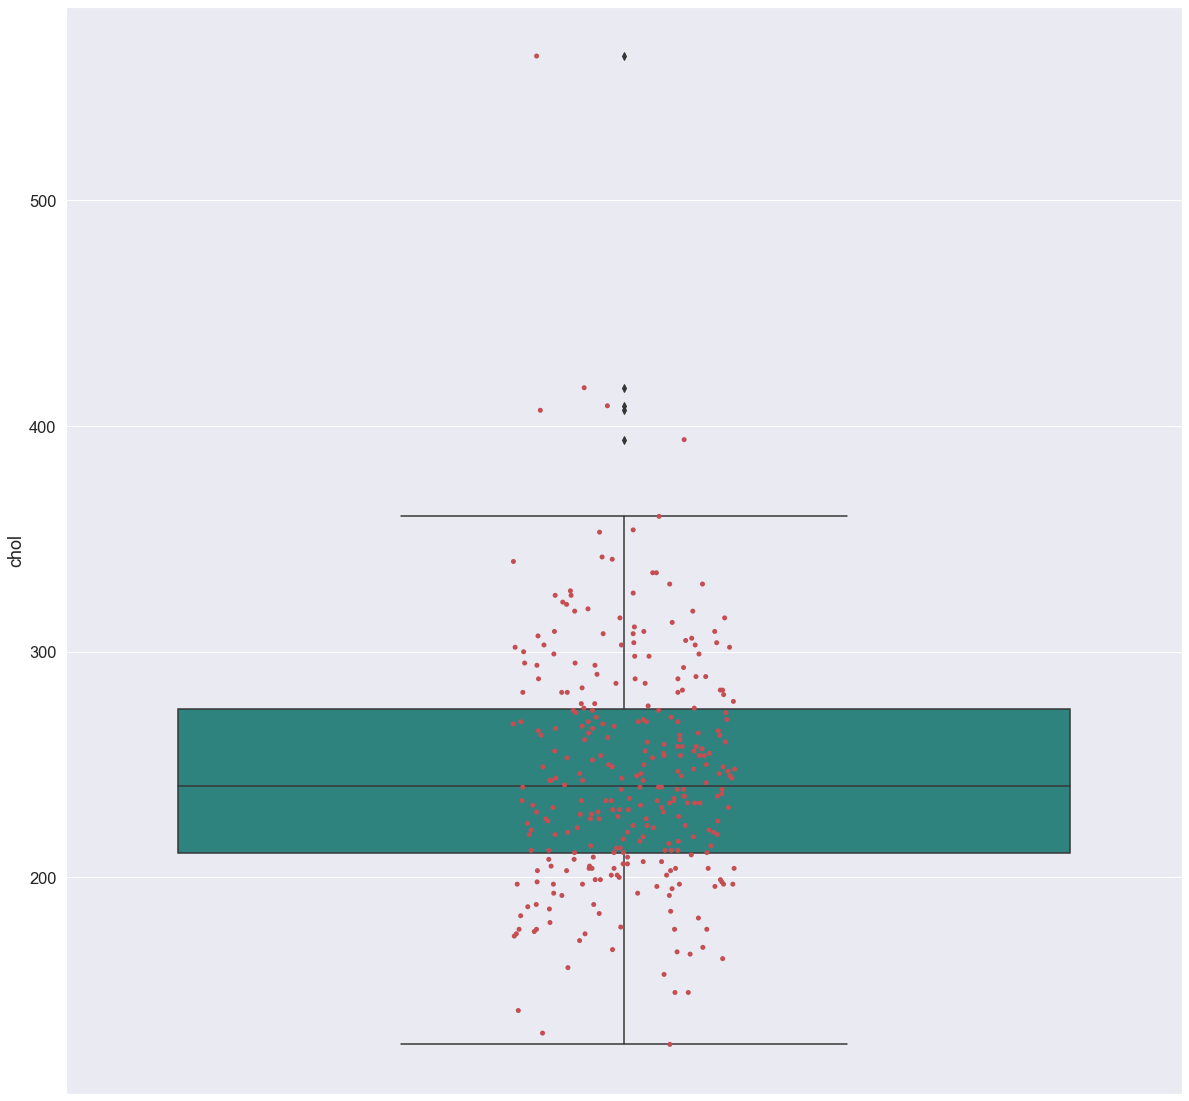

In [160]:
# detect outliers values in chol feature ::

sns.boxplot  (y = "chol" , data = df , palette="viridis")
sns.stripplot(y = "chol" , data = df , color = "r")

* From the result above we can see that the chol feature not include outliers values.

<AxesSubplot:ylabel='thalachh'>

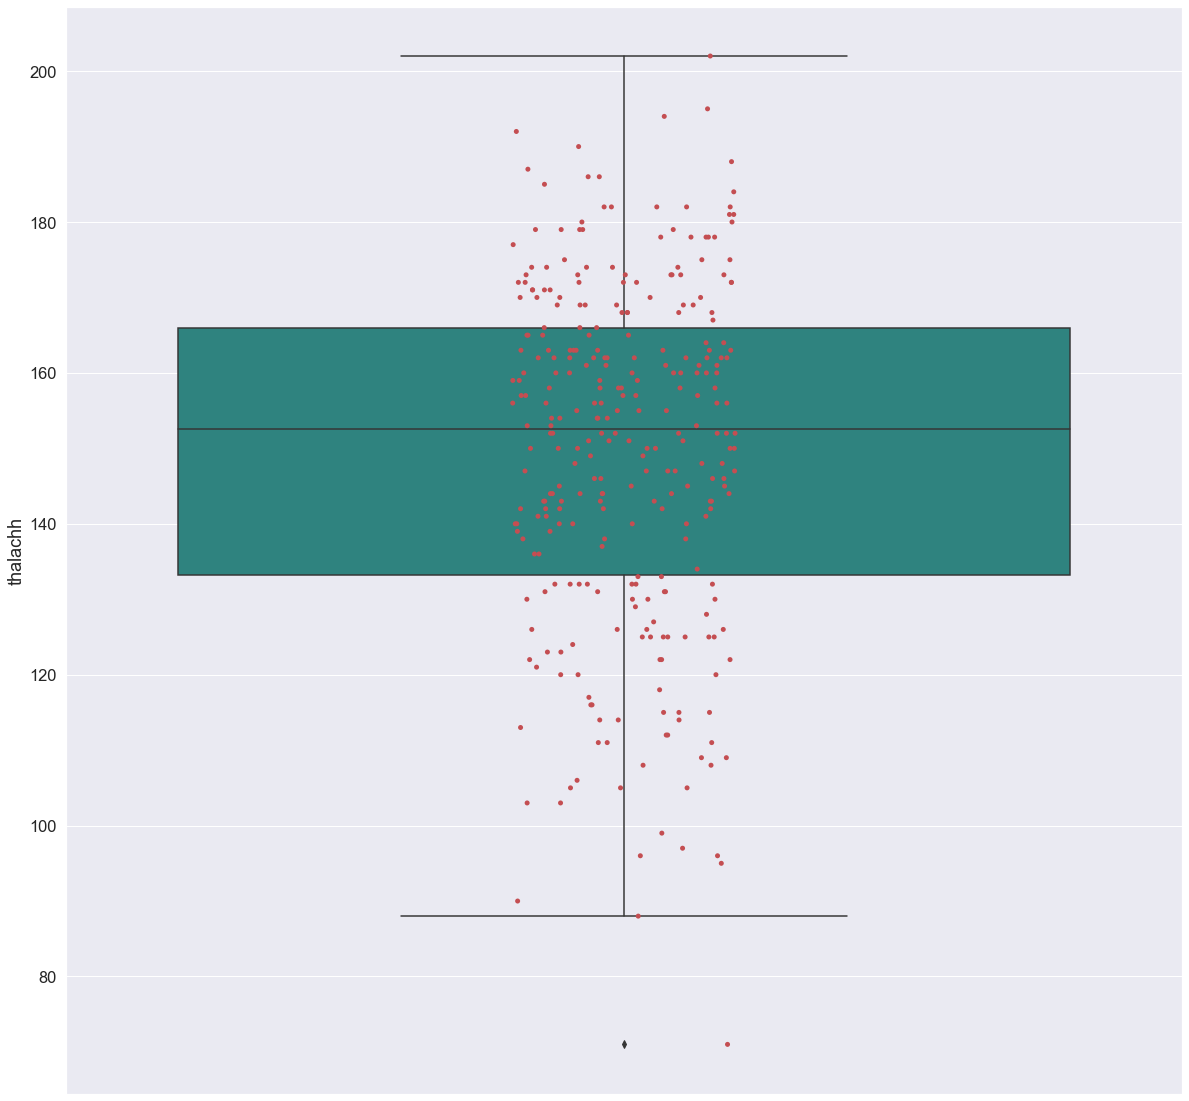

In [161]:
# detect outliers values in thalachh feature ::

sns.boxplot  (y = "thalachh" , data = df , palette="viridis")
sns.stripplot(y = "thalachh" , data = df , color = "r")

* From the result above we can see that the thalachh feature not include outliers values.

<AxesSubplot:ylabel='oldpeak'>

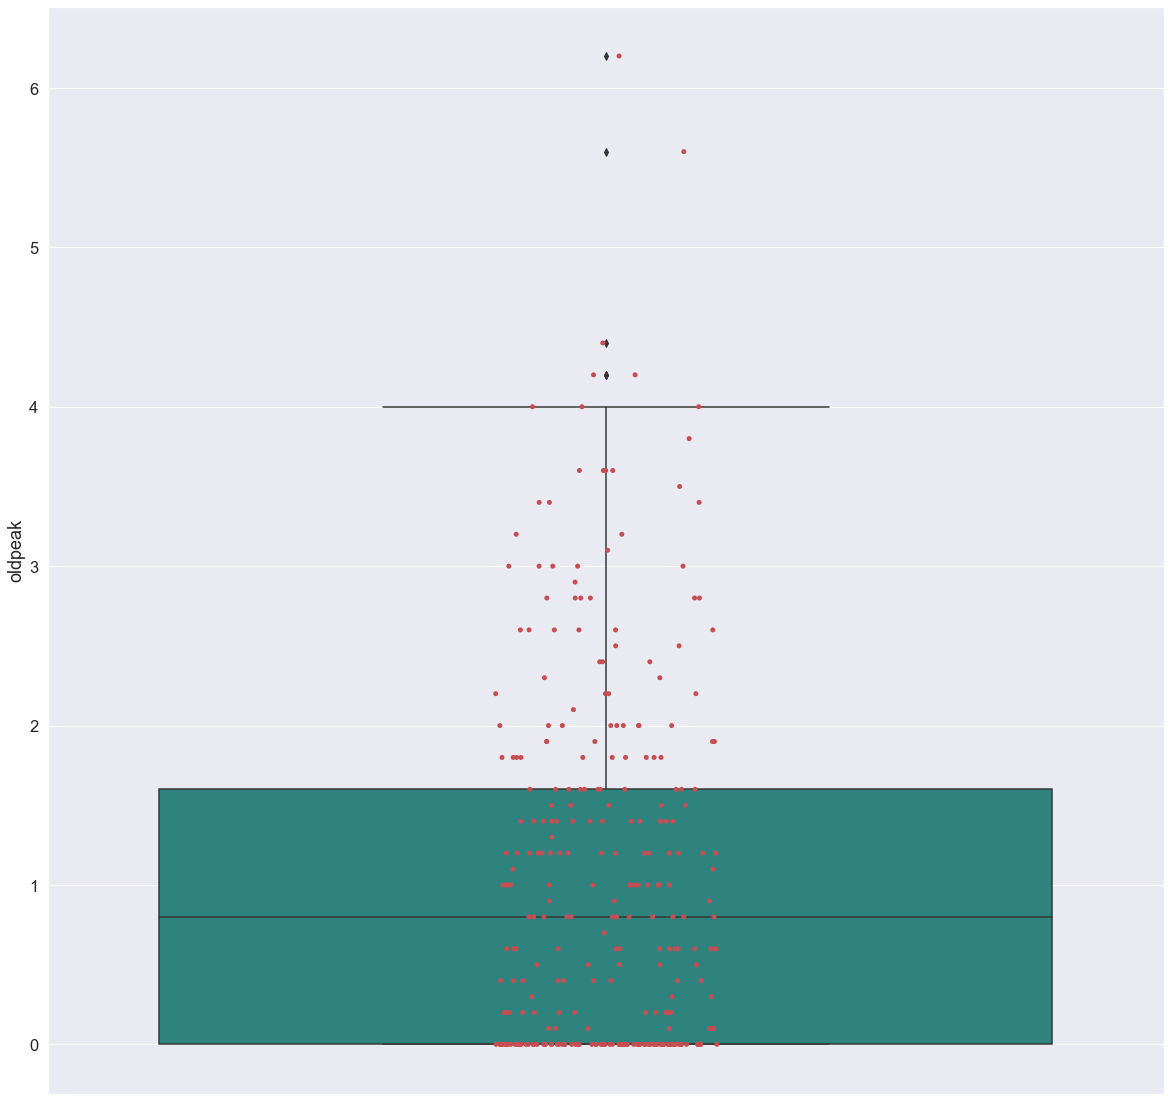

In [162]:
# detect outliers values in oldpeak feature ::

sns.boxplot  (y = "oldpeak" , data = df , palette="viridis")
sns.stripplot(y = "oldpeak" , data = df , color = "r")

# Processing Text data ::
**********************************************
* We must handling test data into numerical numbers becouse ML Models not understanding that text data so that we use one_hot_encoding or one_variable_encoding technices.


In [163]:
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[302 rows x 14 columns]

In [164]:
df = pd.get_dummies(df , drop_first = True)

In [165]:
df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[302 rows x 14 columns]

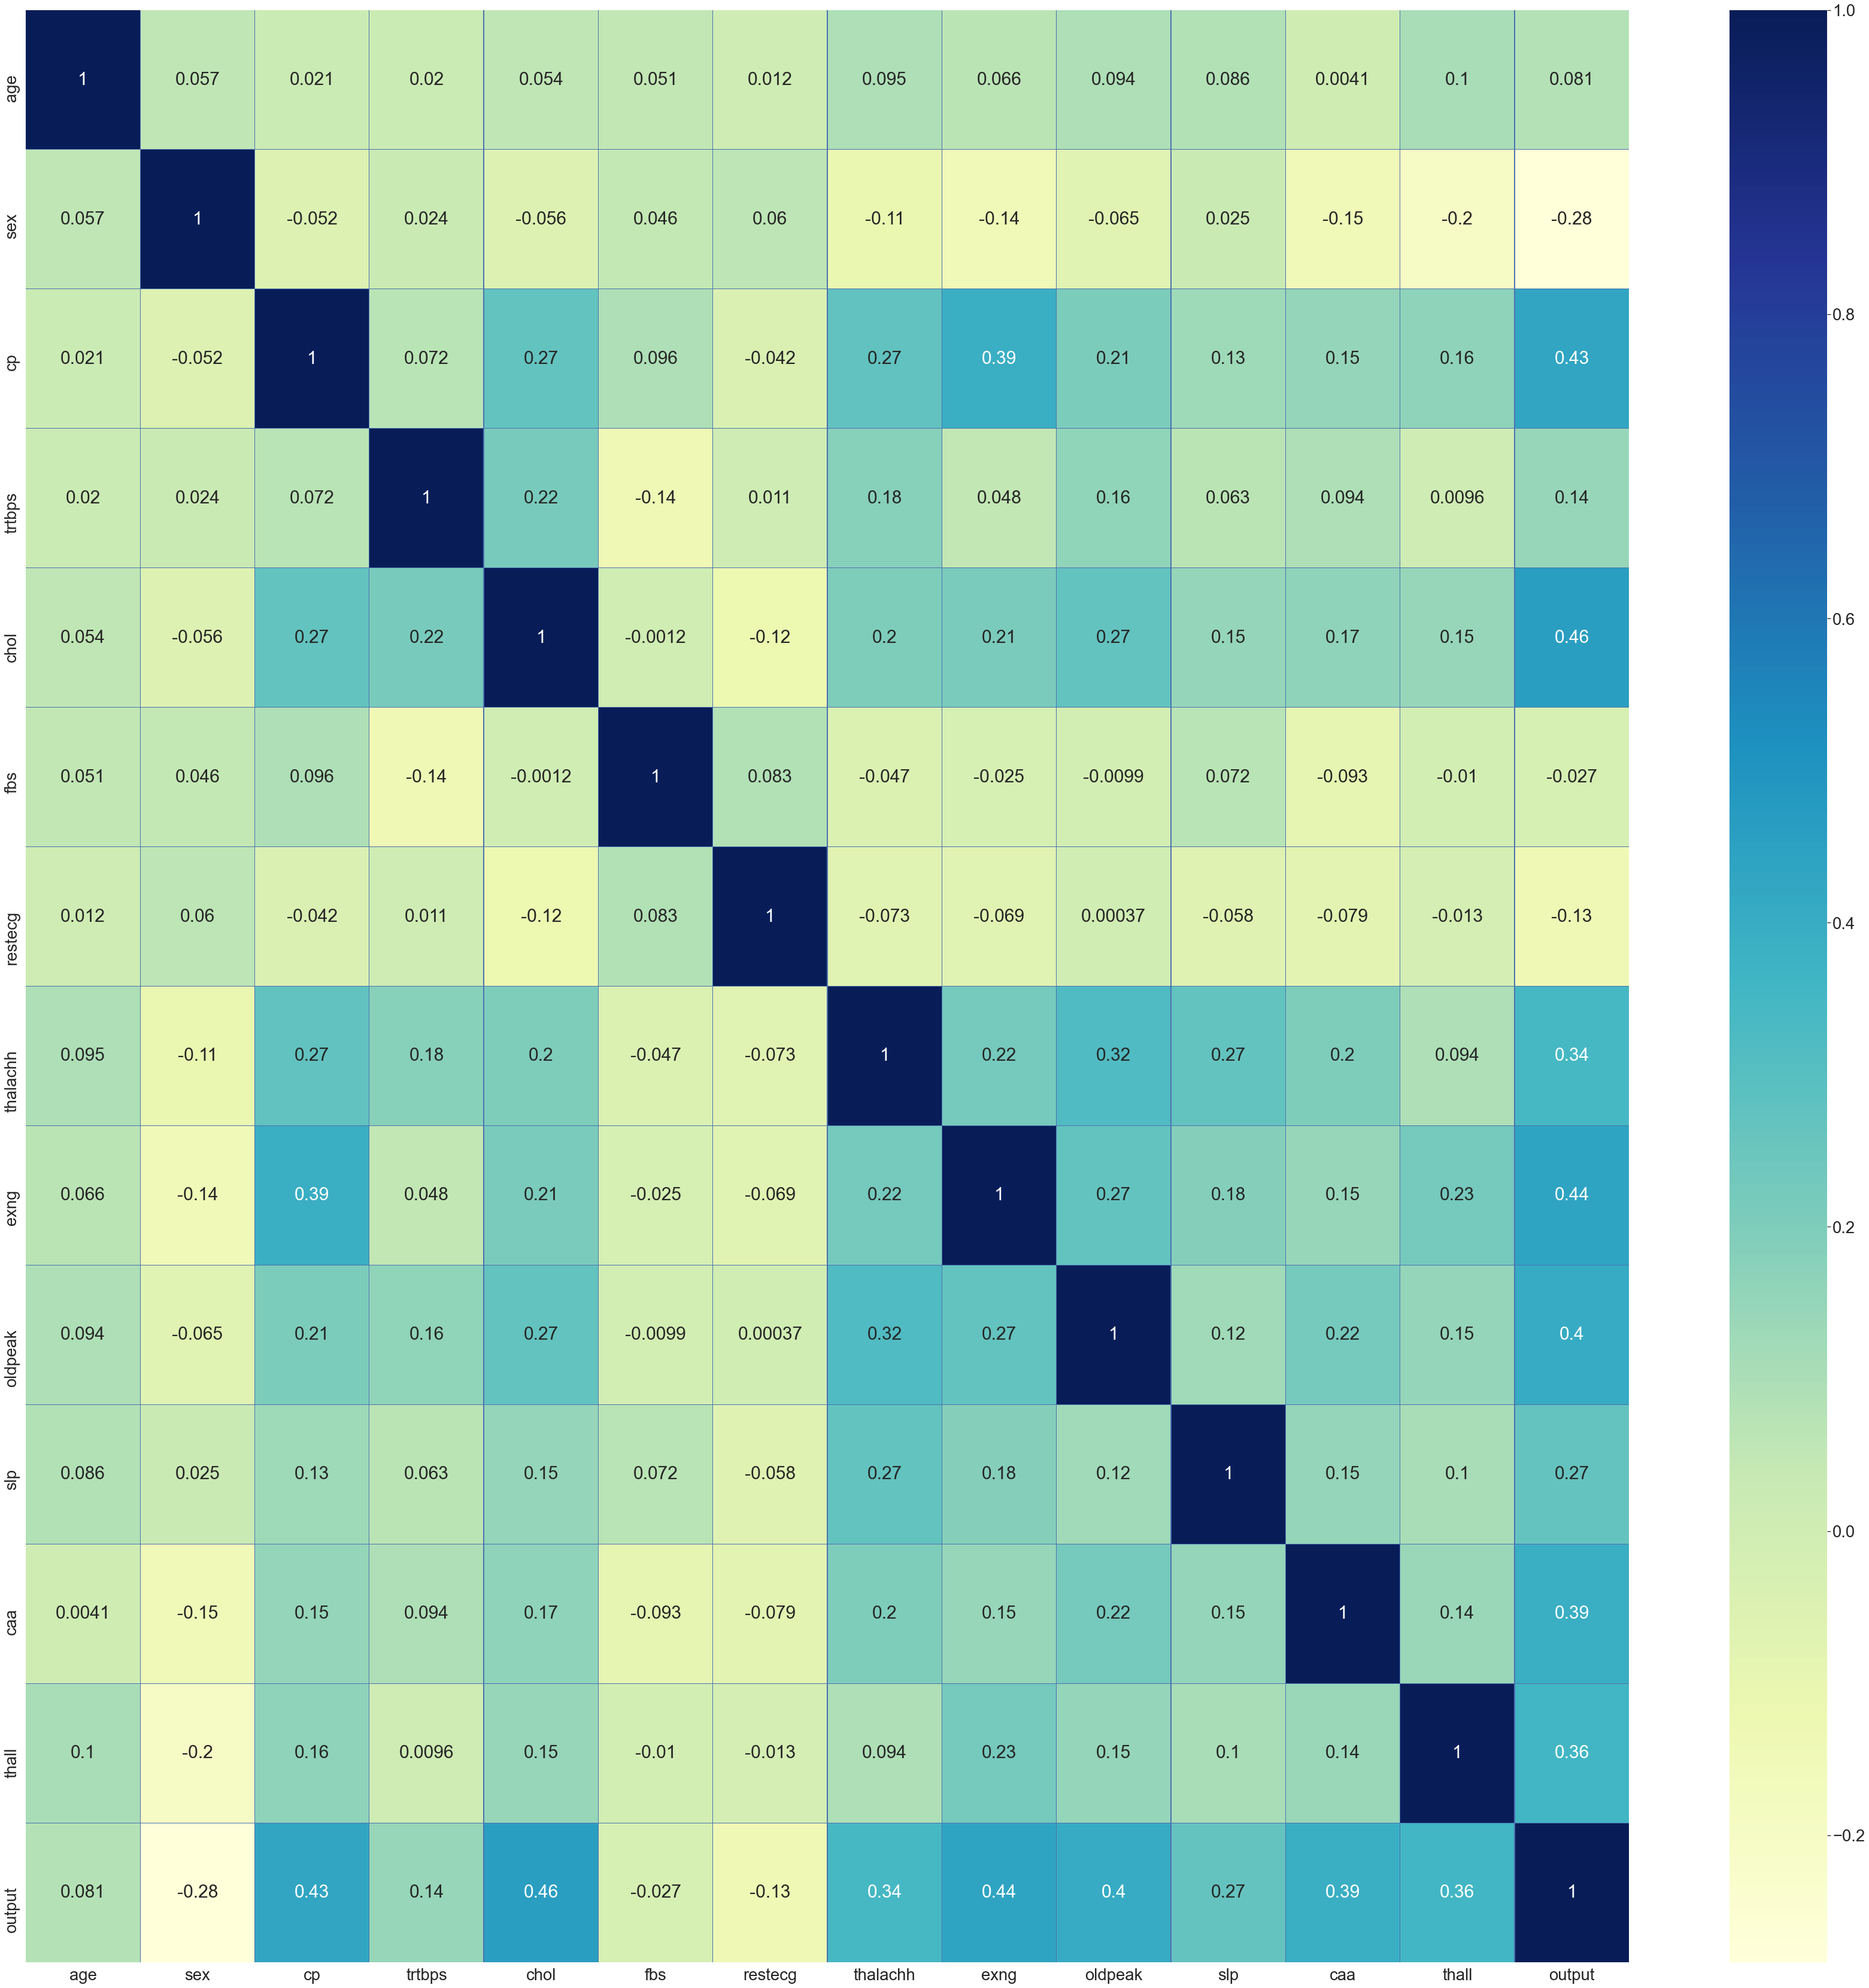

In [167]:
# get correlation between all features ::
sns.set( rc = {"figure.figsize" : [60 , 60]} , font_scale=2.5)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu", annot=True , linecolor="b")

<AxesSubplot:>

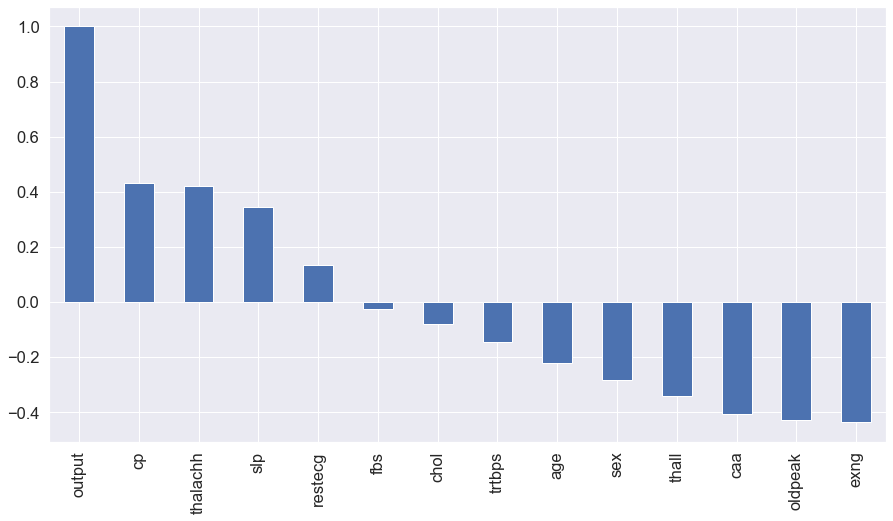

In [168]:
# Get Correlation of "Churn" with other features ::
sns.set( rc = {"figure.figsize" : [10 , 10]} , font_scale=1.5)

plt.figure(figsize=(15,8))
df.corr()['output'].sort_values(ascending = False).plot(kind='bar'  )

<p id = "Prepration">Data-Prepration</p>

# Data Prepration ::
****************************************
* Its one of the most important process in data science life cycle ::
    * Split data into Inpute data and output data.
    * Split data into Train and Testing data.

In [169]:
# Split data into input and output data
x = df.drop("output" , axis=1 )
y = df["output"]

In [170]:
# Spliting data into Training and Testing data ::
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , random_state = 20 , test_size=0.2)

In [171]:
 #Scalling data ::
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
x_train = scaller.fit_transform(x_train)
x_test  = scaller.transform(x_test)


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


<p id = "Model">Bulid_ML_Model</p>

# Build Models ::
*************************************
* On that Process we will ::
    * Bulid multi models fror classification problem.
    * Evaluate all models.
    * Select the most efficient model for churn problem.

In [173]:
# Import All Classification Algos ::
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , confusion_matrix 
from sklearn.metrics import classification_report , f1_score , precision_recall_curve

In [174]:
Models = {"Log_Classifer" : LogisticRegression() ,
          "DT_Classifer"  : DecisionTreeClassifier() ,
          "RF_Classifer"  : RandomForestClassifier() ,
          "XGB_Classifer" : XGBClassifier() ,
          "SVC_Classifer" : SVC(),
          "GassianNB_Classifiier" : GaussianNB() ,
          "KNN_Classifier" : KNeighborsClassifier()
         }

In [175]:
for Name , Model in Models.items() :
    print(f"The Model :: {Name}\n----------")
    Model.fit(x_train , y_train)
    Train_score = Model.score(x_train , y_train)
    Test_score  = Model.score(x_test , y_test)
    y_pred = Model.predict(x_test)
    Acurace_Score = accuracy_score(y_test , y_pred)
    Con_Matrix = confusion_matrix(y_test , y_pred)
    print(f"The Traing_Score :: {Train_score}\nThe Testing_Score :: {Test_score}\nThe Accuracy_Scor :: {Acurace_Score}\nThe Con_Matrix ::\n {Con_Matrix}\n=================\n==================")

The Model :: Log_Classifer
----------
The Traing_Score :: 0.8547717842323651
The Testing_Score :: 0.8032786885245902
The Accuracy_Scor :: 0.8032786885245902
The Con_Matrix ::
 [[20  3]
 [ 9 29]]
The Model :: DT_Classifer
----------
The Traing_Score :: 1.0
The Testing_Score :: 0.7868852459016393
The Accuracy_Scor :: 0.7868852459016393
The Con_Matrix ::
 [[18  5]
 [ 8 30]]
The Model :: RF_Classifer
----------
The Traing_Score :: 1.0
The Testing_Score :: 0.8360655737704918
The Accuracy_Scor :: 0.8360655737704918
The Con_Matrix ::
 [[21  2]
 [ 8 30]]
The Model :: XGB_Classifer
----------
[13:01:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The Traing_Score :: 1.0
The Testing_Score :: 0.8032786885245902
The Accuracy_Scor :: 0.803278688524

In [177]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(x_train , y_train)
print(KNN_Model.score(x_train , y_train))
print(KNN_Model.score(x_test , y_test))
print("-" * 80)


0.8713692946058091
0.8524590163934426
--------------------------------------------------------------------------------


<p id = "Evaluation">Evaluate_Model</p>

# Evaluate Model ::
*********************************
* Its one off the most important phase in data scientist life cycle which estimate the performance and accuracy of the model in that problem.

In [ ]:
RF_Model.score(x_train , y_train)

In [ ]:
RF_Model.score(x_test , y_test)

In [ ]:
Ac_Sore_RF = accuracy_score(y_test , y_pred)
Ac_Sore_RF

In [ ]:
con_Matrix = confusion_matrix(y_test , y_pred)
con_Matrix

In [ ]:
sns.set( rc = {"figure.figsize" : [10 , 10]} , font_scale=1.5)

sns.heatmap(con_Matrix , annot = True , cmap="RdYlBu" , linecolor = 'k' , linewidths= 1)

<p id = "Save">Save_Model</p>

# Save techinces ::
***************************************
* Save Scaler
* Save PCA
* Save Model

In [178]:
import joblib

In [ ]:
scaler = joblib.dump(scaller , "scaler.h5")

In [ ]:
Model = joblib.dump(RF_Model , "Model.h5")

<p id = "conclusions">conclusions</p>

# Conclusion ::
*****************************
* On that Step We will ::
  * Input data features.
  * Scaling input data.
  * Predict target label.

In [179]:
x.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

In [ ]:
custom_data = np.array([])

In [ ]:
custom_data.shape

In [ ]:
custom_data = scaller.transform([custom_data])
custom_data

In [ ]:
prediction = RF_Model.predict(custom_data)
prediction